# Problems


### CountBetweenMarkers WORKS ONLY WITH 1 Channel

# Definitions

In [1]:
from collections import OrderedDict
import datetime
import matplotlib.pyplot as plt
import numpy as np
import time
import traceback
from core.module import Connector, StatusVar
from core.util.mutex import Mutex
from logic.generic_logic import GenericLogic
from qtpy import QtCore
from TimeTagger import GatedChannel,CountBetweenMarkers

from PyDAQmx import Task
import TimeTagger as tt
import PyDAQmx
import datetime
import PyDAQmx as daq


In [2]:
# bot.sendMessage(chat_id=chat_id, text='I have finished')
# bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [3]:
import telegram
bot = telegram.Bot(token='968560013:AAGSzyvq3SEnHpo-o4WPeXM8_sywoKDYZH0')
# print(bot.get_me())
# chat_id = bot.get_updates()[-1].message.chat_id
chat_id = 111963322
# bot.sendMessage(chat_id=chat_id, text="Hi, Javid. I am initialised and ready to serve you")

In [4]:
""" Simple example of digital output

    This example outputs the values of data on line 0 to 7
"""

off = np.array([0,0,0,0,0,0,0,0], dtype=np.uint8)
green = np.array([0,0,1,0,0,0,0,0], dtype=np.uint8)
markers = np.array([1,0,0,0,0,0,0,0], dtype=np.uint8)
markers2 = np.array([0,0,0,0,0,1,0,0], dtype=np.uint8)
redAOM = np.array([0,0,0,1,0,0,0,0], dtype=np.uint8)
redAOM2 = np.array([0,0,0,0,1,0,0,0], dtype=np.uint8)
mw_trig = np.array([0,1,0,0,0,0,0,0], dtype=np.uint8)

task = Task()
task.CreateDOChan("/Dev4/port0/line0:7","",PyDAQmx.DAQmx_Val_ChanForAllLines)


def greenFunc():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
    task.StopTask()
    
def redExFunc():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
    task.StopTask()
    
def redA1Func():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM2,None,None)
    task.StopTask()

def offFunc():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,off,None,None)
    task.StopTask()

    
def mw_odmr():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig+green,None,None)
    task.StopTask()
    
def mw_on():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig,None,None)
    task.StopTask()
    

def mw_pleEx():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig+redAOM,None,None)
    task.StopTask()
    

def mw_pleA1():
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig+redAOM2,None,None)
    task.StopTask()
        
    
def readoutFunc(readouttime):
    countBM.clear() # Clear the buffer
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,markers,None,None)
    time.sleep(readouttime)
    task.StopTask()
    offFunc()
    
    return countBM.getData()[0]
    
def readoutEx(readouttime):
    countBM.clear() # Clear the buffer
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,markers+redAOM,None,None)
    time.sleep(readouttime)
    task.StopTask()
    offFunc()
    
    return countBM.getData()[0]


In [5]:
mw_odmr()

In [6]:
greenFunc()

In [5]:
def start_scanning(v_min=None, v_max=None, speed = None):

    if speed is not None:
        laserscannerlogic.set_scan_speed(speed)    
    else:
        laserscannerlogic.set_scan_speed(0.1)

    try:
#         if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
#             laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
#             time.sleep(0.5)
# #             laserscannerlogic._pulse_generator_device.pulser_on()
# #             laserscannerlogic.odmrlogic().mw_cw_on()
#         else:
#             laserscannerlogic.log.error('load PLE sequence on AWG')
#             laserscannerlogic._pulse_generator_device.pulser_off()
#             laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
#             laserscannerlogic.odmrlogic().mw_off()
#             laserscannerlogic.stop_scanning()
#     #         return -1


#         if v_min is not None:
#             laserscannerlogic.scan_range[0] = v_min
#         else:
#             v_min = laserscannerlogic.scan_range[0]
#         if v_max is not None:
#             laserscannerlogic.scan_range[1] = v_max
#         else:
#             v_max = laserscannerlogic.scan_range[1]

#         laserscannerlogic._scan_counter_up = 0
#         laserscannerlogic._scan_counter_down = 0
#         laserscannerlogic.upwards_scan = [True,True]

#         # TODO: Generate Ramps
#         laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, laserscannerlogic._scan_speed)
#         laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, laserscannerlogic._scan_speed)

        
#         laserscannerlogic._initialise_data_matrix(len(laserscannerlogic._upwards_ramp))

        # Lock and set up scanner
        returnvalue = laserscannerlogic._initialise_scanner()
#         print('1scan init')

        if returnvalue < 0:
            print('error in scanner init')
            # TODO: error message
            return -1
#         print('2scan init')
        laserscannerlogic.sigScanStarted.emit()
#         print('3scan init')

    except Exception as e:
        laserscannerlogic.log.error('The scan went wrong, killing the scanner.')
        laserscannerlogic.stop_scanning()
        raise e

def kill_scanner():
    laserscannerlogic.stop_scanning()
#     laserscannerlogic._close_scanner()
    
    with laserscannerlogic.threadlock:
#         self._pulse_generator_device.pulser_off()
#         self._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
#         self.odmrlogic().mw_off()
        laserscannerlogic.kill_scanner()
        laserscannerlogic.stopRequested = False
        if laserscannerlogic.module_state.can('unlock'):
            laserscannerlogic.module_state.unlock()

    
    
    
    
    laserscannerlogic.sigScanFinished.emit()

# SingleShotReadout Help Functions

In [6]:
def PLE(laser_number, v_min, v_max, speed):
    #   same function for both lasers
    #  Should keep in memory 4 scanning ramps and call the one, which corresponds to particular laser
    
    laserscannerlogic.set_laser_number(laser_number)
    
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    
    counts = laserscannerlogic._do_next_one_line()
    return counts


def PLE_A1(laser_number, v_min, v_max, speed):

    laserscannerlogic.set_laser_number(0)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    mw_pleA1()
    repumpTime = 0.1
    for j in range(1):
        greenFunc()
        
        time.sleep(repumpTime)
        
        mw_pleA1()
        counts = laserscannerlogic._do_next_one_line()
        if counts is None:
            print('COUNTS are NONE in scan!!!')
            offFunc()
            return -1
        else:
            tempcounts = [ee for ee in counts if ee!=0]
            ratio = max(tempcounts)/min(tempcounts)
#             print(ratio)
            if ratio<50:
                greenFunc()
                time.sleep(repumpTime)
                pass
            else:
                offFunc()
                return counts
    
    #     return counts -> everything is good 
    #     return 0 -> didn't find PLE line
    #     return -1 ->counts were equal None
    
    offFunc()
    return 0
    


def PLE_Ex(laser_number, v_min, v_max, speed):

    
    laserscannerlogic.set_laser_number(1)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    mw_pleEx()
    repumpTime = 0.1
    for j in range(5):
        greenFunc()
        
        time.sleep(repumpTime)
        
        mw_pleEx()
        counts = laserscannerlogic._do_next_one_line()
        if counts is None:
            print('COUNTS are NONE in scan!!!')
            offFunc()
            return -1
        else:
            tempcounts = [ee for ee in counts if ee!=0]
            ratio = max(tempcounts)/min(tempcounts)
            if ratio<30:
                greenFunc()
                time.sleep(repumpTime)
            else:
                offFunc()
                return counts
    
    #     return counts -> everything is good 
    #     return 0 -> didn't find PLE line
    #     return -1 ->counts were equal None
    
    offFunc()
    return 0
    



In [224]:
def PLE_A1(laser_number, v_min, v_max, speed):

    laserscannerlogic.set_laser_number(0)
    laserscannerlogic._upwards_ramp = laserscannerlogic._generate_ramp(v_min, v_max, speed)
    laserscannerlogic._downwards_ramp = laserscannerlogic._generate_ramp(v_max, v_min, speed)
    mw_pleA1()
    repumpTime = 0.1
    for j in range(1):
        greenFunc()
        
        time.sleep(repumpTime)
        
        mw_pleA1()
#         task.StartTask()
#         task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,mw_trig+redAOM2+green,None,None)
#         task.StopTask()
        counts = laserscannerlogic._do_next_one_line()
        return counts

        if counts is None:
            print('COUNTS are NONE in scan!!!')
            offFunc()
            return -1
        else:
            tempcounts = [ee for ee in counts if ee!=0]
            ratio = max(tempcounts)/min(tempcounts)
#             print(ratio)
            if ratio<50:
#                 greenFunc()
#                 time.sleep(repumpTime)
                pass
            else:
                offFunc()
                return counts
    
    #     return counts -> everything is good 
    #     return 0 -> didn't find PLE line
    #     return -1 ->counts were equal None
    
    offFunc()
    return 0

In [7]:
def do_sequence(voltages):
    
    global clock,main
    #=========Create clock channel on Dev4/Ctr0
    

    # Clock = daq.Task()
    duty_cycle = 0.5
    period = 10e-8
#     period = 5e-1

    clock_channel = '/Dev4/Ctr1'
    try:

        daq.DAQmxCreateTask('myClockTask', daq.byref(clock))
        # Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
        daq.DAQmxCreateCOPulseChanFreq(
            clock,
            clock_channel,  #  The name of the counter to use to create virtual channels
            "myClockChannel", # The name to assign to the created virtual channel
            daq.DAQmx_Val_Hz, # The units in which to specify freq.
            daq.DAQmx_Val_Low, # The resting state of the output terminal.
            0.0, # The amount of time in seconds to wait before generating the first pulse.
            1/float(period), # The frequency at which to generate pulses.
            duty_cycle, # The width of the pulse divided by the pulse period.
           )
        #=========Create clock channel on Dev4/Ctr0

        daq.DAQmxCreateTask('MainTask', daq.byref(main))

        ch0 = '/Dev4/port0/line0'
        ch1 = '/Dev4/port0/line1'
        ch2 = '/Dev4/port0/line2'
        ch3 = '/Dev4/port0/line3'
        ch4 = '/Dev4/port0/line4'
        ch5 = '/Dev4/port0/line5'

        daq.DAQmxCreateDOChan(
            main, 
            ch0, 
            'marker',
            daq.DAQmx_Val_ChanPerLine)

        daq.DAQmxCreateDOChan(
            main, 
            ch1, 
            '',
            daq.DAQmx_Val_ChanPerLine)

        daq.DAQmxCreateDOChan(
            main, 
            ch2, 
            '',
            daq.DAQmx_Val_ChanPerLine)

        daq.DAQmxCreateDOChan(
            main, 
            ch3, 
            '',
            daq.DAQmx_Val_ChanPerLine)

        daq.DAQmxCreateDOChan(
            main, 
            ch4, 
            '',
            daq.DAQmx_Val_ChanPerLine)

    #     daq.DAQmxCreateDOChan(
    #         main, 
    #         ch5, 
    #         '',
    #         daq.DAQmx_Val_ChanPerLine)


        daq.DAQmxCfgSampClkTiming(
            # add to this task
            main,
            # use this channel as clock
            'Ctr1InternalOutput',
            # Maximum expected clock frequency
        #     1250,
            1/float(period),
            # Generate sample on falling edge
            daq.DAQmx_Val_Rising,
            # generate finite number of samples
            daq.DAQmx_Val_FiniteSamps,
            # number of samples to generate
            len(voltages[0]))

        # Sets only the number of samples to acquire or generate without specifying timing. 
        daq.DAQmxCfgImplicitTiming(
            clock,
            daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
            1000 # the buffer size
        )

        daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)

        _AONwrittenMaster = daq.int32()

        daq.DAQmxWriteDigitalLines(
        # daq.DAQmxWriteDigitalU32(
                    # write to this task
                    main,
                    # length of the command (points)
                    len(voltages[0]),
                    # start task immediately (True), or wait for software start (False)
                    False,
                    # maximal timeout in seconds for# the write process
                    20,
                    # Specify how the samples are arranged: each pixel is grouped by channel number

                    daq.DAQmx_Val_GroupByChannel,
        #             daq.DAQmx_Val_GroupByScanNumber,
                    # the voltages to be written
                    voltages,
                    # The actual number of samples per channel successfully written to the buffer
                    daq.byref(_AONwrittenMaster),
                    # Reserved for future use. Pass NULL(here None) to this parameter
                    None)
        daq.DAQmxStartTask(main)
        daq.DAQmxStartTask(clock)


        daq.DAQmxWaitUntilTaskDone(main, 5)

        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)

        daq.DAQmxClearTask(main)
        daq.DAQmxClearTask(clock)
    except:
        print('smth wrong')

        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)

        daq.DAQmxClearTask(main)
        daq.DAQmxClearTask(clock)

# Initial PLE to find transitions

In [9]:
laserscannerlogic.set_clock_frequency(250)

0

#### A1 PLE

In [10]:
kill_scanner()

In [10]:
try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
        print('alles gut')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
        print('load PLE sequence on AWG')

except:
    print('error')

alles gut


In [108]:
frequency =2877470000.0
power = - 10
laserscannerlogic.set_MW_params(frequency = frequency ,power = power)
laserscannerlogic.cw_mw_frequency = frequency
laserscannerlogic.cw_mw_power = power

In [106]:
print(laserscannerlogic.cw_mw_power)
print(laserscannerlogic.odmrlogic().cw_mw_power)
print(laserscannerlogic.odmrlogic().cw_mw_frequency)
print(laserscannerlogic.cw_mw_frequency)


-10
-10.0
2777470000.0
2777470000.0


In [98]:
laserscannerlogic.odmrlogic().mw_cw_on()


('cw', True)

In [99]:
laserscannerlogic._pulse_generator_device.pulser_on()


(2, {-1: 'Failed Request or Communication', 0: 'Device has stopped, but can receive commands', 1: 'Device is active and running', 2: 'Device is waiting for trigger.'})

In [101]:
laserscannerlogic.odmrlogic().mw_off()
laserscannerlogic._pulse_generator_device.pulser_off()


(0, {-1: 'Failed Request or Communication', 0: 'Device has stopped, but can receive commands', 1: 'Device is active and running', 2: 'Device is waiting for trigger.'})

In [176]:
greenFunc()



In [25]:
kill_scanner()


In [26]:

_v_min_A1 = -1
_v_max_A1 = -0
speed_A1 = 0.1

start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

In [225]:
greenFunc()

time.sleep(0.1)

mw_pleA1()

counts = laserscannerlogic._do_next_one_line()
tempcounts = [ee for ee in counts if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(counts)),counts,'-',color = 'black')
plt.xlabel('Laser Voltage', fontsize = 15)
plt.ylabel('counts/sec', fontsize = 15)
plt.show()

7.0


16.375


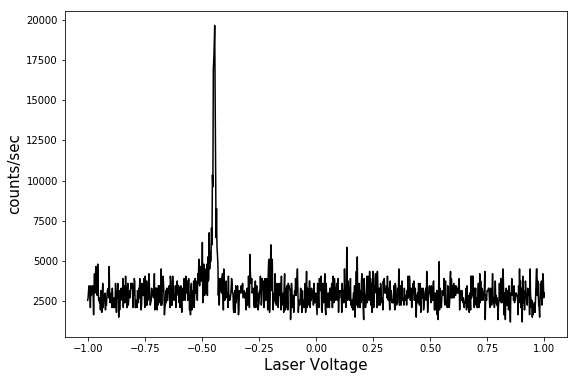

In [42]:
greenFunc()

time.sleep(0.1)

mw_pleA1()

counts = laserscannerlogic._do_next_one_line()
tempcounts = [ee for ee in counts if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(counts)),counts,'-',color = 'black')
plt.xlabel('Laser Voltage', fontsize = 15)
plt.ylabel('counts/sec', fontsize = 15)
plt.show()

In [17]:
_v_max_A1

-0.45

In [129]:
mw_pleA1()


In [197]:
kill_scanner()

In [218]:

_v_min_A1 = -1
_v_max_A1 = 1
speed_A1 = 0.1

start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

In [219]:
green

array([0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)

In [220]:
greenFunc()
time.sleep(0.01)
mw_pleA1()


time.sleep(1e-2)
c = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
if isinstance(c,int):
    print (c)

In [223]:
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')

6.951703951494878


461.6


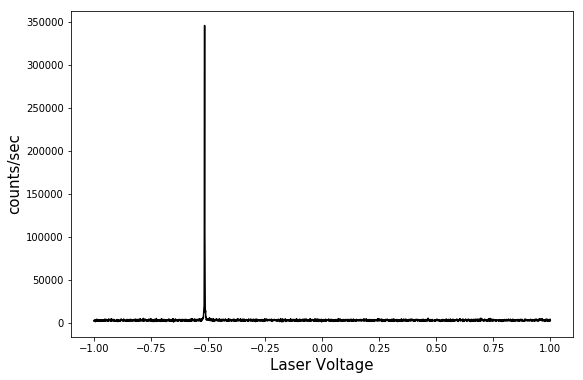

In [172]:
# 170 MW off
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')

396.2857142857143


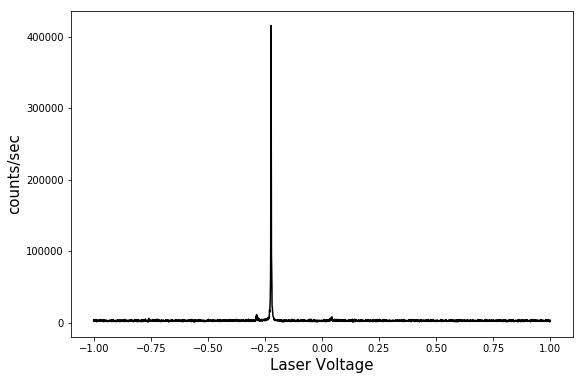

In [166]:
# 170
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')

430.4


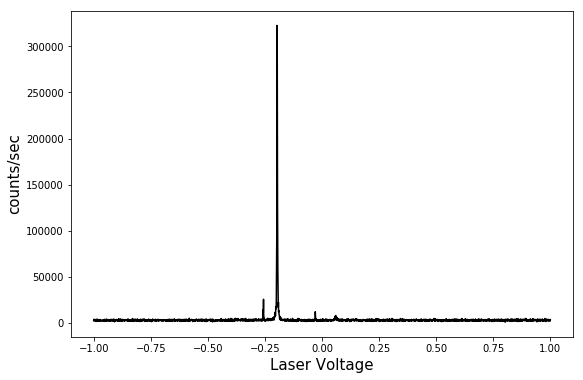

In [158]:
# 180
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')

201.0


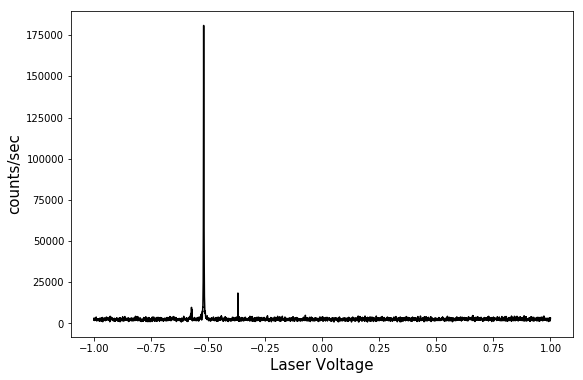

In [156]:
# 225
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')

1292.0


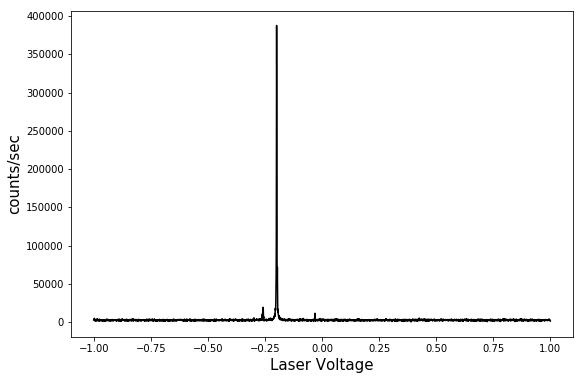

In [154]:
# 180
if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')

642.0


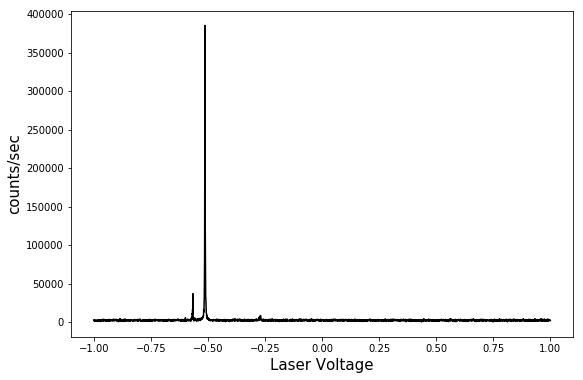

In [152]:
# 170

if not isinstance(c,int):
    tempcounts = [ee for ee in c if ee!=0]
    print( max(tempcounts)/min(tempcounts))

    plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
    plt.xlabel('Laser Voltage', fontsize = 15)
    plt.ylabel('counts/sec', fontsize = 15)
    plt.show()
else:
    print('something is wrong with counts')

In [34]:
laserscannerlogic.set_clock_frequency(150)

0

In [247]:
offFunc()
resonanceA1 = np.linspace(_v_min_A1,_v_max_A1,len(c))[np.argmax(c)]
laserscannerlogic._goto_speed = 0.1
laserscannerlogic._goto_during_scan(resonanceA1)
_v_min_A1 = resonanceA1 -0.015
_v_max_A1 = resonanceA1 +0.015
print(resonanceA1)
# print('_v_max ',_v_max)

-0.4484699494759068


In [178]:
mw_pleA1()


In [179]:
offFunc()

373.0


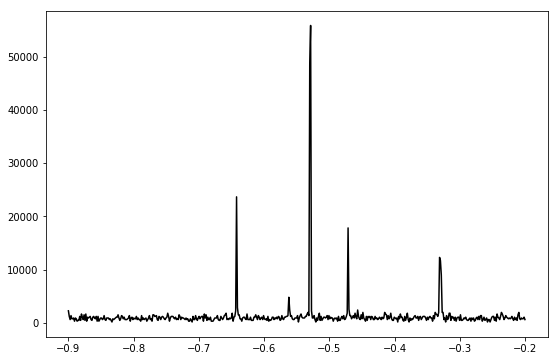

In [106]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-',color = 'black')
# plt.xlabel('Laser Voltage', fontsize = 15)
# plt.ylabel('counts/sec', fontsize = 15)
# plt.text(-0.69,20000,'A2', fontsize = 15)
# plt.text(-0.59,7000,'A1', fontsize = 15)
# plt.text(-0.57,40000,'Ex', fontsize = 15)
# plt.text(-0.46,15000,'Ey', fontsize = 15)
# plt.text(-0.32,7000,'E1,2', fontsize = 15)
# plt.savefig('nice PLE single scan.png')

plt.show()

#### Ex PLE

In [86]:

try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
        print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')


In [1215]:
print(_v_min_Ex)
print(_v_max_Ex)
print(speed_Ex)

1.7028609625668447
1.8228609625668448
0.1


In [213]:
kill_scanner()

In [214]:
_v_min_Ex = -2
_v_max_Ex =2.25
speed_Ex = 0.2

laserscannerlogic.set_laser_number(1)
start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
# start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)

In [217]:
_v_min_Ex = 1.5
_v_max_Ex =2.25
speed_Ex = 0.2

In [89]:
# speed_Ex = 0.1

# start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)


In [215]:
greenFunc()
time.sleep(0.1)
mw_pleEx()
c = PLE_Ex(laser_number = 0, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)



In [216]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min_Ex,_v_max_Ex,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()


Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-216-1f5f6124475f>", line 2, in <module>
    tempcounts = [ee for ee in c if ee!=0]
TypeError: 'int' object is not iterable


In [237]:
resonanceEx = np.linspace(_v_min_Ex,_v_max_Ex,len(c))[np.argmax(c)]
print(resonanceEx)
laserscannerlogic._goto_speed = 0.1
laserscannerlogic._goto_during_scan(resonanceEx)
_v_min_Ex = resonanceEx -0.06
_v_max_Ex = resonanceEx + 0.06

2.02355044162711


In [217]:
kill_scanner()


In [238]:
mw_pleEx()


In [239]:
offFunc()

In [741]:
laserscannerlogic._goto_during_scan(resonanceEx+0.02)


0

In [838]:
(_v_max-_v_min)/2

0.05500000000000005

In [371]:
greenFunc()

59.0


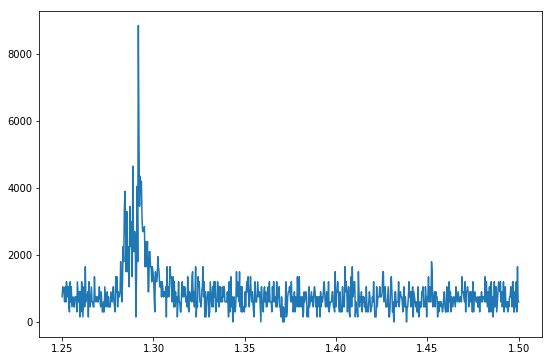

In [568]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min,_v_max,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()


# PLE locking script

#### A1

In [890]:
kill_scanner()


In [905]:
# _v_min_A1 = -0.68
# _v_max_A1 = -0.61
# speed_A1 = 0.05
resonanceA1_array=[]
start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

for i in range(100):
    greenFunc()
    time.sleep(0.01)
    mw_pleA1()

    time.sleep(1e-2)
    c = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
    if isinstance(c,int):
        print (c)

    offFunc()
    resonanceA1 = np.linspace(_v_min_A1,_v_max_A1,len(c))[np.argmax(c)]
    laserscannerlogic._goto_speed = 0.1
    laserscannerlogic._goto_during_scan(resonanceA1)
    _v_min_A1 = resonanceA1 -0.015
    _v_max_A1 = resonanceA1 +0.015
    resonanceA1_array.append(resonanceA1)
#     print(resonanceA1)    
#     print(_v_min_A1)
#     print(_v_max_A1)
#     print('-------')

kill_scanner()


In [909]:
_v_max_A1

-0.6222934250846737

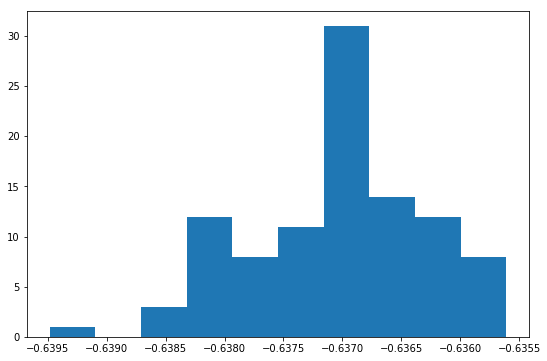

In [907]:
plt.hist(resonanceA1_array)
plt.show()

#### Ex

In [435]:
kill_scanner()


In [462]:
print(_v_min_Ex)
print(_v_max_Ex)
print(speed_Ex )

1.676387959866221
1.8763879598662212
0.1


In [416]:
start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

In [436]:
# _v_min = 1.
# _v_max = 1.1
# speed = 0.07

_v_min_Ex = 1.66
_v_max_Ex = 1.86
speed_Ex = 0.1

# laserscannerlogic.set_laser_number(1)

start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

In [454]:
greenFunc()
time.sleep(0.1)
mw_pleEx()
c = PLE_Ex(laser_number = 0, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)



415.0


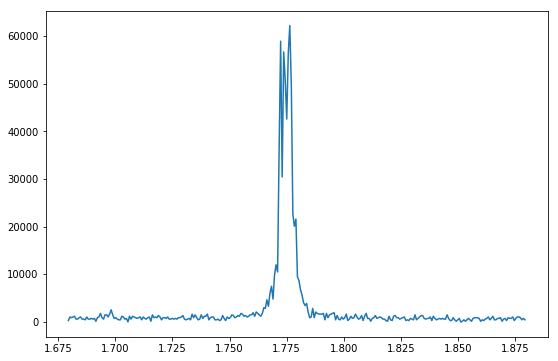

In [455]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min_Ex,_v_max_Ex,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()


In [456]:
resonanceEx = np.linspace(_v_min_Ex,_v_max_Ex,len(c))[np.argmax(c)]
print(resonanceEx)
laserscannerlogic._goto_speed = 0.1
laserscannerlogic._goto_during_scan(resonanceEx-0.01)
_v_min_Ex = resonanceEx -0.1
_v_max_Ex = resonanceEx + 0.1

1.7763879598662211


In [459]:
mw_pleEx()

In [460]:
offFunc()

In [461]:
kill_scanner()


In [78]:
# _v_min = 1.67
# _v_max = 1.78
# speed = 0.1

laserscannerlogic.set_laser_number(1)
resonanceEx_array = []
start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

for i in range(10):
    greenFunc()
    time.sleep(0.1)
    mw_pleEx()
    c = PLE_Ex(laser_number = 0, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
    
    resonanceEx = np.linspace(_v_min_Ex,_v_max_Ex,len(c))[np.argmax(c)]
    laserscannerlogic._goto_speed = 0.1
    laserscannerlogic._goto_during_scan(resonanceEx)
    time.sleep(0.2)
    _v_min_Ex = resonanceEx -0.06
    _v_max_Ex = resonanceEx + 0.06
    resonanceEx_array.append(resonanceEx)
#     print(_v_min_Ex)
#     print(_v_max_Ex)
#     print('-------')

kill_scanner()


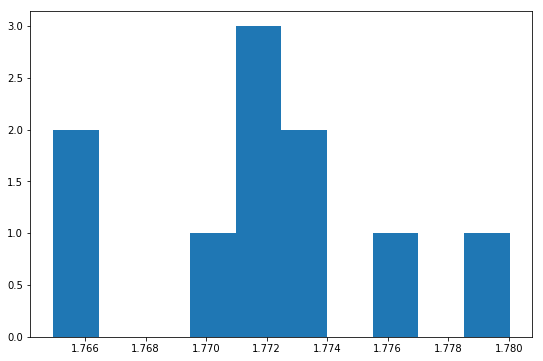

In [80]:
plt.hist(resonanceEx_array)
plt.show()

In [81]:
print(_v_min_Ex)
print(_v_max_Ex)

1.7099703039841343
1.8299703039841344


In [82]:
mw_pleEx()

In [83]:
offFunc()

# Autocorrelation measurements

#### Preparation

In [364]:
kill_scanner()

In [79]:
try:
    daq.DAQmxStopTask(main)    
    daq.DAQmxClearTask(main)
except:
    pass


try:
    daq.DAQmxStopTask(clock)
    daq.DAQmxClearTask(clock)

except:
    pass


#### Protocol

In [365]:
def do_sequence(voltages):
    
    global clock,main
    #=========Create clock channel on Dev4/Ctr0
    

    # Clock = daq.Task()
    duty_cycle = 0.5
    period = 10e-8
#     period = 5e-1

    clock_channel = '/Dev4/Ctr1'

    daq.DAQmxCreateTask('myClockTask', daq.byref(clock))
    # Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
    daq.DAQmxCreateCOPulseChanFreq(
        clock,
        clock_channel,  #  The name of the counter to use to create virtual channels
        "myClockChannel", # The name to assign to the created virtual channel
        daq.DAQmx_Val_Hz, # The units in which to specify freq.
        daq.DAQmx_Val_Low, # The resting state of the output terminal.
        0.0, # The amount of time in seconds to wait before generating the first pulse.
        1/float(period), # The frequency at which to generate pulses.
        duty_cycle, # The width of the pulse divided by the pulse period.
       )
    #=========Create clock channel on Dev4/Ctr0

    daq.DAQmxCreateTask('MainTask', daq.byref(main))

    ch0 = '/Dev4/port0/line0'
    ch1 = '/Dev4/port0/line1'
    ch2 = '/Dev4/port0/line2'
    ch3 = '/Dev4/port0/line3'
    ch4 = '/Dev4/port0/line4'

    daq.DAQmxCreateDOChan(
        main, 
        ch0, 
        'marker',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch1, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch2, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch3, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch4, 
        '',
        daq.DAQmx_Val_ChanPerLine)
    

    daq.DAQmxCfgSampClkTiming(
        # add to this task
        main,
        # use this channel as clock
        'Ctr1InternalOutput',
        # Maximum expected clock frequency
    #     1250,
        1/float(period),
        # Generate sample on falling edge
        daq.DAQmx_Val_Rising,
        # generate finite number of samples
        daq.DAQmx_Val_FiniteSamps,
        # number of samples to generate
        len(voltages[0]))

    # Sets only the number of samples to acquire or generate without specifying timing. 
    daq.DAQmxCfgImplicitTiming(
        clock,
        daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
        1000 # the buffer size
    )

    daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)

    _AONwrittenMaster = daq.int32()

    daq.DAQmxWriteDigitalLines(
    # daq.DAQmxWriteDigitalU32(
                # write to this task
                main,
                # length of the command (points)
                len(voltages[0]),
                # start task immediately (True), or wait for software start (False)
                False,
                # maximal timeout in seconds for# the write process
                20,
                # Specify how the samples are arranged: each pixel is grouped by channel number

                daq.DAQmx_Val_GroupByChannel,
    #             daq.DAQmx_Val_GroupByScanNumber,
                # the voltages to be written
                voltages,
                # The actual number of samples per channel successfully written to the buffer
                daq.byref(_AONwrittenMaster),
                # Reserved for future use. Pass NULL(here None) to this parameter
                None)
    try:
        daq.DAQmxStartTask(main)
        daq.DAQmxStartTask(clock)


        daq.DAQmxWaitUntilTaskDone(main, 5)

        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)

        daq.DAQmxClearTask(main)
        daq.DAQmxClearTask(clock)
    except:
        print('smth wrong')

        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)

        daq.DAQmxClearTask(main)
        daq.DAQmxClearTask(clock)

In [410]:
kill_scanner()

In [419]:
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    end_channel=5,
    n_values=1000)

In [420]:
laserscannerlogic.set_scan_lines(1e6)

start = 0.1e-6
stop = 10.1e-6
n = 10 # amount of points
step = (stop-start) / n
m = 301# how much times should code measure every point
# data = np.zeros((n,m))
data = []
threshhold = 100
rr =[]

offFunc()
times = np.linspace(start,stop,n)
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    end_channel=5,
    n_values=1000)   #???? increase buffer size

_v_min_A1 = -0.62
_v_max_A1 = -0.57
speed_A1 = 0.02



_v_min_Ex =1.2
_v_max_Ex =1.37
speed_Ex = 0.05



try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
#         print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')


greenFunc()
time.sleep(0.1)

clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

for t_index in range(len(times)):
    temp_data=[]
    main_temp_data=[]
    countBM.clear()
    period = 10e-8   
    t = int(times[t_index]/period)             
#     print(t)
    start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
    mw_pleA1()
    counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

    if isinstance(counts_A1,int):
        if counts_A1 == -1:
            print('counts_A1 are None')
            break;
        if counts_A1 ==0:
            print('cant find PLE line _A1')
            break;

    offFunc()
    resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
    laserscannerlogic._goto_during_scan(resonance_A1)     
            
    kill_scanner()    
    
    
    
    start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
    mw_pleEx()
    counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

    if isinstance(counts_Ex,int):  
        if counts_Ex == -1:
            print('counts_Ex are None')
            break;
        if counts_Ex ==0:
            print('cant find PLE line _Ex')
            break;

    offFunc()
    resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
    laserscannerlogic._goto_during_scan(resonance_Ex)            
    kill_scanner()    
    countBM.clear()
    
    
    voltagesA1 =     [0]*10 + [0]*5 + [1] * delayA1 + [1] * t + [0] * delayA1 + [0] 
    voltagesEx =     [0]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
    voltagesMW =     [1]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
    voltagesGreen =  [0]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
    voltagesDetect = [0]*10 + [0]*5 + [0] * delayA1 + [1] * t + [1] * delayA1 + [0] 

    voltages = np.array(
         np.vstack([
             voltagesDetect,
             voltagesMW,
             voltagesGreen,
             voltagesEx,             
             voltagesA1
         ]), dtype=np.uint8)


    for i in range(m):
        
        if i%100 ==0 and i>0:

            fastcounter._tagger.sync()   
            temp_data.append(countBM.getData())
            
            countBM.clear()
            fastcounter._tagger.sync()  

            task.StartTask()
            task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
            time.sleep(10e-3)  
            task.StopTask()
            offFunc()
            # ======================== experiment======================
            fastcounter._tagger.sync()   

            ratio = np.sum(countBM.getData())
            fastcounter._tagger.sync()   
            countBM.clear()

            if ratio>threshhold:
                main_temp_data.append(temp_data)   
                offFunc()                
            else:            
                start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
                mw_pleA1()
                counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

                if isinstance(counts_A1,int):                                                    
                    if counts_A1 == -1:
                        print('counts_A1 are None')
                        break;
                    if counts_A1 ==0:
                        print('cant find PLE line _A1')
                        break;          
                
                resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
                laserscannerlogic._goto_during_scan(resonance_A1)
                
                kill_scanner()
                start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
                mw_pleEx()
                counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)   
                
                if isinstance(counts_Ex,int):  
                    if counts_Ex == -1:
                        print('counts_Ex are None')
                        break;
                    if counts_Ex ==0:
                        print('cant find PLE line _Ex')
                        break;                
                
                resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
                laserscannerlogic._goto_during_scan(resonance_Ex)  
                kill_scanner()
       
            temp_data = []
            
        
        do_sequence(voltages)
#         fastcounter._tagger.sync()   
#         temp_data.append(countBM.getData())
        
    data.append(main_temp_data)

    
# print(data)

#### Autocorrelation A1 

In [430]:
kill_scanner()

In [652]:
from TimeTagger import Correlation, StartStop
laserscannerlogic.set_scan_lines(1e6)

start = 0.1e-6
stop = 10.1e-6
n = 10 # amount of points
step = (stop-start) / n
m = 150001# how much times should code measure every point
# data = np.zeros((n,m))
data = []
threshhold = 100
rr =[]

offFunc()
times = np.linspace(start,stop,n)
  
# countBM = tt.CountBetweenMarkers(
#     tagger=fastcounter._tagger,
#     click_channel=1,
#     begin_channel=5,
#     end_channel=5,
#     n_values=1000)   #???? increase buffer size

_v_min_A1 = -0.62
_v_max_A1 = -0.57
speed_A1 = 0.02


_v_min_Ex =1.2
_v_max_Ex =1.37
speed_Ex = 0.05


n_bins=500
binwidth=100000
corr = Correlation(tagger=fastcounter._tagger,
            channel_1=1, 
            channel_2=5,
            binwidth=binwidth, 
            n_bins=n_bins)



# ss = StartStop(
#     tagger=fastcounter._tagger,
#     click_channel = 1,
#     start_channel = 5,
#     binwidth= binwidth)



_v_min_Ex =1.2
_v_max_Ex =1.37
speed_Ex = 0.05


try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
#         print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')


greenFunc()
time.sleep(0.1)

clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

temp_data=[]
main_temp_data=[]
# countBM.clear()
period = 10e-8   

start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
mw_pleA1()
counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

if isinstance(counts_A1,int):
    if counts_A1 == -1:
        print('counts_A1 are None')
    if counts_A1 ==0:
        print('cant find PLE line _A1')

offFunc()
resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
laserscannerlogic._goto_during_scan(resonance_A1)     

kill_scanner()   



    
# start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
# mw_pleEx()
# counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

# if isinstance(counts_Ex,int):  
#     if counts_Ex == -1:
#         print('counts_Ex are None')
#     if counts_Ex ==0:
#         print('cant find PLE line _Ex')

# offFunc()
# resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
# laserscannerlogic._goto_during_scan(resonance_Ex)            
# kill_scanner()

countBM.clear()

t = 1000
delayA1 = 0
x=[]
y=np.zeros(n_bins)

voltagesA1 =     [0]*10 + [0]*5 + [1] * delayA1 + [1] * t + [0] * delayA1 + [0] 
voltagesEx =     [0]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
voltagesMW =     [1]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
voltagesGreen =  [0]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
voltagesDetect = [0]*10 + [0]*5 + [0] * delayA1 + [1] * t + [1] * delayA1 + [0] 



voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)

corr.clear()
data = []
# ss.clear()
for i in range(m):
    if i%100 ==0 and i>0: 
        fastcounter._tagger.sync()  
#         data.append(ss.getData())
        x = corr.getIndex() / 1e3
        y = y+corr.getData()
        fastcounter._tagger.sync()  
        
        start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
        mw_pleA1()
        counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
        if isinstance(counts_A1,int):                                                    
            if counts_A1 == -1:
                print('counts_A1 are None')
                break;
            if counts_A1 ==0:
                print('cant find PLE line _A1')
                break;          

        resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
        laserscannerlogic._goto_during_scan(resonance_A1)
        kill_scanner()
        
#         start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
#         mw_pleEx()
#         counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

#         if isinstance(counts_Ex,int):  
#             if counts_Ex == -1:
#                 print('counts_Ex are None')
#             if counts_Ex ==0:
#                 print('cant find PLE line _Ex')

#         offFunc()
#         resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
#         laserscannerlogic._goto_during_scan(resonance_Ex)            
#         kill_scanner()         
#         corr.clear()
        
    do_sequence(voltages)


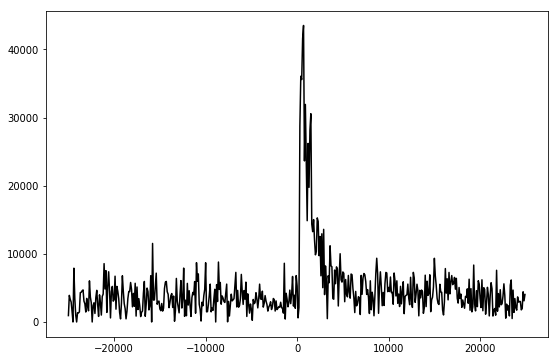

In [729]:
plt.plot(x,y, color = 'black')

plt.show()

In [655]:
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [661]:
data_file = open('A1 decay correlation measurement.txt', 'w')
for index in range(len(x)):
    s = str(x[index]) +'\t'+ str(y[index]) +'\n'
    data_file.write(s)

data_file.close()

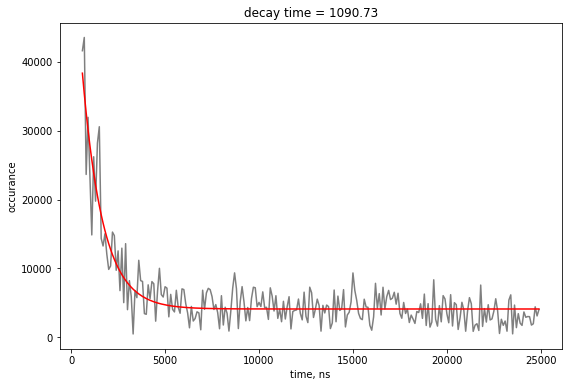

In [732]:
from scipy import optimize

xdata = []
ydata = []

for j in range(len(x)):
    if x[j]>500:
        xdata.append(x[j])
        ydata.append(y[j])

def fit_func (x,a,c,t):
    return a *np.exp(-x/t) + c

bounds = ([30000,2000,500],[70000,10000,5000])
params, cov = optimize.curve_fit(f = fit_func, xdata = xdata, ydata = ydata,p0=[60000,5000,5000],bounds = bounds)
# #                                                p0=[0.5,3.3e7,0.2,0.8,1e-6],bounds = bounds)

# print(params)
plt.plot(xdata,ydata,color ='black', alpha = 0.5)

plt.plot(xdata,fit_func(np.array(xdata), *params),color = 'red')
plt.title('decay time = '+str(np.round(params[2],2)))
plt.xlabel('time, ns')
plt.ylabel('occurance')
plt.savefig('for telegram to send.png')
plt.show()

In [724]:
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

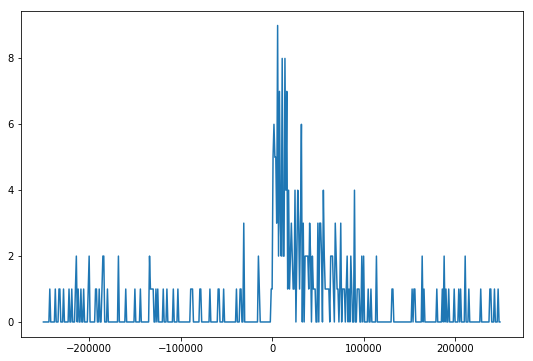

In [622]:
fastcounter._tagger.sync()  

plt.plot(x,y)
plt.show()

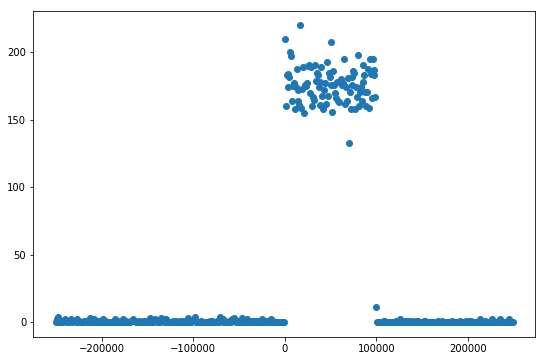

In [614]:
fastcounter._tagger.sync()  

plt.plot(x,y,'o')
plt.show()

#### Autocorrelation Ex

In [270]:
def do_sequence(voltages):
    
    global clock,main
    #=========Create clock channel on Dev4/Ctr0
    

    # Clock = daq.Task()
    duty_cycle = 0.5
    period = 10e-8
#     period = 5e-1

    clock_channel = '/Dev4/Ctr1'

    daq.DAQmxCreateTask('myClockTask', daq.byref(clock))
    # Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
    daq.DAQmxCreateCOPulseChanFreq(
        clock,
        clock_channel,  #  The name of the counter to use to create virtual channels
        "myClockChannel", # The name to assign to the created virtual channel
        daq.DAQmx_Val_Hz, # The units in which to specify freq.
        daq.DAQmx_Val_Low, # The resting state of the output terminal.
        0.0, # The amount of time in seconds to wait before generating the first pulse.
        1/float(period), # The frequency at which to generate pulses.
        duty_cycle, # The width of the pulse divided by the pulse period.
       )
    #=========Create clock channel on Dev4/Ctr0

    daq.DAQmxCreateTask('MainTask', daq.byref(main))

    ch0 = '/Dev4/port0/line0'
    ch1 = '/Dev4/port0/line1'
    ch2 = '/Dev4/port0/line2'
    ch3 = '/Dev4/port0/line3'
    ch4 = '/Dev4/port0/line4'

    daq.DAQmxCreateDOChan(
        main, 
        ch0, 
        'marker',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch1, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch2, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch3, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch4, 
        '',
        daq.DAQmx_Val_ChanPerLine)
    

    daq.DAQmxCfgSampClkTiming(
        # add to this task
        main,
        # use this channel as clock
        'Ctr1InternalOutput',
        # Maximum expected clock frequency
    #     1250,
        1/float(period),
        # Generate sample on falling edge
        daq.DAQmx_Val_Rising,
        # generate finite number of samples
        daq.DAQmx_Val_FiniteSamps,
        # number of samples to generate
        len(voltages[0]))

    # Sets only the number of samples to acquire or generate without specifying timing. 
    daq.DAQmxCfgImplicitTiming(
        clock,
        daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
        1000 # the buffer size
    )

    daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)

    _AONwrittenMaster = daq.int32()

    daq.DAQmxWriteDigitalLines(
    # daq.DAQmxWriteDigitalU32(
                # write to this task
                main,
                # length of the command (points)
                len(voltages[0]),
                # start task immediately (True), or wait for software start (False)
                False,
                # maximal timeout in seconds for# the write process
                20,
                # Specify how the samples are arranged: each pixel is grouped by channel number

                daq.DAQmx_Val_GroupByChannel,
    #             daq.DAQmx_Val_GroupByScanNumber,
                # the voltages to be written
                voltages,
                # The actual number of samples per channel successfully written to the buffer
                daq.byref(_AONwrittenMaster),
                # Reserved for future use. Pass NULL(here None) to this parameter
                None)
    try:
        daq.DAQmxStartTask(main)
        daq.DAQmxStartTask(clock)


        daq.DAQmxWaitUntilTaskDone(main, 5)

        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)

        daq.DAQmxClearTask(main)
        daq.DAQmxClearTask(clock)
    except:
        print('smth wrong')

        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)

        daq.DAQmxClearTask(main)
        daq.DAQmxClearTask(clock)

In [510]:
from TimeTagger import Correlation, StartStop
laserscannerlogic.set_scan_lines(1e6)
begin=time.time()

start = 0.1e-6
stop = 10.1e-6
# n = 10 # amount of points
step = (stop-start) / n
m = 100# how much times should code measure every point
# data = np.zeros((n,m))
data = []
threshhold = 100
rr =[]

offFunc()
times = np.linspace(start,stop,n)

_v_min_A1 = -0.62
_v_max_A1 = -0.57
speed_A1 = 0.02


_v_min_Ex =1.25
_v_max_Ex =1.5
speed_Ex = 0.05

n_bins=500
binwidth=1000000
corr = Correlation(tagger=fastcounter._tagger,
            channel_1=1, 
            channel_2=5,
            binwidth=binwidth, 
            n_bins=n_bins)


# _v_min_Ex =1.2
# _v_max_Ex =1.37
# speed_Ex = 0.05


try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
#         print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')

greenFunc()
time.sleep(0.1)

clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

temp_data=[]
main_temp_data=[]
period = 10e-8   
    
start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
mw_pleEx()
counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

if isinstance(counts_Ex,int):  
    if counts_Ex == -1:
        print('counts_Ex are None')
    if counts_Ex ==0:
        print('cant find PLE line _Ex')

offFunc()
resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
laserscannerlogic._goto_during_scan(resonance_Ex)            
kill_scanner()

countBM.clear()

t = 3000
delayA1 = 0
x=[]
y=np.zeros(n_bins)

voltagesA1 =      np.array([[0]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0]]*100 ).flatten()
voltagesEx =      np.array([[0]*10 + [0]*5 + [1] * delayA1 + [1] * t + [0] * delayA1 + [0]]*100 ).flatten()
voltagesMW =      np.array([[1]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0]]*100 ).flatten()
voltagesGreen =   np.array([[0]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0]]*100 ).flatten()
voltagesDetect =  np.array([[0]*10 + [0]*5 + [0] * delayA1 + [1] * t + [1] * delayA1 + [0]]*100 ).flatten()



voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)

corr.clear()
data = []

for i in range(m):
    do_sequence(voltages)

    fastcounter._tagger.sync()  
    x = corr.getIndex() / 1e3
    y = y+corr.getData()
    fastcounter._tagger.sync()  
    
    start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
    mw_pleEx()
    counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

    if isinstance(counts_Ex,int):  
        if counts_Ex == -1:
            print('counts_Ex are None')
        if counts_Ex ==0:
            print('cant find PLE line _Ex')

    offFunc()
    resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
    laserscannerlogic._goto_during_scan(resonance_Ex)            
    kill_scanner()    
    
    corr.clear()
end=time.time()

print(end-begin)

1264.963439464569


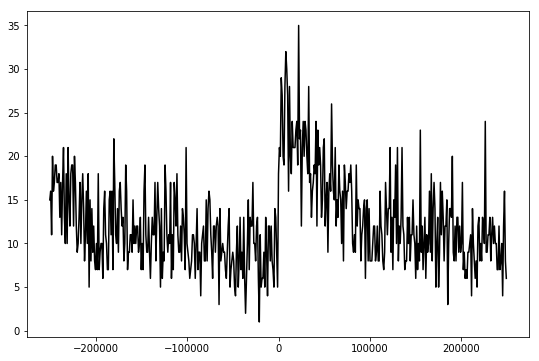

In [511]:
plt.plot(x,y, color = 'black')
# plt.savefig('for telegram to send.png')

plt.show()
n_bins=300
binwidth=1000000
bot.sendMessage(chat_id=chat_id, text='n_bins=500 binwidth=1000000')

# bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

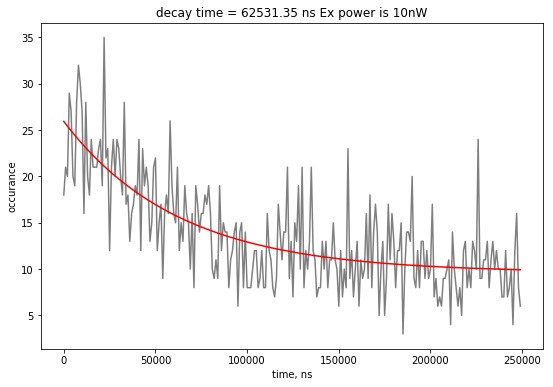

In [512]:
from scipy import optimize

xdata = []
ydata = []

for j in range(len(x)):
    if x[j]>-1000:
        xdata.append(x[j])
        ydata.append(y[j])

def fit_func (x,a,c,t):
    return a *np.exp(-x/t) + c

bounds = ([30000,2000,500],[70000,10000,5000])
params, cov = optimize.curve_fit(f = fit_func, xdata = xdata, ydata = ydata,p0=[60,5,5000])#,bounds = bounds)
# #                                                p0=[0.5,3.3e7,0.2,0.8,1e-6],bounds = bounds)

# print(params)
plt.plot(xdata,ydata,color ='black', alpha = 0.5)

plt.plot(xdata,fit_func(np.array(xdata), *params),color = 'red')
plt.title('decay time = '+str(np.round(params[2],2))+' ns Ex power is 10nW')
plt.xlabel('time, ns')
plt.ylabel('occurance')
plt.savefig('for telegram to send.png')
plt.show()
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))
bot.sendMessage(chat_id=chat_id, text='covariances: '+str(np.sqrt(cov)))


In [479]:
np.sqrt(cov)

array([[1.99154240e+00,            nan,            nan],
       [           nan, 5.04525916e-01,            nan],
       [           nan,            nan, 2.05503481e+03]])

In [ ]:
for index in range()

In [513]:
data_file = open('Ex decay correlation measurement 10nW.txt', 'w')
for index in range(len(x)):
    s = str(x[index]) +'\t'+ str(y[index]) +'\n'
    data_file.write(s)

data_file.close()

In [407]:
mw_pleEx()

In [418]:
bot.sendMessage(chat_id=chat_id, text='I have finished')


In [403]:
new_hist=[]
temp_hist=[]

for j in range(int(len(x)/10)):
    new_hist.append(np.sum(y[j:j+10]))
    

In [443]:
len(new_hist)

100

In [388]:
# x[::10]

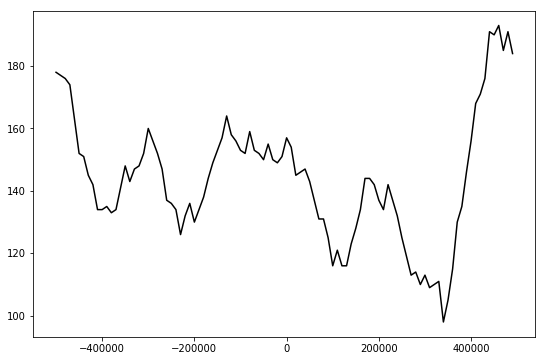

In [405]:

plt.plot(x[::10],new_hist, color = 'black')
plt.show()


In [377]:
len(x)/10

200.0

In [475]:
mw_pleEx()

In [328]:
offFunc()

In [327]:
mw_pleA1()

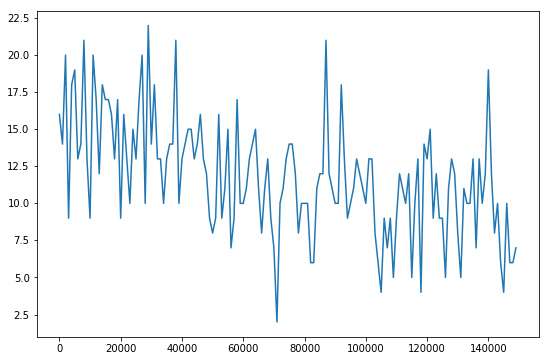

In [472]:
import pandas as pd
names = ['xx','yy']
df = pd.read_csv('Ex decay correlation measurement 5nW.txt', delimiter = '\t',names = names)
xx=[]
yy=[]
for i in range(len(df['xx'])):
    if(df['xx'][i]>-1000):
        xx.append(df['xx'][i])
        yy.append(df['yy'][i])
    
plt.plot(xx,yy)
plt.show()

[8.58314191e+00 7.98839953e+00 7.64700922e+04]


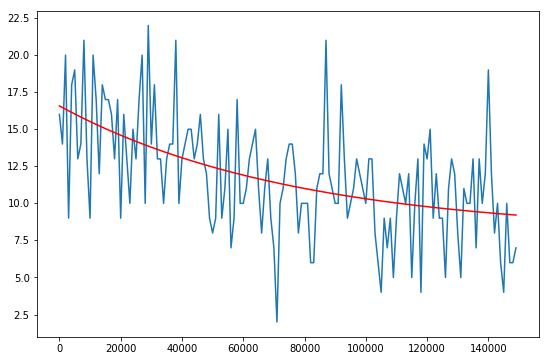

In [473]:

def fit_func (x,a,c,t):
    return a *np.exp(-x/t) + c

params, cov = optimize.curve_fit(f = fit_func, xdata = xx, ydata = yy,p0=[60,5,50000])#,bounds = bounds)
# #                                                p0=[0.5,3.3e7,0.2,0.8,1e-6],bounds = bounds)

# print(params)
# plt.plot(xdata,ydata,color ='black', alpha = 0.5)
plt.plot(xx,yy)

plt.plot(xx,fit_func(np.array(xx), *params),color = 'red')
print(params)
plt.show()

In [474]:
np.sqrt(cov)

array([[1.71943624e+00,            nan, 2.36695762e+02],
       [           nan, 2.08351221e+00,            nan],
       [2.36695762e+02,            nan, 4.29848079e+04]])

# Data processing

In [421]:
bot.sendMessage(chat_id=chat_id, text='I have finished')


In [422]:
for d in data:
    print(len(d[1]))

1
1
1
1
1
1
1
1
1
1


In [171]:
kill_scanner()

In [170]:
greenFunc()

In [278]:
data_processing = []
for d in data:
    tempcounts = [ee for ee in d if ee!=0]
    data_processing.append(np.sum(tempcounts))

Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-278-e9129f1a8969>", line 3, in <module>
    tempcounts = [ee for ee in d if ee!=0 and ee<10]
  File "<ipython-input-278-e9129f1a8969>", line 3, in <listcomp>
    tempcounts = [ee for ee in d if ee!=0 and ee<10]
TypeError: '<' not supported between instances of 'list' and 'int'


In [271]:
data_processing

[953, 219525, 147492, 81999, 150151, 288013]

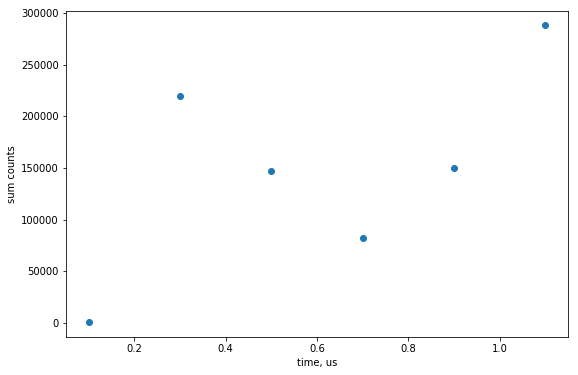

In [272]:
plt.plot(times*1e6,data_processing,'o')
plt.xlabel('time, us')
plt.ylabel('sum counts')
plt.savefig('for telegram to send.png')
plt.show()

In [150]:
bot.sendMessage(chat_id=chat_id, text='try A1 duration test m =3001, n=20 Sum Counts')
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [273]:
data_processing = []
for d in data:
    tempcounts = [ee for ee in d if ee!=0]
    data_processing.append(np.average(tempcounts)/100)

In [274]:
data_processing

[0.0031766666666666666, 0.73175, 0.49164, 0.27332999999999996, 0.5005033333333333, 0.9600433333333334]

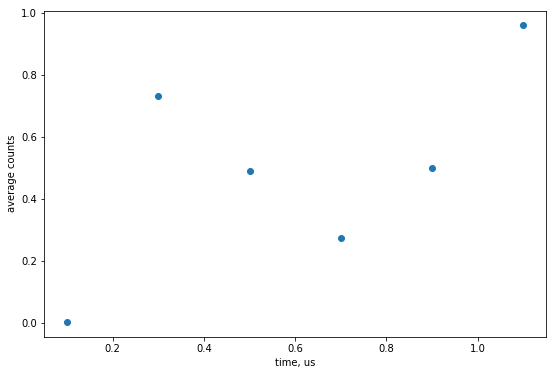

In [275]:
plt.plot(times*1e6,data_processing,'o')
plt.xlabel('time, us')
plt.ylabel('average counts')
plt.savefig('for telegram to send.png')
plt.show()

In [154]:
bot.sendMessage(chat_id=chat_id, text='try A1 duration test m =3001, n=20  Average Counts')
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [424]:
data_processing = []
for every_time in data:
    every_time_array=[] 

    for meas_pack in every_time:
        meas_pack_array = []
        for every_meas in meas_pack:
#             tempcounts = [ee for ee in every_meas if ee!=0]
#             if len(tempcounts) >=999:
#                 print('you,probably, had buffer overflow')
            meas_pack_array.append(np.sum(every_meas)/100)
            
        every_time_array.append(np.average(meas_pack_array))
        
    data_processing.append(np.average(every_time_array))


In [425]:
data_processing

[3.4033333333333338, 3.3533333333333335, 3.736666666666667, 3.8, 4.083333333333333, 4.023333333333333, 3.5933333333333333, 3.546666666666667, 3.676666666666667, 3.31]

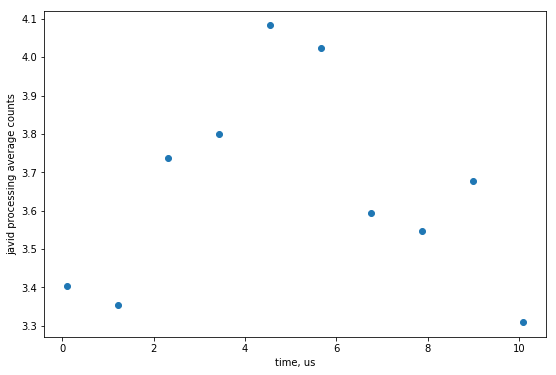

In [426]:
plt.plot(times*1e6,data_processing,'o')
plt.xlabel('time, us')
plt.ylabel('javid processing average counts')
# plt.savefig('for telegram to send.png')
plt.show()

In [158]:
bot.sendMessage(chat_id=chat_id, text='try A1 duration test m =3001, n=20 javid processing average Counts')
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [332]:
mw_pleA1()

In [ ]:
start 15:23 10 Nov 2019

In [418]:
main_temp_data

[[array([ 0,  3,  0,  2,  0,  4,  0,  6,  0,  5,  0,  1,  0,  3,  0,  3,  0,
       10,  0,  5,  0,  4,  0,  1,  0,  1,  0,  1,  0,  2,  0,  4,  0,  3,
        0,  2,  0,  3,  0,  3,  0,  8,  0,  3,  0,  3,  0,  3,  0,  3,  0,
        2,  0,  4,  0,  4,  0,  4,  0,  3,  0,  4,  0,  1,  0,  3,  0,  3,
        0,  2,  0,  1,  0,  4,  0,  2,  0,  3,  0,  1,  0,  2,  0,  3,  0,
        5,  0,  1,  0,  3,  0,  2,  0,  3,  0,  3,  0,  1,  0,  3,  0,  6,
        0,  2,  0,  3,  0,  1,  0,  4,  0,  4,  0,  4,  0,  5,  0,  3,  0,
        4,  0,  2,  0,  4,  0,  2,  0,  3,  0,  3,  0,  5,  0,  2,  0,  2,
        0,  3,  0,  1,  0,  6,  0,  2,  0,  3,  0,  2,  0,  3,  0,  2,  0,
        2,  0,  3,  0,  0,  0,  2,  0,  3,  0,  4,  0, 38,  0,  2,  0,  3,
        0,  7,  0,  3,  0,  3,  0,  8,  0,  2,  0,  4,  0,  2,  0,  4,  0,
        1,  0,  2,  0,  2,  0,  0,  0,  2,  0,  4,  0, 59,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0, 

In [413]:
data_processing = []
for index, every_time in enumerate(data):
    every_time_array=[] 

    for meas_pack in every_time:
        meas_pack_array = []
        for every_meas in meas_pack:
            tempcounts = [ee for ee in every_meas if ee<10]
#             tempcounts = every_meas
#             if len(tempcounts) >=999:
#                 print('you,probably, had buffer overflow')
            meas_pack_array.append(np.sum(tempcounts)/100)
#         plt.plot([times[index]]*len(meas_pack_array),meas_pack_array)
        every_time_array.append(np.average(meas_pack_array))
        
    data_processing.append(np.average(every_time_array))


In [415]:
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [371]:
# tempcounts

In [372]:
print(np.sum(every_meas))


231


In [416]:
data_processing

[2.504137931034483, 2.541, 2.5289999999999995, 2.5380000000000007, 2.674666666666667, 2.5534482758620696, 2.5230000000000006, 2.536, 2.547333333333333, 2.5696666666666674]

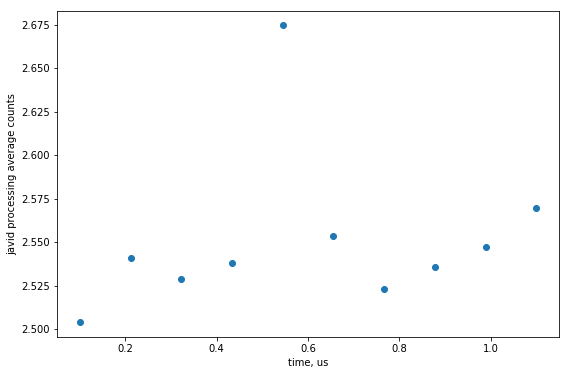

In [414]:
plt.plot(times[0:len(data_processing)]*1e6,data_processing,'o')
plt.xlabel('time, us')
plt.ylabel('javid processing average counts')
plt.savefig('for telegram to send.png')
plt.show()

In [ ]:
plt.plot(times*1e6,data_processing,'o')
plt.xlabel('time, us')
plt.ylabel('javid processing average counts')
# plt.savefig('for telegram to send.png')
plt.show()

In [295]:
begin = time.time()
countBM.clear()
fastcounter._tagger.sync()  
end = time.time()
print(end-begin)

0.1670529842376709


# Check function debugging


##### A1

In [590]:
kill_scanner()

In [591]:
_v_min = -0.755
_v_max = -0.735
speed = 0.01


start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)


In [592]:
mw_pleA1()
counts = PLE_A1(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)

163.0


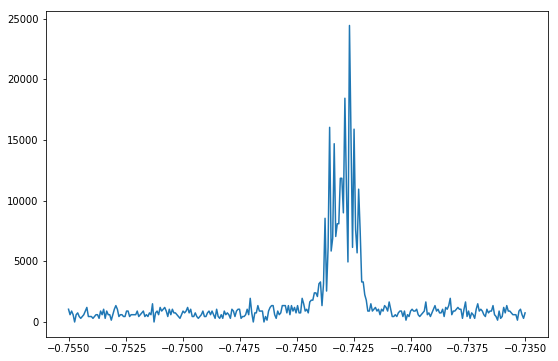

In [593]:
tempcounts = [ee for ee in counts if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min,_v_max,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()

In [594]:
offFunc()
laserscannerlogic._goto_speed = 0.01

resonanceA1 = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
laserscannerlogic._goto_during_scan(resonanceA1)     
            

0

In [499]:
mw_pleA1()


In [500]:
offFunc()

##### Ex

In [595]:
kill_scanner()

In [596]:
_v_min = 0.4
_v_max = 0.7
speed = 0.1

laserscannerlogic.set_laser_number(1)

start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)

In [597]:
greenFunc()
time.sleep(0.1)
mw_pleEx()
c = PLE_Ex(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)



539.0


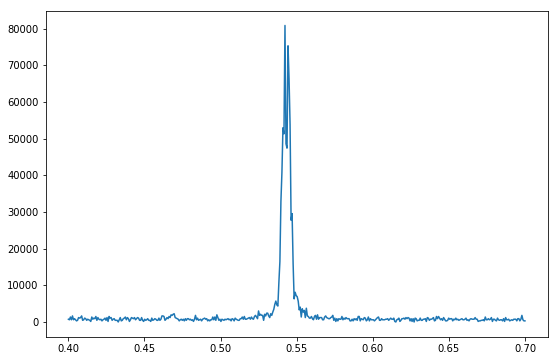

In [598]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min,_v_max,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()


In [599]:
resonanceEx = np.linspace(_v_min,_v_max,len(c))[np.argmax(c)]
print(resonanceEx)
laserscannerlogic._goto_speed = 0.1
laserscannerlogic._goto_during_scan(resonanceEx)
# _v_min =resonance -0.02
# _v_max = resonance + 0.02

0.5423162583518931


0

In [533]:
mw_pleEx()


In [560]:
offFunc()

##### Check

In [ ]:
mw_pleEx()


In [538]:
mw_pleA1()


In [33]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
#     task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, mw_trig+ markers ,None,None)
task.StopTask()

In [34]:
offFunc()

In [35]:
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    n_values=1000) 
countBM.clear()

rr=[]
countBM.clear()
fastcounter._tagger.sync()   

for y in range(10):
    
    countBM.clear()
    fastcounter._tagger.sync()  
    
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
#     task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, mw_trig+ markers ,None,None)

    time.sleep(10e-3)  
    task.StopTask()
    offFunc()
    # ======================== experiment======================
    fastcounter._tagger.sync()   

    ratio = np.sum(countBM.getData())
    fastcounter._tagger.sync()   

    rr.append(ratio)
    
print(np.average(rr))

# if ratio>6:
#     main_temp_data.append(temp_data)   
#     offFunc()
# else:
#     start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)
#     mw_pleA1()
#     mw_pleA1()
#     counts = PLE_A1(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)

# resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
# #             _v_min = resonance -0.01
# #             _v_max = resonance + 0.01
# offFunc()
# laserscannerlogic._goto_during_scan(resonance)
# temp_data = []


140.7


In [586]:
rr_noise

[62, 72, 79, 72, 73, 69, 96, 81, 76, 80, 82, 90, 83, 76, 70, 71, 78, 88, 72, 65, 73, 74, 68, 60, 55, 73, 74, 93, 78, 88, 77, 72, 68, 84, 76, 70, 83, 85, 86, 67, 98, 86, 75, 66, 60, 86, 79, 82, 76, 67, 62, 77, 63, 69, 90, 65, 81, 77, 75, 70, 86, 75, 64, 64, 76, 74, 89, 67, 71, 72, 72, 83, 75, 76, 60, 81, 65, 72, 77, 68, 62, 93, 67, 71, 66, 75, 58, 77, 69, 73, 70, 79, 66, 88, 72, 68, 79, 80, 86, 83]

In [36]:
rr

[135, 123, 148, 119, 126, 185, 157, 149, 126, 139]

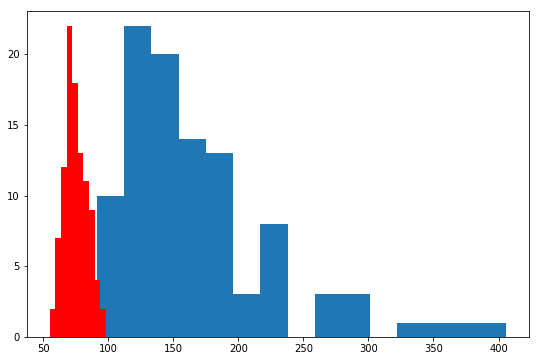

In [607]:
plt.hist(rr,bins = 15)

plt.hist(rr_noise,color = 'red')

plt.show()

In [ ]:
threshhold = 100

In [232]:
print(np.average(rr))
rr

218.0


[153, 250, 187, 170, 193, 262, 290, 276, 191, 208]

In [489]:
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    n_values=1000) 
countBM.clear()



rr=[]
countBM.clear()
fastcounter._tagger.sync()   

task.StartTask()

task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
# task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, mw_trig+ markers ,None,None)

time.sleep(1e-3)  
task.StopTask()
offFunc()
# ======================== experiment======================
fastcounter._tagger.sync()   

ratio = np.sum(countBM.getData())

fastcounter._tagger.sync()   

print(ratio)

91


In [816]:
bot.sendMessage(chat_id=chat_id, text="A1 check 1000 repetition each point")
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [219]:
begin = time.time()
for t_index in range(len(times)):
    for i in range(m):
            
        do_sequence(voltages)

end = time.time()
print(end-begin)    


In [224]:
greenFunc()

In [223]:
for d in data:
    print(np.average(d))

128.1594
382.7199
637.6189


# Noise estimation for A1 duration

In [955]:

times_noise = np.linspace(start,stop, 10) 
data_noise = []

for t in range(len(times_noise)):
    temp_data_noise =[]

    for i in range(5):    
        offFunc()

        time.sleep(0.001)

        task.StartTask()
        countBM.clear()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 + markers ,None,None)
        time.sleep(times_noise[t])  
        task.StopTask()
        offFunc()
        
        temp_data_noise.append(countBM.getData()[0])
    
    data_noise.append(temp_data_noise)
        

In [808]:

data_noise=[]
for i in range(100):
    countBM.clear()
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, mw_trig+ markers ,None,None)
    time.sleep(10e-3)  
    task.StopTask()
    offFunc()
    fastcounter._tagger.sync()   
    data_noise.append( np.sum(countBM.getData()))


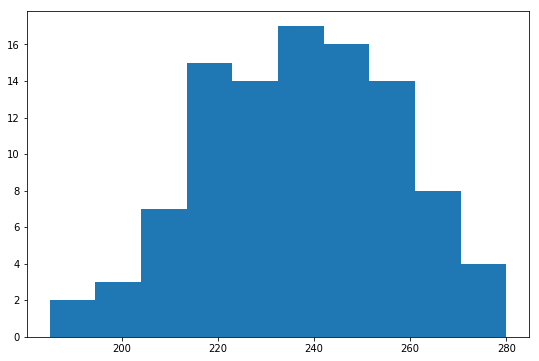

In [810]:
plt.hist(data_noise,bins = 10)
plt.show()


In [961]:
tttt_noise  = []
for d in data_noise:
#     print(d)
    tttt_noise.append(np.average(d))

print(tttt_noise)

[6.8, 165.0, 283.0, 443.6, 559.2, 704.0, 806.0, 958.0, 1114.6, 1239.0]


# Single Shot Readout

In [918]:
def do_sequence(voltages):
    
    global clock,main
    #=========Create clock channel on Dev4/Ctr0
    

    # Clock = daq.Task()
    duty_cycle = 0.5
    period = 10e-8
#     period = 5e-1

    clock_channel = '/Dev4/Ctr1'
    try:

        daq.DAQmxCreateTask('myClockTask', daq.byref(clock))
        # Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
        daq.DAQmxCreateCOPulseChanFreq(
            clock,
            clock_channel,  #  The name of the counter to use to create virtual channels
            "myClockChannel", # The name to assign to the created virtual channel
            daq.DAQmx_Val_Hz, # The units in which to specify freq.
            daq.DAQmx_Val_Low, # The resting state of the output terminal.
            0.0, # The amount of time in seconds to wait before generating the first pulse.
            1/float(period), # The frequency at which to generate pulses.
            duty_cycle, # The width of the pulse divided by the pulse period.
           )
        #=========Create clock channel on Dev4/Ctr0

        daq.DAQmxCreateTask('MainTask', daq.byref(main))

        ch0 = '/Dev4/port0/line0'
        ch1 = '/Dev4/port0/line1'
        ch2 = '/Dev4/port0/line2'
        ch3 = '/Dev4/port0/line3'
        ch4 = '/Dev4/port0/line4'
#         ch5 = '/Dev4/port0/line5'

        daq.DAQmxCreateDOChan(
            main, 
            ch0, 
            'marker',
            daq.DAQmx_Val_ChanPerLine)

        daq.DAQmxCreateDOChan(
            main, 
            ch1, 
            '',
            daq.DAQmx_Val_ChanPerLine)

        daq.DAQmxCreateDOChan(
            main, 
            ch2, 
            '',
            daq.DAQmx_Val_ChanPerLine)

        daq.DAQmxCreateDOChan(
            main, 
            ch3, 
            '',
            daq.DAQmx_Val_ChanPerLine)

        daq.DAQmxCreateDOChan(
            main, 
            ch4, 
            '',
            daq.DAQmx_Val_ChanPerLine)

    #     daq.DAQmxCreateDOChan(
    #         main, 
    #         ch5, 
    #         '',
    #         daq.DAQmx_Val_ChanPerLine)


        daq.DAQmxCfgSampClkTiming(
            # add to this task
            main,
            # use this channel as clock
            'Ctr1InternalOutput',
            # Maximum expected clock frequency
        #     1250,
            1/float(period),
            # Generate sample on falling edge
            daq.DAQmx_Val_Rising,
            # generate finite number of samples
            daq.DAQmx_Val_FiniteSamps,
            # number of samples to generate
            len(voltages[0]))

        # Sets only the number of samples to acquire or generate without specifying timing. 
        daq.DAQmxCfgImplicitTiming(
            clock,
            daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
            1000 # the buffer size
        )

        daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)

        _AONwrittenMaster = daq.int32()

        daq.DAQmxWriteDigitalLines(
        # daq.DAQmxWriteDigitalU32(
                    # write to this task
                    main,
                    # length of the command (points)
                    len(voltages[0]),
                    # start task immediately (True), or wait for software start (False)
                    False,
                    # maximal timeout in seconds for# the write process
                    20,
                    # Specify how the samples are arranged: each pixel is grouped by channel number

                    daq.DAQmx_Val_GroupByChannel,
        #             daq.DAQmx_Val_GroupByScanNumber,
                    # the voltages to be written
                    voltages,
                    # The actual number of samples per channel successfully written to the buffer
                    daq.byref(_AONwrittenMaster),
                    # Reserved for future use. Pass NULL(here None) to this parameter
                    None)
        daq.DAQmxStartTask(main)
        daq.DAQmxStartTask(clock)


        daq.DAQmxWaitUntilTaskDone(main, 5)

        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)

        daq.DAQmxClearTask(main)
        daq.DAQmxClearTask(clock)
    except:
        print('smth wrong')

        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)

        daq.DAQmxClearTask(main)
        daq.DAQmxClearTask(clock)

In [710]:
mw_pleA1()

In [549]:
begin=time.time()
laserscannerlogic.set_scan_lines(1e6)

start = 1e-6
stop = 40e-6
n = 12 # amount of points
step = (stop-start) / n
m = 200# how much times should code repeat sequence (each sequence is 100 measurements)

data = []
data_x = []
threshhold = 100
rr =[]


offFunc()
times = np.linspace(start,stop,n)
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    end_channel=5,
    n_values=1000) 

# _v_min_A1 = -0.61
# _v_max_A1 = -0.565
# speed_A1 = 0.02



# _v_min_Ex =1.2
# _v_max_Ex =1.37
# speed_Ex = 0.05


try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
#         print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')

greenFunc()
time.sleep(0.1)

clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

for t_index in range(len(times)):
    temp_data=[]
    temp_data_x=[]

    main_temp_data=[]
    main_temp_data_x=[]
    period = 10e-8   
    t = int(times[t_index]/period)             
  
    voltagesA1 =     np.array( [[1]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
    voltagesEx =     np.array( [[0]*60 + [0]*10 + [1] * t + [0]*10]*100 ).flatten()
    voltagesMW =     np.array( [[0]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
    voltagesGreen =  np.array( [[0]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
    voltagesDetect = np.array( [[0]*60 + [0]*10 + [1] * t + [0]*10]*100 ).flatten()

    voltages = np.array(
         np.vstack([
             voltagesDetect,
             voltagesMW,
             voltagesGreen,
             voltagesEx,             
             voltagesA1
         ]), dtype=np.uint8)
    
    for i in range(m):      
#             PLE    
        start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
        mw_pleA1()
        counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
        if isinstance(counts_A1,int):
            if counts_A1 == -1:
                print('counts_A1 are None')
                break;
            if counts_A1 ==0:
                print('cant find PLE line _A1')
                break;

        offFunc()
        resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
        laserscannerlogic._goto_during_scan(resonance_A1)     
        kill_scanner()    

        start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
        mw_pleEx()
        counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

        if isinstance(counts_Ex,int):  
            if counts_Ex == -1:
                print('counts_Ex are None')
                break;
            if counts_Ex ==0:
                print('cant find PLE line _Ex')
                break;
        offFunc()
        resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
        laserscannerlogic._goto_during_scan(resonance_Ex)            
        kill_scanner()      
        countBM.clear()

# =============Experiment============================
        do_sequence(voltages)
# =============State check===========================
        fastcounter._tagger.sync()   
        temp_data=countBM.getData()
        temp_data_x=countBM.getBinWidths()

        countBM.clear()
#         fastcounter._tagger.sync()  

        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
        time.sleep(10e-3)  
        task.StopTask()
        offFunc()
        fastcounter._tagger.sync()   

        ratio = np.sum(countBM.getData())
#         fastcounter._tagger.sync()   
        countBM.clear()

        if ratio>threshhold:
            main_temp_data= np.hstack([main_temp_data, temp_data])   
            main_temp_data_x= np.hstack([main_temp_data_x,temp_data_x])               
#             main_temp_data.append(temp_data)   
#             main_temp_data_x.append(temp_data_x)   
            offFunc()                
        else:       
            pass
#             start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
#             mw_pleA1()
#             counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
#             if isinstance(counts_A1,int):                                                    
#                 if counts_A1 == -1:
#                     print('counts_A1 are None')
#                     break;
#                 if counts_A1 ==0:
#                     print('cant find PLE line _A1')
#                     break;          
#             resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
#             laserscannerlogic._goto_during_scan(resonance_A1)
#             kill_scanner()

#             start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
#             mw_pleEx()
#             counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)   
#             if isinstance(counts_Ex,int):  
#                 if counts_Ex == -1:
#                     print('counts_Ex are None')
#                     break;
#                 if counts_Ex ==0:
#                     print('cant find PLE line _Ex')
#                     break;                
#             resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
#             laserscannerlogic._goto_during_scan(resonance_Ex)  
#             kill_scanner()

        temp_data = []        
        temp_data_x = []   
        
    data.append(main_temp_data)
    data_x.append(main_temp_data_x)
end=time.time()

# print('n = 12 , m = 100')
print(end-begin)

14748.999591112137


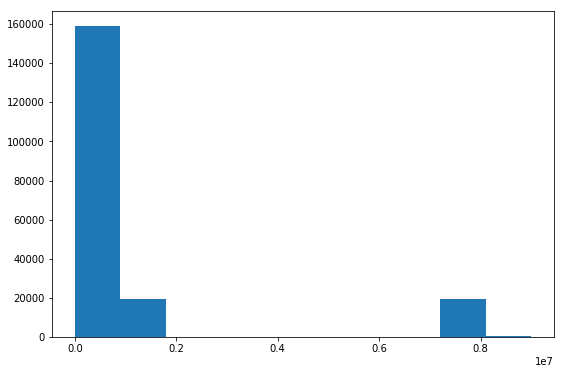

In [560]:
# for d in data_x:
#     plt.hist(d)
plt.hist(data_x[0])
plt.show()

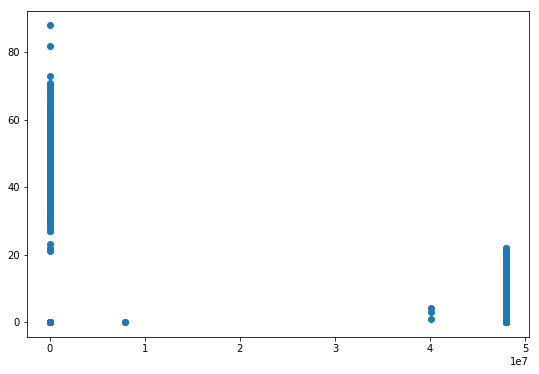

In [582]:
plt.plot(np.transpose(np.vstack([data_x,data]))[-1][0],np.transpose(np.vstack([data_x,data]))[-1][1],'o')
plt.show()

In [655]:
# [ee for ee in data rr in data_x if ee<3e7 ]
final = []
data_processed = []
data_processed_x = []

for elem in np.transpose(np.vstack([data_x,data])):
    temp_processing_array=[]
    for k in range(len(elem[0])):        
        if elem[0][k]>0.4e7:
#             temp_processing_array.append([elem[0][k],elem[1][k]])
            temp_processing_array.append(elem[1][k])
    data_processed.append(temp_processing_array)


In [698]:
final = []
for d in data_processed:
    print(len(d))
#     print(len([ee for ee in d if ee!=0]))
    print('=======')
    final.append(np.average(d)*5)
final

19602
19885
19427
19782
19787
19896
19590
19551
19822
19827
19817
19704


[0.3466483011937557, 3.0678903696253457, 5.523498224121068, 7.347588717015468, 8.886895436397635, 10.382488942501006, 11.520418580908627, 12.378650708403661, 12.783271112904853, 13.205981742068895, 12.479689155775343, 12.55582622817702]

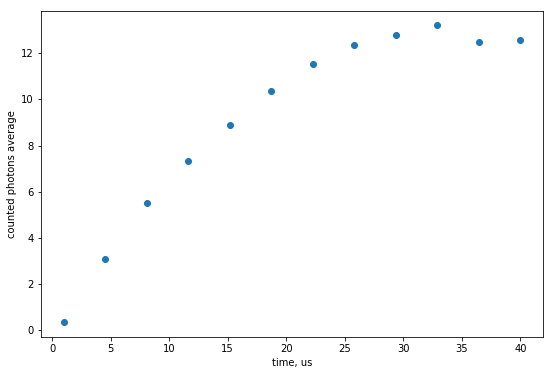

In [701]:
plt.plot(times*1e6, np.array(final),'o')
plt.xlabel('time, us')
plt.ylabel('counted photons average')
plt.savefig('for telegram to send.png')
plt.show()

In [702]:
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

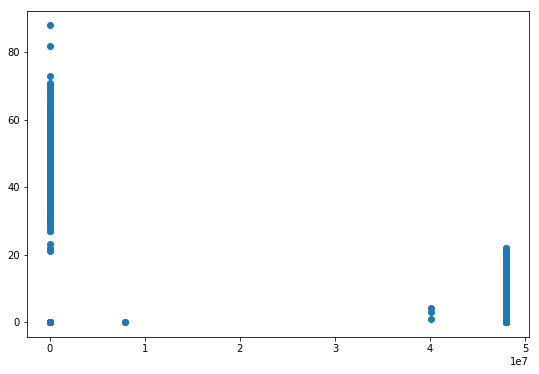

In [647]:
plt.plot(elem[0],elem[1],'o')
plt.show()

In [497]:
mw_pleEx()

In [550]:
bot.sendMessage(chat_id=chat_id, text='I have finished')
# bot.sendMessage(chat_id=chat_id, text='n = 12 , m = 100')
bot.sendMessage(chat_id=chat_id, text=str(end-begin))



In [705]:
# [ee for ee in data rr in data_x if ee<3e7 ]
final = []
data_processed = []
data_processed_x = []

for elem in np.transpose(np.vstack([data_x,data])):
    temp_processing_array=[]
    for k in range(len(elem[0])):        
        if elem[0][k]>0.4e7:
#             temp_processing_array.append([elem[0][k],elem[1][k]])
            temp_processing_array.append(elem[1][k])
    data_processed.append(temp_processing_array)


In [708]:

data_file = open('nice SSR raw data.txt', 'w')
data_file.write(str(times))
data_file.write('\n')

for elem in np.transpose(np.vstack([data_x,data])):
    temp_processing_array=[]
    for k in range(len(elem[0])):        
        if elem[0][k]>0.4e7:
            data_file.write(str(elem[0][k]) + '\t'+str(elem[1][k])+'\n')    
    data_file.write('\n')
    data_file.write('\n')

data_file.close()

In [559]:
data_processed=[]
for time_ in data:
#     print('new time')
#     print(len(time_))
    each_time_array = []
    for meas_pack in time_:
        
#         print(len(meas_pack[0]))
#         print(np.sum(meas_pack[0][0:100][::2])/100)
#         print(np.average(meas_pack[0][::2]))


#         tr = [ee for ee in meas_pack[0][0:200][::2] if ee!=0]
#         if len(tr)>0:
#             each_time_array.append(np.average(tr))
    
#         print(meas_pack[0][0:200][::2][55])
        each_time_array.append((np.sum(meas_pack[0][::2]))/100)
#     print(np.sum(each_time_array))

    data_processed.append(np.sum(each_time_array))

np.array(data_processed)

array([ 8.16,  0.5 , 10.86,  9.15,  9.65, 10.51, 11.  ,  8.22, 10.02,
        7.67, 13.2 , 14.27])

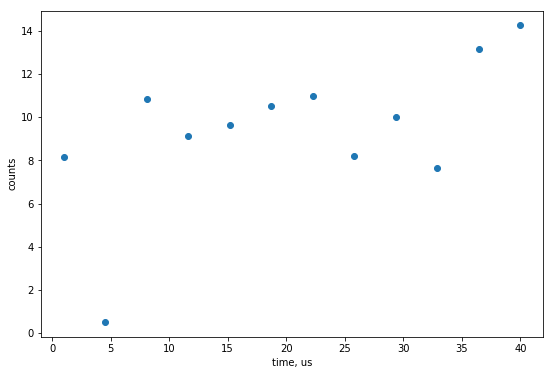

In [560]:
plt.plot(times[0:len(data_processed)]*1e6,np.array(data_processed),'o')
plt.xlabel('time, us')
plt.ylabel('counts')
plt.savefig('for telegram to send.png')
plt.show()

In [518]:
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [192]:
len(times)

12

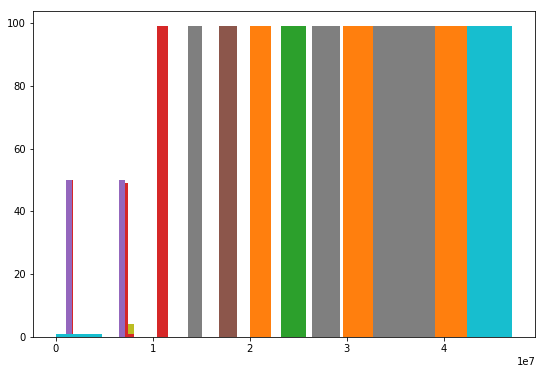

In [174]:
data_processed_x=[]
for time_x in data_x:
    each_time_array_x = []
    for meas_pack_x in time_x:
        plt.hist((meas_pack_x[0][0:100]))
#         print('------')
#         print(min(meas_pack_x[0]))
#         print(max(meas_pack_x[0]))
#         each_time_array_x.append(np.sum(meas_pack_x[0][::2]))
#     data_processed_x.append(np.sum(each_time_array_x))
plt.show()
# np.array(data_processed)/100

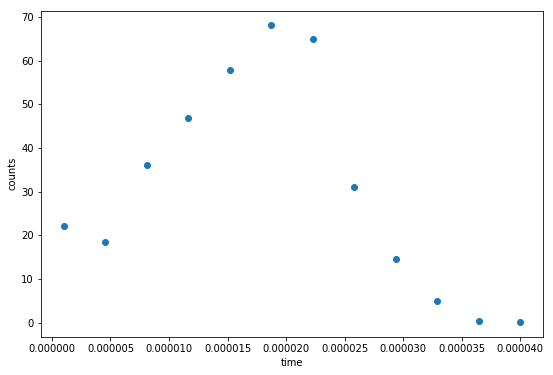

In [161]:
plt.plot(times,np.array(data_processed)/100,'o')
plt.xlabel('time')
plt.ylabel('counts')
plt.savefig('for telegram to send.png')

plt.show()

In [162]:
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [561]:

data_file = open('SSR second try.txt', 'w')
for index in range(len(data_processed)):
    s = str(times[index]) +'\t'+ str(data_processed[index]/100) +'\n'
    data_file.write(s)

data_file.close()

In [98]:

voltagesA1 =     np.array( [[1]*60 + [0]*10 + [0] * t + [0]]*100 ).flatten()
voltagesEx =     np.array( [[0]*60 + [0]*10 + [1] * t + [0]]*100 ).flatten()
voltagesMW =     np.array( [[0]*60 + [0]*10 + [0] * t + [0]]*100 ).flatten()
voltagesGreen =  np.array( [[0]*60 + [0]*10 + [0] * t + [0]]*100 ).flatten()
voltagesDetect = np.array( [[0]*60 + [0]*10 + [1] * t + [0]]*100 ).flatten()

voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)

In [23]:
    
# voltagesA1 =        np.array( [[1]*60 + [0]*10 + [0]*t + [0]*10 + [0]*1 +[0]]*10).flatten()
# voltagesEx =        np.array( [[0]*60 + [0]*10 + [1]*t + [0]*10 + [0]*1+ [0]]*10).flatten()
# voltagesMW =        np.array( [[0]*60 + [0]*10 + [0]*t + [0]*10 + [0]*1+ [0]]*10).flatten()
# voltagesGreen =     np.array( [[0]*60 + [0]*10 + [0]*t + [0]*10 + [0]*1+ [0]]*10).flatten()
# voltagesDetect =    np.array( [[0]*60 + [0]*10 + [1]*t + [0]*10 + [0]*1+ [0]]*10).flatten()
# #     voltagesDetectStop = [[0]*60 + [0]*10 + [0]*t + [0]*10 + [0]*1+ [0]]*10
# voltages = np.array(
#      np.vstack([
#          voltagesDetect,
#          voltagesMW,
#          voltagesGreen,
#          voltagesEx,             
#          voltagesA1
# #              voltagesDetectStop
#      ]), dtype=np.uint8)

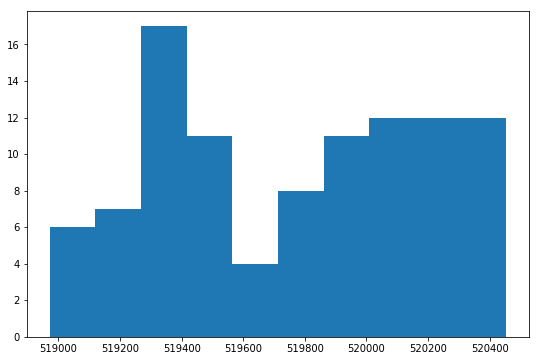

In [42]:
plt.hist([ee for ee in temp_data[0] if ee!=0][::2])
# plt.hist(temp_data[0])
plt.show()

In [789]:
# countBM.getBinWidths()

array([126702,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,      0,
      

In [753]:
bot.sendMessage(chat_id=chat_id, text='I have finished')


In [780]:
countBM.getData()[0]

3162151

In [781]:
offFunc()

In [754]:
len(data[0])

30

In [755]:
data_processing = []
for every_time in data:
    every_time_array=[] 

    for meas_pack in every_time:
        meas_pack_array = []
        for every_meas in meas_pack:
            tempcounts = [ee for ee in every_meas if ee!=0and ee<50]
#             if len(tempcounts) >=999:
#                 print('you,probably, had buffer overflow')
            meas_pack_array.append(np.sum(tempcounts)/100)
            
        every_time_array.append(np.average(meas_pack_array))
        
    data_processing.append(np.average(every_time_array))
data_processing

[3.0466666666666664, 3.0330000000000004, 4.004666666666667, 3.3779999999999997, 5.249666666666666, 5.706206896551723, 3.5456666666666665, 6.02642857142857, 4.78, 5.351999999999999]

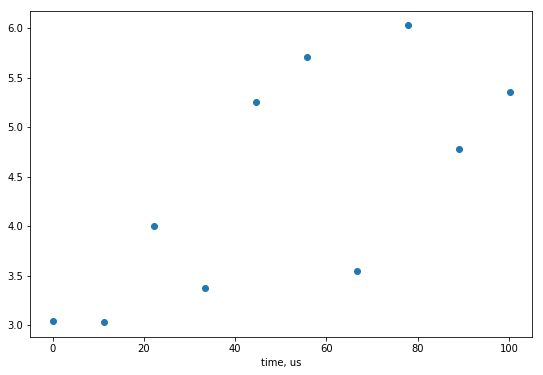

In [756]:
plt.plot(times*1e6,data_processing,'o')
plt.xlabel('time, us')
# plt.ylabel('javid processing average counts')
# plt.savefig('for telegram to send.png')
plt.show()

# Photon number during the 50 µs Ex pulse

In [84]:
_v_min_A1

-0.6934778674308122

#### Green

In [232]:
begin=time.time()
laserscannerlogic.set_scan_lines(1e6)

start = 1e-6
stop = 40e-6
n = 12 # amount of points
step = (stop-start) / n
m = 60# how much times should code repeat sequence (each sequence is 100 measurements)

data = []
data_x = []
threshhold = 100
rr =[]


offFunc()
times = np.linspace(start,stop,n)
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    end_channel=5,
    n_values=1000) 

# _v_min_A1 = -0.65
# _v_max_A1 = -0.623
# speed_A1 = 0.05


# _v_min = 1.67
# _v_max = 1.78
# speed = 0.1


try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
        print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')

greenFunc()
time.sleep(0.1)
offFunc()

clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

# for t_index in range(len(times)):
temp_data=[]
temp_data_x=[]

main_temp_data=[]
main_temp_data_x=[]
period = 10e-8   
#     t = int(times[t_index]/period)    

t=500
voltagesA1 =     np.array( [[0]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
voltagesEx =     np.array( [[0]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
voltagesMW =     np.array( [[0]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
voltagesGreen =  np.array( [[0]*60 + [0]*10 + [1] * t + [0]*10]*100 ).flatten()
voltagesDetect = np.array( [[0]*60 + [0]*10 + [1] * t + [0]*10]*100 ).flatten()

voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)


for i in range(m):      

#             PLE    
#     start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
#     mw_pleA1()
#     counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
#     if isinstance(counts_A1,int):
#         if counts_A1 == -1:
#             print('counts_A1 are None')
#             break;
#         if counts_A1 ==0:
#             print('cant find PLE line _A1')
#             break;

#     offFunc()
#     resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
#     laserscannerlogic._goto_during_scan(resonance_A1)   
#     _v_min_A1 = resonanceA1 -0.015
#     _v_max_A1 = resonanceA1 +0.015
#     kill_scanner()    

#     start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
#     mw_pleEx()
#     counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

#     if isinstance(counts_Ex,int):  
#         if counts_Ex == -1:
#             print('counts_Ex are None')
#             break;
#         if counts_Ex ==0:
#             print('cant find PLE line _Ex')
#             break;
#     offFunc()
#     resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
#     laserscannerlogic._goto_during_scan(resonance_Ex)            
#     kill_scanner()      
#     _v_min_Ex = resonanceEx -0.06
#     _v_max_Ex = resonanceEx + 0.06
    
    countBM.clear()

# =============Experiment============================
    do_sequence(voltages)
# =============State check===========================
    fastcounter._tagger.sync()   
    temp_data=countBM.getData()
    temp_data_x=countBM.getBinWidths()

#     countBM.clear()
# #         fastcounter._tagger.sync()  

#     task.StartTask()
#     task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
#     time.sleep(10e-3)  
#     task.StopTask()
#     offFunc()
#     fastcounter._tagger.sync()   

#     ratio = np.sum(countBM.getData())
#     rr.append(ratio)
#     if ratio>threshhold:
    if True:
        main_temp_data= np.hstack([main_temp_data, temp_data])   
        main_temp_data_x= np.hstack([main_temp_data_x,temp_data_x])   
    else:            
        pass
#         start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
#         mw_pleA1()
#         counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

#         if isinstance(counts_A1,int):                                                    
#             if counts_A1 == -1:
#                 print('counts_A1 are None')
#                 break;
#             if counts_A1 ==0:
#                 print('cant find PLE line _A1')
#                 break;          

#         resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
#         laserscannerlogic._goto_during_scan(resonance_A1)

#         kill_scanner()
#         start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
#         mw_pleEx()
#         counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)   

#         if isinstance(counts_Ex,int):  
#             if counts_Ex == -1:
#                 print('counts_Ex are None')
#                 break;
#             if counts_Ex ==0:
#                 print('cant find PLE line _Ex')
#                 break;                

#         resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
#         laserscannerlogic._goto_during_scan(resonance_Ex)  
#         kill_scanner()

    temp_data = []        
    temp_data_x = []   

data.append(main_temp_data)
data_x.append(main_temp_data_x)
end=time.time()

print('n = 12 , m = 100')
print(end-begin)

error
n = 12 , m = 100
12.098725318908691


In [233]:
main_temp_data_x[0:100]

array([50068928.,  7934411., 50069656.,  7934377., 50069315.,  7934193.,
       50070130.,  7933831., 50069702.,  7934068., 50068761.,  7934599.,
       50069330.,  7934592., 50069055.,  7934270., 50068851.,  7935361.,
       50069148.,  7934226., 50069274.,  7934826., 50068679.,  7934899.,
       50069140.,  7934738., 50068842.,  7934375., 50069806.,  7934411.,
       50068861.,  7935084., 50068528.,  7934740., 50069483.,  7934200.,
       50069039.,  7934916., 50068874.,  7934394., 50069448.,  7934554.,
       50069378.,  7934351., 50069525.,  7934467., 50069091.,  7934486.,
       50069342.,  7934429., 50068511.,  7934777., 50069420.,  7934945.,
       50068557.,  7934950., 50068315.,  7935145., 50068953.,  7934839.,
       50069114.,  7934594., 50069607.,  7934381., 50068667.,  7934589.,
       50069414.,  7934744., 50068825.,  7934743., 50069051.,  7934376.,
       50069180.,  7934886., 50069291.,  7934416., 50068834.,  7934679.,
       50069091.,  7934276., 50069474.,  7934533., 

In [234]:
len(data[0])

60000

In [235]:
# [ee for ee in data rr in data_x if ee<3e7 ]
final = []
for elem in np.transpose(np.vstack([data_x,data])):
    if elem[0]>3.4e7:
        final.append(elem)
        
# plt.hist(data_x[0])
# plt.show()

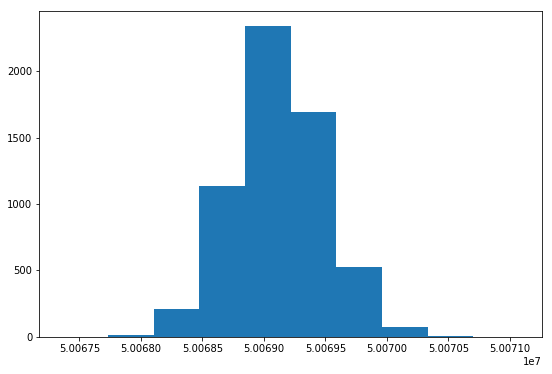

In [236]:
plt.hist(np.transpose(final)[0])
plt.show()

In [240]:
np.histogram(np.transpose(final)[1],bins = 28)[1]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28.])

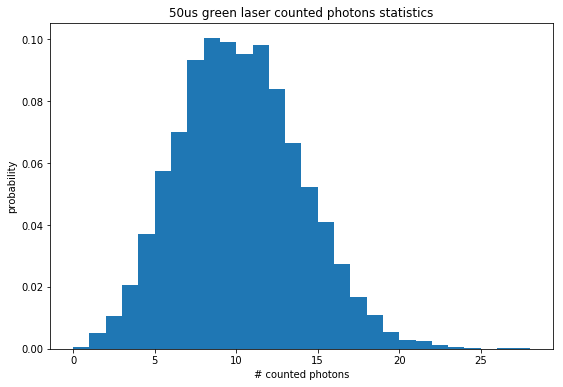

In [241]:

plt.hist(np.transpose(final)[1],normed = True,bins=28)
plt.xlabel('# counted photons')
plt.ylabel('probability')
plt.title('50us green laser counted photons statistics')
# plt.savefig('for telegram to send.png')
plt.show()

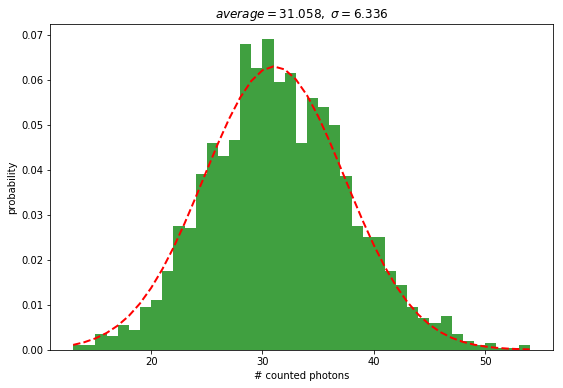

In [403]:
import matplotlib.mlab as mlab
from scipy.stats import norm

(mu, sigma) = norm.fit(np.transpose(final)[1])

_ , bins, patches = plt.hist(np.transpose(final)[1], 41, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.title(r'$average=%.3f ,\ \sigma=%.3f $' %(mu, sigma))
plt.xlabel('# counted photons')
plt.ylabel('probability')
plt.savefig('for telegram to send.png')
plt.show()

In [348]:
final[0:10]

[array([5.0057708e+07, 2.5000000e+01]), array([5.0070776e+07, 1.8000000e+01]), array([5.0070234e+07, 1.0000000e+01]), array([5.0068811e+07, 2.1000000e+01]), array([5.0068225e+07, 1.8000000e+01]), array([5.0056741e+07, 1.9000000e+01]), array([5.00695e+07, 2.40000e+01]), array([5.006905e+07, 1.900000e+01]), array([5.0058652e+07, 2.1000000e+01]), array([5.0057585e+07, 1.6000000e+01])]

In [401]:
np.histogram(np.transpose(final)[1],bins=41)[1]#/sum(np.histogram(np.transpose(final)[1],bins=13)[0]),2)

array([13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54.])

In [404]:
data_file = open('Photon number during the 50 us GREEN without BeamSplitter.txt', 'w')
s = 'binwidth' +'\t'+'photons'+'\n'
data_file.write(s)

for index in range(len(final)):
    s = str(final[index][0]) +'\t'+ str(final[index][1]) +'\n'
    data_file.write(s)

data_file.close()

In [405]:
# bot.sendMessage(chat_id=chat_id, text='I have finished')
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

#### Ex

In [230]:
begin=time.time()
laserscannerlogic.set_scan_lines(1e6)

start = 1e-6
stop = 40e-6
n = 12 # amount of points
step = (stop-start) / n
m = 200# how much times should code repeat sequence (each sequence is 100 measurements)

data = []
data_x = []
threshhold = 500
rr =[]


offFunc()
times = np.linspace(start,stop,n)
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    end_channel=5,
    n_values=1000) 

# _v_min_A1 = -0.65
# _v_max_A1 = -0.623
# speed_A1 = 0.05


# _v_min = 1.67
# _v_max = 1.78
# speed = 0.1


try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
        print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')

greenFunc()
time.sleep(0.1)
offFunc()

clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

# for t_index in range(len(times)):
temp_data=[]
temp_data_x=[]

main_temp_data=[]
main_temp_data_x=[]
period = 10e-8   
#     t = int(times[t_index]/period)    




# t=500
# voltagesA1 =     np.array( [[0]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
# voltagesEx =     np.array( [[0]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
# voltagesMW =     np.array( [[0]*60 + [0]*10 + [0] * t + [0]*10]*100 ).flatten()
# voltagesGreen =  np.array( [[0]*60 + [0]*10 + [1] * t + [0]*10]*100 ).flatten()
# voltagesDetect = np.array( [[0]*60 + [0]*10 + [1] * t + [0]*10]*100 ).flatten()

# voltages = np.array(
#      np.vstack([
#          voltagesDetect,
#          voltagesMW,
#          voltagesGreen,
#          voltagesEx,             
#          voltagesA1
#      ]), dtype=np.uint8)




t=500
voltagesA1 =     np.array( [[1]*60 + [0]*10 + [0] * t +[0]+[0]+ [0]*60]*100 ).flatten()
voltagesEx =     np.array( [[0]*60 + [0]*10 + [1] * t +[0]+[0]+ [0]*60]*100 ).flatten()
voltagesMW =     np.array( [[0]*60 + [0]*10 + [0] * t +[0]+[0]+ [0]*60]*100 ).flatten()
voltagesGreen =  np.array( [[0]*60 + [0]*10 + [0] * t +[0]+[0]+ [0]*60]*100 ).flatten()
voltagesDetect = np.array( [[0]*60 + [0]*10 + [1] * t +[0]+[1]+ [0]*60]*100 ).flatten()


voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)


start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
mw_pleA1()
counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
if isinstance(counts_A1,int):
    if counts_A1 == -1:
        print('counts_A1 are None')
    if counts_A1 ==0:
        print('cant find PLE line _A1')

offFunc()
resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
laserscannerlogic._goto_during_scan(resonance_A1)   
_v_min_A1 = resonanceA1 -0.015
_v_max_A1 = resonanceA1 +0.015
kill_scanner()    

start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
mw_pleEx()
counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

if isinstance(counts_Ex,int):  
    if counts_Ex == -1:
        print('counts_Ex are None')
    if counts_Ex ==0:
        print('cant find PLE line _Ex')
offFunc()
resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
laserscannerlogic._goto_during_scan(resonance_Ex)            
kill_scanner()      
_v_min_Ex = resonanceEx -0.06
_v_max_Ex = resonanceEx + 0.06



for i in range(m):      

#             PLE    
   
    countBM.clear()

# =============Experiment============================
    do_sequence(voltages)
# =============State check===========================
    fastcounter._tagger.sync()   
    temp_data=countBM.getData()
    temp_data_x=countBM.getBinWidths()

    countBM.clear()
#         fastcounter._tagger.sync()  

    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
    time.sleep(10e-3)  
    task.StopTask()
    offFunc()
    fastcounter._tagger.sync()   

    ratio = np.sum(countBM.getData())
    rr.append(ratio)
    
    if ratio>threshhold:
        main_temp_data= np.hstack([main_temp_data, temp_data])   
        main_temp_data_x= np.hstack([main_temp_data_x,temp_data_x])   
    else:            
        pass
        start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
        mw_pleA1()
        counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

        if isinstance(counts_A1,int):                                                    
            if counts_A1 == -1:
                print('counts_A1 are None')
                break;
            if counts_A1 ==0:
                print('cant find PLE line _A1')
                break;          

        resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
        laserscannerlogic._goto_during_scan(resonance_A1)

        kill_scanner()
        start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
        mw_pleEx()
        counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)   

        if isinstance(counts_Ex,int):  
            if counts_Ex == -1:
                print('counts_Ex are None')
                break;
            if counts_Ex ==0:
                print('cant find PLE line _Ex')
                break;                

        resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
        laserscannerlogic._goto_during_scan(resonance_Ex)  
        kill_scanner()

    temp_data = []        
    temp_data_x = []   

data.append(main_temp_data)
data_x.append(main_temp_data_x)
end=time.time()

print(end-begin)

ddd
166.2589020729065


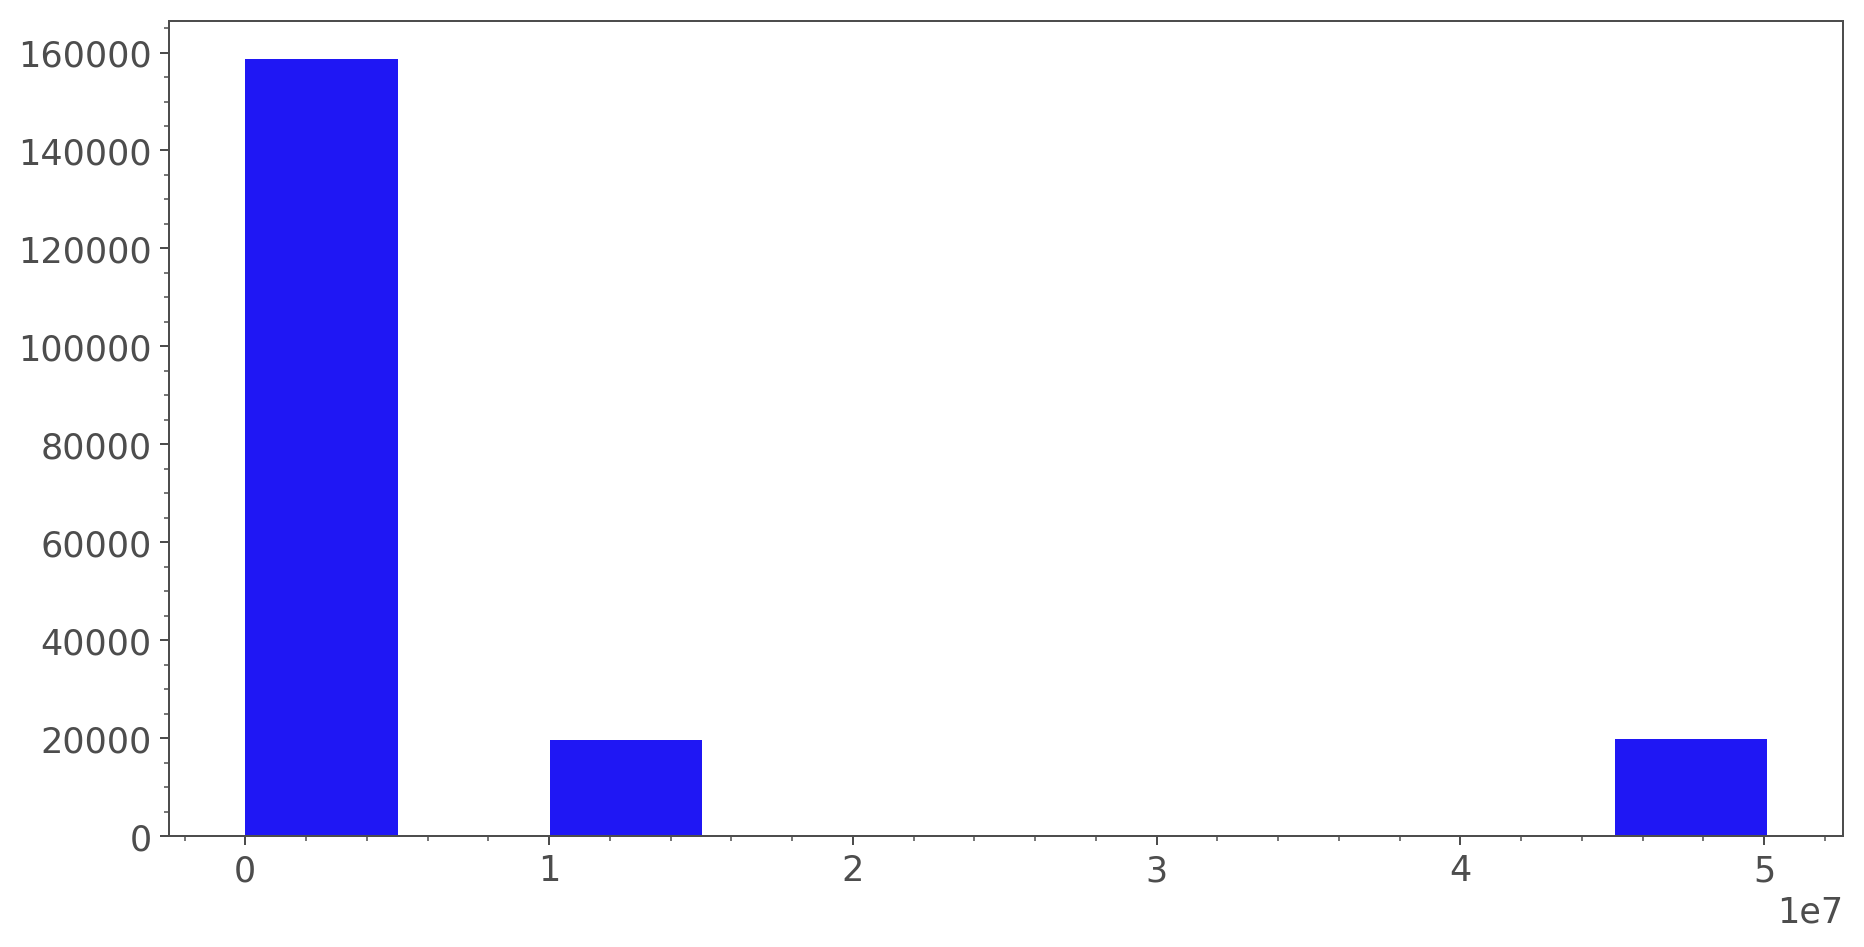

In [231]:
plt.hist(data_x)
plt.show()

In [232]:
rr

[2712, 2882, 4466, 3246, 2058, 67, 3548, 2856, 2441, 2565, 2149, 3167, 2790, 3136, 3257, 2738, 2502, 2509, 5171, 2039, 2084, 3209, 2472, 2253, 2641, 2835, 3493, 3039, 3253, 2304, 2446, 1761, 2095, 3250, 1782, 1850, 1268, 2569, 2793, 2110, 2594, 2273, 3116, 2760, 3129, 4966, 1078, 1587, 2402, 1495, 1984, 1936, 1907, 2180, 1228, 1177, 1112, 1933, 1737, 2232, 2111, 2685, 2739, 1857, 1889, 3808, 1657, 2134, 1812, 2475, 1523, 1164, 1766, 1441, 2234, 1573, 2385, 1859, 5060, 1519, 2611, 2131, 3915, 3113, 3080, 2617, 3319, 2507, 4728, 2286, 2175, 2625, 2471, 2064, 2650, 2339, 2444, 2405, 2979, 2648, 2468, 2190, 2193, 3163, 1876, 2787, 1938, 1891, 2612, 2482, 3199, 2357, 2486, 2422, 3345, 3168, 2264, 2397, 2688, 2435, 1868, 2637, 1853, 1210, 2442, 1495, 2450, 1645, 2006, 2308, 2874, 2742, 2335, 2589, 2195, 2023, 1754, 2239, 2909, 1740, 1517, 1124, 1989, 1536, 1782, 1345, 3508, 2007, 1815, 2670, 2634, 3007, 2246, 2260, 944, 84, 1576, 1985, 1577, 2454, 1591, 1760, 1378, 1965, 1963, 2454, 1296, 18

In [233]:
# [ee for ee in data rr in data_x if ee<3e7 ]
final = []
for elem in np.transpose(np.vstack([data_x,data])):
#     ee>1e7 and ee<1.9e7
#     if elem[0]>1e7 and elem[0]<1.9e7:
    if elem[0]>4.9e7:
        final.append(elem)
        
# plt.hist(data_x[0])
# plt.show()

50.10221556126263


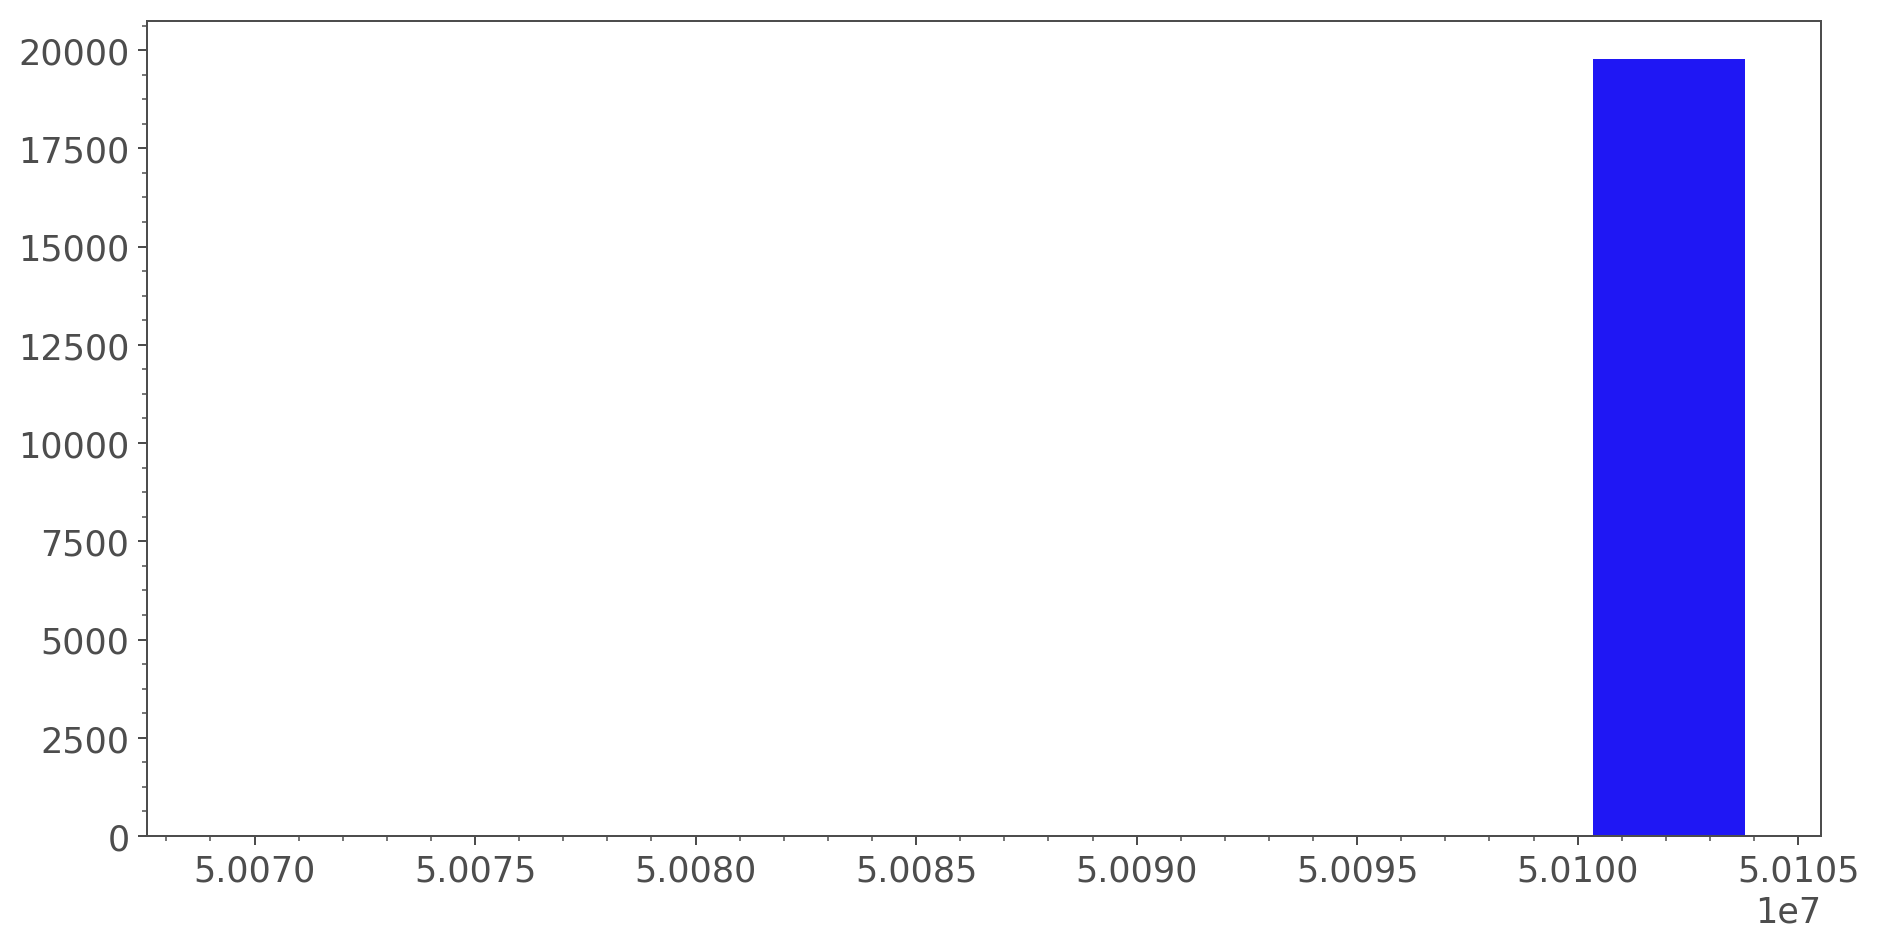

In [234]:
print(np.average(np.transpose(final)[0])/1e6)
plt.hist(np.transpose(final)[0])

plt.show()

In [235]:
len([ee for ee in np.transpose(final)[1] if ee==1])#/len(np.transpose(final)[1])

1454

In [239]:
np.histogram(np.transpose(final)[1], bins =58)[1]

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54., 55., 56., 57., 58.])

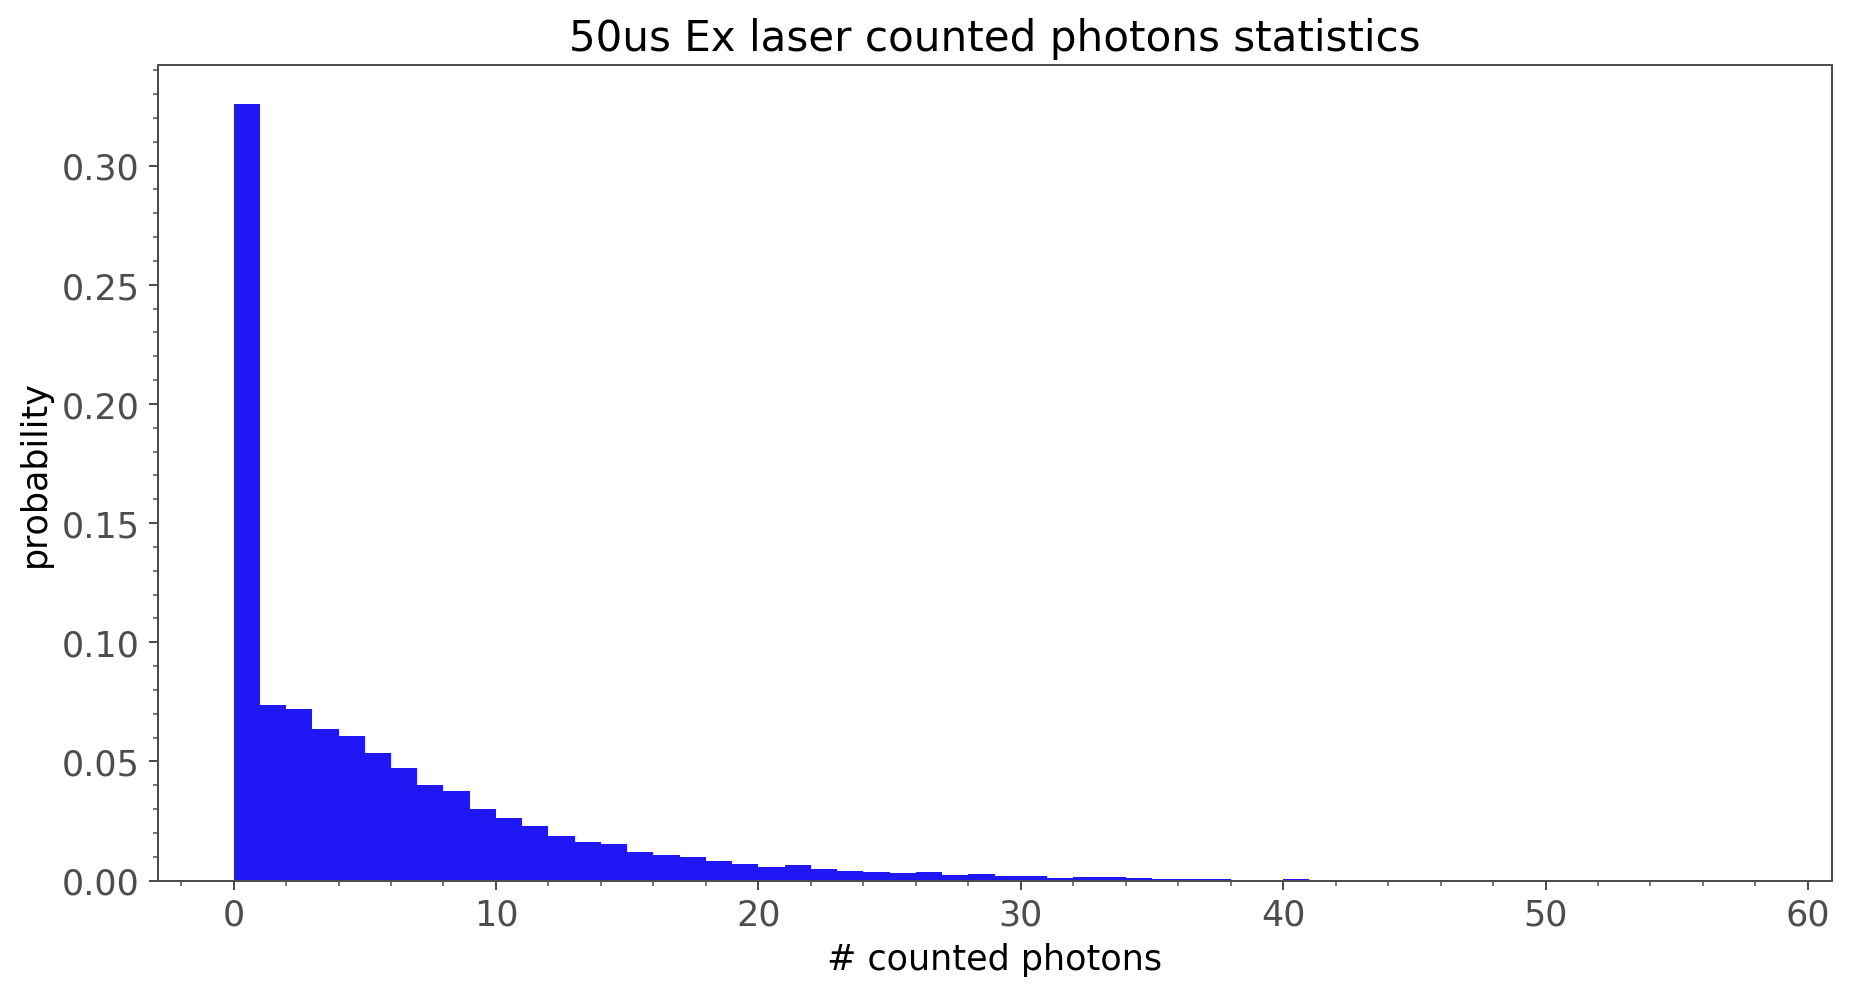

In [240]:

plt.hist(np.transpose(final)[1],normed = True,bins =58)
plt.xlabel('# counted photons')
plt.ylabel('probability')
plt.title('50us Ex laser counted photons statistics')
# plt.savefig('for telegram to send.png')
plt.show()

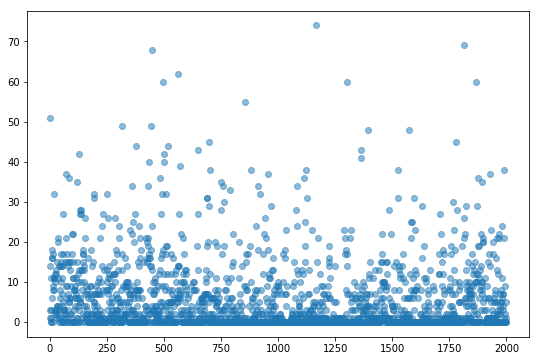

In [301]:
# plt.plot([ee for ee in np.transpose(final)[1] if ee<30 ],'o',color = 'red')
plt.plot(np.transpose(final)[1],'o',alpha = 0.5)
plt.show()

In [241]:
greenFunc()

In [1427]:
np.average(np.transpose(final)[1])

10.414

In [1118]:
bot.sendMessage(chat_id=chat_id, text='I have finished')
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

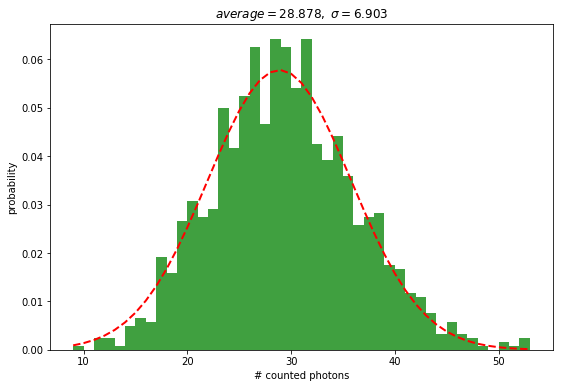

In [1474]:
import matplotlib.mlab as mlab
from scipy.stats import norm

(mu, sigma) = norm.fit(np.transpose(final)[1])

_ , bins, patches = plt.hist(np.transpose(final)[1], 44, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)
plt.title(r'$average=%.3f ,\ \sigma=%.3f $' %(mu, sigma))
plt.xlabel('# counted photons')
plt.ylabel('probability')
# plt.savefig('for telegram to send.png')
plt.show()

In [538]:
data_file = open('50us Ex laser counted photons statistics without BeamSplitter.txt', 'w')
s = 'binwidth' +'\t'+'photons'+'\n'
data_file.write(s)

for index in range(len(final)):
    s = str(final[index][0]) +'\t'+ str(final[index][1]) +'\n'
    data_file.write(s)

data_file.close()

# Delay tests

0

0

0

In [108]:
# voltages

#### Read AOM2 (A1)

In [32]:
from TimeTagger import Correlation

In [ ]:
mw_pleA1()


In [458]:
kill_scanner()

In [459]:
_v_min = -0.78
_v_max = -0.72
speed = 0.02


start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)

In [460]:
greenFunc()
time.sleep(0.1)
mw_pleA1()
c = PLE_A1(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)
# if c==-1 or c==0:
#     print (c)

85.0


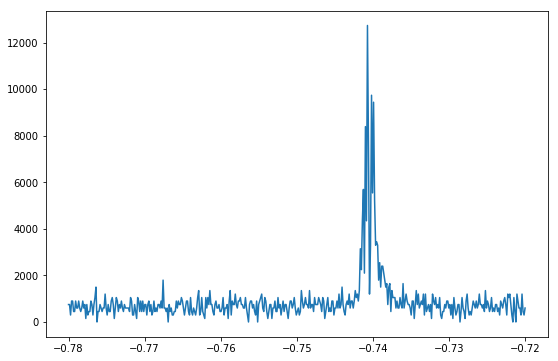

In [461]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min,_v_max,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()


In [462]:
offFunc()
resonance = np.linspace(_v_min,_v_max,len(c))[np.argmax(c)]
laserscannerlogic._goto_speed = 0.01
laserscannerlogic._goto_during_scan(resonance)
# _v_min = resonance -0.01
# _v_max = resonance + 0.01
# print('_v_min ',_v_min)
# print('_v_max ',_v_max)

0

In [463]:
mw_pleA1()


In [464]:
offFunc()


In [368]:
greenFunc()


In [193]:
corr.clear()


In [194]:
offFunc()

In [195]:
try:
    daq.DAQmxStopTask(main)    
    daq.DAQmxClearTask(main)
except:
    pass


try:
    daq.DAQmxStopTask(clock)
    daq.DAQmxClearTask(clock)

except:
    pass


In [196]:
import PyDAQmx as daq
import numpy as np
import time
from ctypes import *
import matplotlib.pyplot as plt


def setup_waveform():
    try:
        daq.DAQmxStopTask(main)    
        daq.DAQmxClearTask(main)
    except:
        pass


    try:
        daq.DAQmxStopTask(clock)
        daq.DAQmxClearTask(clock)

    except:
        pass


    #=========Create clock channel on Dev4/Ctr4
    clock = daq.TaskHandle()
    # Clock = daq.Task()
    duty_cycle = 0.5
    # period = 10e-8
    period = 5e-3

    clock_channel = '/Dev4/Ctr4'

    daq.DAQmxCreateTask('myClockTask', daq.byref(clock))
    # Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
    daq.DAQmxCreateCOPulseChanFreq(
        clock,
        clock_channel,  #  The name of the counter to use to create virtual channels
        "myClockChannel", # The name to assign to the created virtual channel
        daq.DAQmx_Val_Hz, # The units in which to specify freq.
        daq.DAQmx_Val_Low, # The resting state of the output terminal.
        0.0, # The amount of time in seconds to wait before generating the first pulse.
        1/float(period), # The frequency at which to generate pulses.
        duty_cycle, # The width of the pulse divided by the pulse period.
       )
    #=========Create clock channel on Dev4/Ctr4


    main = daq.TaskHandle()


    daq.DAQmxCreateTask('MainTask', daq.byref(main))

    # ch4 = '/Dev4/port0/line4'
    # ch3 = '/Dev4/port0/line3'
    # ch0 = '/Dev4/port0/line0'


    ch0 = '/Dev4/port0/line0'
    ch1 = '/Dev4/port0/line1'
    ch2 = '/Dev4/port0/line2'
    ch3 = '/Dev4/port0/line3'
    ch4 = '/Dev4/port0/line4'


    # daq.DAQmxCreateDOChan(
    #     main, 
    #     ch4, 
    #     '',
    #     daq.DAQmx_Val_ChanPerLine)

    # daq.DAQmxCreateDOChan(
    #     main, 
    #     ch3, 
    #     '',
    #     daq.DAQmx_Val_ChanPerLine)


    # daq.DAQmxCreateDOChan(
    #     main, 
    #     ch0, 
    #     '',
    #     daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch0, 
        'marker',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch1, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch2, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch3, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch4, 
        '',
        daq.DAQmx_Val_ChanPerLine)



    n = 200
    # voltages = np.array([[1,0,1,0] + [1,1,0,0]]*n, dtype=np.uint8)

    # voltages = np.array(
    #     np.vstack([[1,0,1,0]*n , [1,1,0,0]*n]), dtype=np.uint8)
    voltagesA1 = [1,0]*int(n/2)
    voltagesEx = [0]*n
    voltagesMW = [0]*n
    voltagesGreen = [0]*n
    voltagesDetect = [1,0]*int(n/2)

#     voltagesA1 = [1,0]*int(n/2)
#     voltagesEx = [1,0]*int(n/2)
#     voltagesMW = [1,0]*int(n/2)
#     voltagesGreen = [1,0]*int(n/2)
#     voltagesDetect = [1,0]*int(n/2)


#     voltages = np.array(
#          np.vstack([
#              voltagesA1,
#              voltagesEx,
#              voltagesMW,
#              voltagesGreen,
#              voltagesDetect

#          ]), dtype=np.uint8)

    voltages = np.array(
         np.vstack([
             voltagesDetect,
             voltagesMW,
             voltagesGreen,
             voltagesEx,             
             voltagesA1
         ]), dtype=np.uint8)    
    
    
    
    daq.DAQmxCfgSampClkTiming(
        # add to this task
        main,
        # use this channel as clock
        'Ctr4InternalOutput',
        # Maximum expected clock frequency
    #     1250,
        1/float(period),
        # Generate sample on falling edge
        daq.DAQmx_Val_Rising,
        # generate finite number of samples
        daq.DAQmx_Val_FiniteSamps,
        # number of samples to generate
        len(voltages[0]))


    # Sets only the number of samples to acquire or generate without specifying timing. 
    daq.DAQmxCfgImplicitTiming(
        clock,
        daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
        1000 # the buffer size
    )

    # daq.DAQmxStartTask(clock)
    daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)

    _AONwrittenMaster = daq.int32()

    daq.DAQmxWriteDigitalLines(
    # daq.DAQmxWriteDigitalU32(
                # write to this task
                main,
                # length of the command (points)
                len(voltages[0]),
                # start task immediately (True), or wait for software start (False)
                False,
                # maximal timeout in seconds for# the write process
                20,
                # Specify how the samples are arranged: each pixel is grouped by channel number

                daq.DAQmx_Val_GroupByChannel,
    #             daq.DAQmx_Val_GroupByScanNumber,
                # the voltages to be written
                voltages,
                # The actual number of samples per channel successfully written to the buffer
                daq.byref(_AONwrittenMaster),
                # Reserved for future use. Pass NULL(here None) to this parameter
                None)


    # daq.DAQmxStartTask(main)

    # print('ddd')


In [36]:
try:
    daq.DAQmxStopTask(main)    
    daq.DAQmxClearTask(main)
except:
    pass


try:
    daq.DAQmxStopTask(clock)
    daq.DAQmxClearTask(clock)

except:
    pass


In [133]:
setup_waveform()


In [134]:

daq.DAQmxStartTask(main)
daq.DAQmxStartTask(clock)

daq.DAQmxWaitUntilTaskDone(main, 5)


daq.DAQmxStopTask(main)
daq.DAQmxStopTask(clock)
daq.DAQmxClearTask(main)
daq.DAQmxClearTask(clock)

0

In [33]:
corr = Correlation(tagger=fastcounter._tagger,
            channel_1=1, 
            channel_2=5,
            binwidth=20000, 
            n_bins=200)


In [34]:
corr.clear()

In [81]:
offFunc()


In [35]:
x=[]
y=np.zeros(200)

for j in range(3):
    corr.clear()
    greenFunc()
    time.sleep(0.1)
    mw_pleA1()
    c = PLE_A1(laser_number = 1, v_min = _v_min,v_max = _v_max,speed= speed)
    offFunc()
    
    resonance = np.linspace(_v_min,_v_max,len(c))[np.argmax(c)]
    laserscannerlogic._goto_speed = 0.03
    laserscannerlogic._goto_during_scan(resonance)

    corr.clear()
    fastcounter._tagger.sync()        


    try:
        daq.DAQmxStopTask(main)    
        daq.DAQmxClearTask(main)
    except:
        pass


    try:
        daq.DAQmxStopTask(clock)
        daq.DAQmxClearTask(clock)

    except:
        pass


    #=========Create clock channel on Dev4/Ctr4
    clock = daq.TaskHandle()
    # Clock = daq.Task()
    duty_cycle = 0.5
    # period = 10e-8
    period = 5e-3

    clock_channel = '/Dev4/Ctr4'

    daq.DAQmxCreateTask('myClockTask1', daq.byref(clock))
    # Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
    daq.DAQmxCreateCOPulseChanFreq(
        clock,
        clock_channel,  #  The name of the counter to use to create virtual channels
        "myClockChannel", # The name to assign to the created virtual channel
        daq.DAQmx_Val_Hz, # The units in which to specify freq.
        daq.DAQmx_Val_Low, # The resting state of the output terminal.
        0.0, # The amount of time in seconds to wait before generating the first pulse.
        1/float(period), # The frequency at which to generate pulses.
        duty_cycle, # The width of the pulse divided by the pulse period.
       )
    #=========Create clock channel on Dev4/Ctr4


    main = daq.TaskHandle()

    daq.DAQmxCreateTask('MainTask', daq.byref(main))


    ch0 = '/Dev4/port0/line0'
    ch1 = '/Dev4/port0/line1'
    ch2 = '/Dev4/port0/line2'
    ch3 = '/Dev4/port0/line3'
    ch4 = '/Dev4/port0/line4'


    # daq.DAQmxCreateDOChan(
    #     main, 
    #     ch4, 
    #     '',
    #     daq.DAQmx_Val_ChanPerLine)

    # daq.DAQmxCreateDOChan(
    #     main, 
    #     ch3, 
    #     '',
    #     daq.DAQmx_Val_ChanPerLine)


    # daq.DAQmxCreateDOChan(
    #     main, 
    #     ch0, 
    #     '',
    #     daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch0, 
        'marker',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch1, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch2, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch3, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    daq.DAQmxCreateDOChan(
        main, 
        ch4, 
        '',
        daq.DAQmx_Val_ChanPerLine)



    n = 200
    # voltages = np.array([[1,0,1,0] + [1,1,0,0]]*n, dtype=np.uint8)

    # voltages = np.array(
    #     np.vstack([[1,0,1,0]*n , [1,1,0,0]*n]), dtype=np.uint8)
    voltagesA1 = [1,0]*int(n/2)
    voltagesEx = [0]*n
    voltagesMW = [0]*n
    voltagesGreen = [0]*n
    voltagesDetect = [1,0]*int(n/2)

#     voltagesA1 = [1,0]*int(n/2)
#     voltagesEx = [1,0]*int(n/2)
#     voltagesMW = [1,0]*int(n/2)
#     voltagesGreen = [1,0]*int(n/2)
#     voltagesDetect = [1,0]*int(n/2)


#     voltages = np.array(
#          np.vstack([
#              voltagesA1,
#              voltagesEx,
#              voltagesMW,
#              voltagesGreen,
#              voltagesDetect

#          ]), dtype=np.uint8)

    voltages = np.array(
         np.vstack([
             voltagesDetect,
             voltagesMW,
             voltagesGreen,
             voltagesEx,             
             voltagesA1
         ]), dtype=np.uint8)    
    
    
    
    daq.DAQmxCfgSampClkTiming(
        # add to this task
        main,
        # use this channel as clock
        'Ctr4InternalOutput',
        # Maximum expected clock frequency
    #     1250,
        1/float(period),
        # Generate sample on falling edge
        daq.DAQmx_Val_Rising,
        # generate finite number of samples
        daq.DAQmx_Val_FiniteSamps,
        # number of samples to generate
        len(voltages[0]))


    # Sets only the number of samples to acquire or generate without specifying timing. 
    daq.DAQmxCfgImplicitTiming(
        clock,
        daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
        1000 # the buffer size
    )

    # daq.DAQmxStartTask(clock)
    daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)

    _AONwrittenMaster = daq.int32()

    daq.DAQmxWriteDigitalLines(
    # daq.DAQmxWriteDigitalU32(
                # write to this task
                main,
                # length of the command (points)
                len(voltages[0]),
                # start task immediately (True), or wait for software start (False)
                False,
                # maximal timeout in seconds for# the write process
                20,
                # Specify how the samples are arranged: each pixel is grouped by channel number

                daq.DAQmx_Val_GroupByChannel,
    #             daq.DAQmx_Val_GroupByScanNumber,
                # the voltages to be written
                voltages,
                # The actual number of samples per channel successfully written to the buffer
                daq.byref(_AONwrittenMaster),
                # Reserved for future use. Pass NULL(here None) to this parameter
                None)


    # daq.DAQmxStartTask(main)

    # print('ddd')
    

    daq.DAQmxStartTask(main)
    daq.DAQmxStartTask(clock)

    daq.DAQmxWaitUntilTaskDone(main, 5)
    
        
    daq.DAQmxStopTask(main)
    daq.DAQmxStopTask(clock)
    daq.DAQmxClearTask(main)
    daq.DAQmxClearTask(clock)

    fastcounter._tagger.sync()        

    x = corr.getIndex() / 1e3
    y = y+corr.getDataNormalized()
    fastcounter._tagger.sync()      




#     for i in range(20):
#         fastcounter._tagger.sync()        
#         task.StartTask()
#         task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 + markers +mw_trig ,None,None)
#         time.sleep(1e-3)
#         task.StopTask()
#         offFunc()
        
#     fastcounter._tagger.sync()        
#     x = corr.getIndex() / 1e3
#     y = y+corr.getDataNormalized()
#     fastcounter._tagger.sync()        


Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-35-04e0e6d1c306>", line 54, in <module>
    duty_cycle, # The width of the pulse divided by the pulse period.
  File "<string>", line 2, in function
  File "C:\Program Files (x86)\Anaconda\envs\qudi\lib\site-packages\PyDAQmx\DAQmxFunctions.py", line 62, in mafunction
    raise exception_class(errBuff.value.decode("utf-8"), f.__name__)
PyDAQmx.DAQmxFunctions.PhysicalChanDoesNotExistError: Physical channel specified does not exist on this device.

Refer to the documentation for channels available on this device.
Device: Dev4
Physical Channel Name: Ctr4

Task Name: myClockTask1

Status Code: -200170
 in function DAQmxCreateCOPulseChanFreq


In [207]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [50]:
setup_waveform()
daq.DAQmxStartTask(main)
daq.DAQmxStartTask(clock)


0

In [51]:
daq.DAQmxStopTask(main)
daq.DAQmxStopTask(clock)


0

In [89]:
x=[]
y=np.zeros(200)

for j in range(3):
    corr.clear()
    greenFunc()
    time.sleep(0.1)
    mw_pleA1()
    c = PLE_A1(laser_number = 1, v_min = _v_min,v_max = _v_max,speed= speed)

    offFunc()
    resonance = np.linspace(_v_min,_v_max,len(c))[np.argmax(c)]
    laserscannerlogic._goto_speed = 0.03
    laserscannerlogic._goto_during_scan(resonance)
    
#     _v_min = resonance -0.01
#     _v_max = resonance + 0.01


    for i in range(20):
        fastcounter._tagger.sync()        
        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 + markers +mw_trig ,None,None)
        time.sleep(1e-3)
        task.StopTask()
        offFunc()
        
    fastcounter._tagger.sync()        
    x = corr.getIndex() / 1e3
    y = y+corr.getDataNormalized()
    fastcounter._tagger.sync()        


In [90]:
y

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

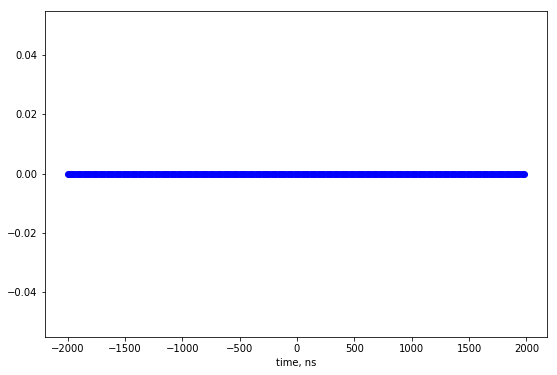

In [91]:
# 1us
plt.plot(x,y,'o',color = 'blue')
# plt.xlim(200,500)
plt.xlabel('time, ns')

plt.savefig('for telegram to send.png')

plt.show()


In [ ]:
bot.sendMessage(chat_id=chat_id, text="Delay_check redAOM2")
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

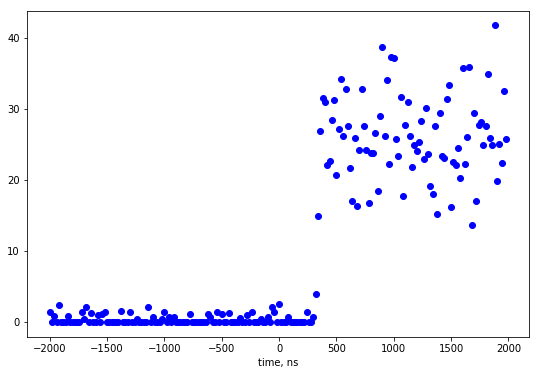

In [595]:
# 1us
plt.plot(x,y,'o',color = 'blue')
# plt.xlim(280,400)
plt.xlabel('time, ns')

plt.savefig('for telegram to send.png')

plt.show()


In [596]:
bot.sendMessage(chat_id=chat_id, text="Delay_check redAOM2")
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [44]:
corr = Correlation(tagger=fastcounter._tagger,
            channel_1=1, 
            channel_2=5,
            binwidth=20000, 
            n_bins=200)

In [ ]:
# mw_pleA1()
# c = PLE_A1(laser_number = 1, v_min = _v_min,v_max = _v_max,speed= speed)

In [58]:
x=[]
y=np.zeros(200)


_v_min = -0.78
_v_max = -0.72
speed = 0.02

for j in range(25):
    
    corr.clear()
    greenFunc()
    time.sleep(0.1)
    mw_pleA1()

    c = PLE_A1(laser_number = 1, v_min = _v_min,v_max = _v_max,speed= speed)

    offFunc()
    resonance = np.linspace(_v_min,_v_max,len(c))[np.argmax(c)]
    laserscannerlogic._goto_speed = 0.03
    laserscannerlogic._goto_during_scan(resonance)


    for i in range(2000):

        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 + markers +mw_trig ,None,None)
        time.sleep(1.23e-7)
        task.StopTask()
        offFunc()
        
        
    x = corr.getIndex() / 1e3
    y = y+corr.getDataNormalized()


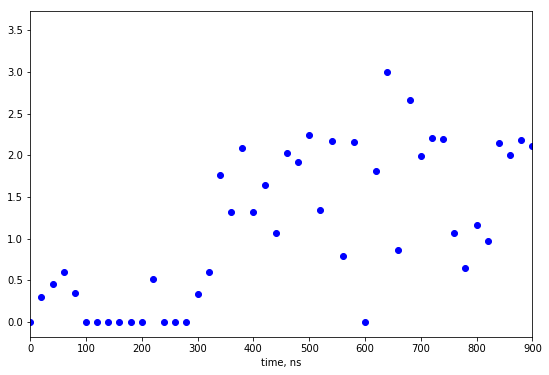

In [63]:
# 1us
plt.plot(x,y,'o',color = 'blue')
plt.xlim(0,900)
plt.xlabel('time, ns')

plt.savefig('for telegram to send.png')

plt.show()


In [60]:
bot.sendMessage(chat_id=chat_id, text="Delay_check redAOM2")
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

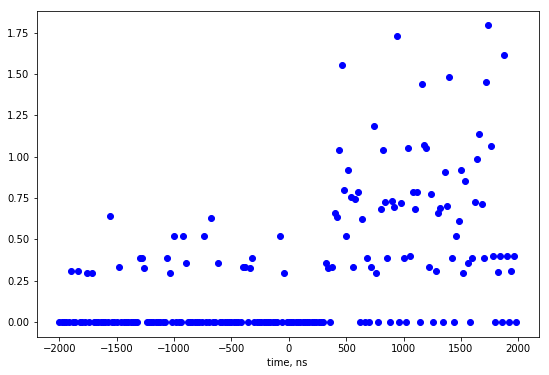

In [54]:
# 1us
plt.plot(x,y,'o',color = 'blue')
# plt.xlim(280,400)
plt.xlabel('time, ns')

plt.savefig('for telegram to send.png')

plt.show()


In [49]:
mw_pleA1()

In [56]:

task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 + markers +mw_trig ,None,None)
time.sleep(1.23e-7)
task.StopTask()

In [57]:
offFunc()

#### ReadAOM

In [451]:
kill_scanner()

In [452]:
_v_min = 0.5
_v_max = 0.75
speed = 0.1

laserscannerlogic.set_laser_number(1)

start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)
laserscannerlogic.odmrlogic().mw_cw_on()


('cw', True)

In [453]:

greenFunc()
time.sleep(0.1)
mw_pleEx()
c = PLE_Ex(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)



673.0


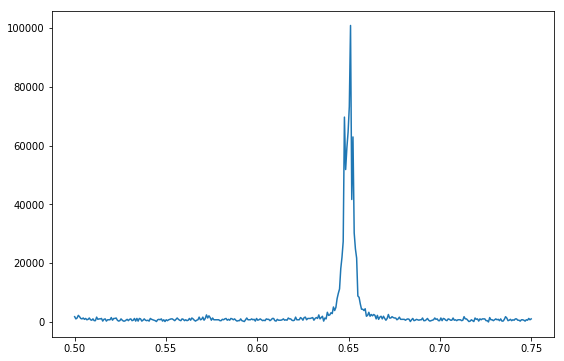

In [454]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min,_v_max,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()


In [455]:
resonance = np.linspace(_v_min,_v_max,len(c))[np.argmax(c)]
print(resonance)
laserscannerlogic._goto_speed = 0.1
laserscannerlogic._goto_during_scan(resonance)
# _v_min =resonance -0.02
# _v_max = resonance + 0.02

0.6510695187165776


0

In [456]:
mw_pleEx()


In [457]:
offFunc()


In [571]:
corr = Correlation(tagger=fastcounter._tagger,
            channel_1=1, 
            channel_2=4,
            binwidth=20000, 
            n_bins=200)


In [572]:
x=[]
y=np.zeros(200)

for j in range(25):
    
    corr.clear()
    greenFunc()
    time.sleep(0.1)
    mw_pleEx()

    c = PLE_Ex(laser_number = 1, v_min = _v_min,v_max = _v_max,speed= speed)

    offFunc()
    resonance = np.linspace(_v_min,_v_max,len(c))[np.argmax(c)]
    laserscannerlogic._goto_speed = 0.03
    laserscannerlogic._goto_during_scan(resonance)
    
    _v_min = resonance -0.02
    _v_max = resonance + 0.02

    for i in range(2000):

        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM+redAOM2 + markers +mw_trig ,None,None)
        time.sleep(1.23e-7)
        task.StopTask()
        offFunc()
        
        
    x = corr.getIndex() / 1e3
    y = y+corr.getDataNormalized()


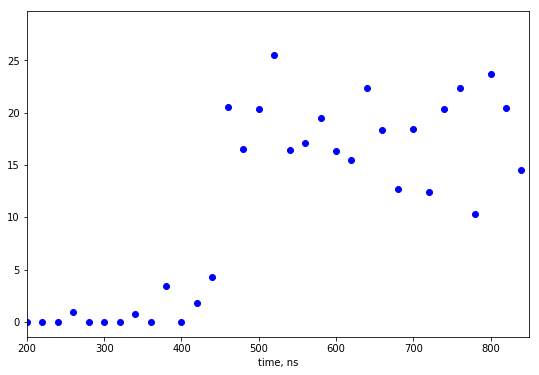

In [581]:
# 1us
plt.plot(x,y,'o',color = 'blue')
plt.xlim(200,850)
plt.xlabel('time, ns')

plt.savefig('for telegram to send.png')

plt.show()


In [582]:
bot.sendMessage(chat_id=chat_id, text="Delay_check for redAOM")
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

#### Green AOM

In [474]:
corr = Correlation(tagger=fastcounter._tagger,
            channel_1=1, 
            channel_2=5,
            binwidth=20000, 
            n_bins=200)

In [475]:
x=[]
y=np.zeros(200)

for j in range(5):
    corr.clear()
    
    offFunc()

    for i in range(200):
        fastcounter._tagger.sync()        
        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, green + markers ,None,None)
        time.sleep(1e-3)
        task.StopTask()
        offFunc()
        
    fastcounter._tagger.sync()        
    x = corr.getIndex() / 1e3
    y = y+corr.getDataNormalized()
    time.sleep(1e-3)



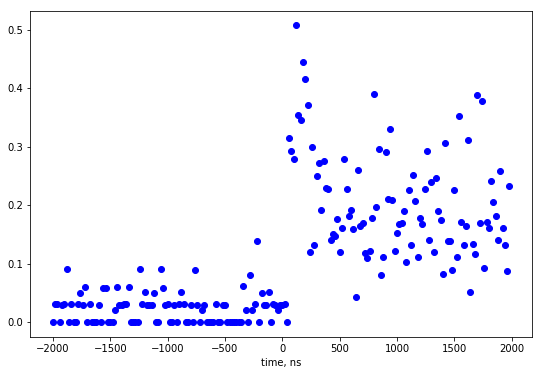

In [478]:
# 1us
plt.plot(x,y,'o',color = 'blue')
# plt.xlim(-50,100)
plt.xlabel('time, ns')

plt.savefig('for telegram to send.png')

plt.show()

In [477]:
bot.sendMessage(chat_id=chat_id, text="Delay_check for greenAOM")
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

# Goto resonance test

#### Ex

In [ ]:
try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
        print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')

In [ ]:
kill_scanner()


In [ ]:
_v_min_Ex = 1.2
_v_max_Ex = 1.8
speed_Ex = 0.2

laserscannerlogic.set_laser_number(1)
start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
# start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)

In [491]:
start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)


In [492]:
greenFunc()
time.sleep(0.1)
mw_pleEx()
c = PLE_Ex(laser_number = 0, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)



655.0


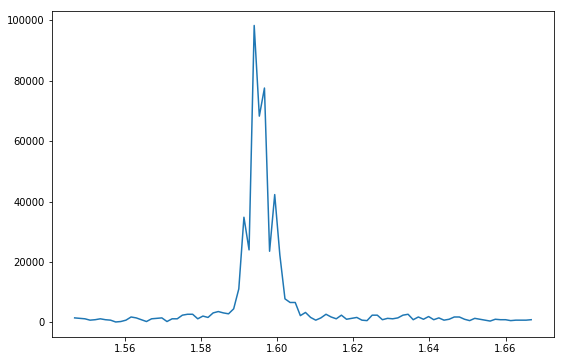

In [493]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min_Ex,_v_max_Ex,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()


In [494]:
resonanceEx = np.linspace(_v_min_Ex,_v_max_Ex,len(c))[np.argmax(c)]
print(resonanceEx)
laserscannerlogic._goto_speed = 0.1
laserscannerlogic._goto_during_scan(resonanceEx)
_v_min_Ex = resonanceEx -0.06
_v_max_Ex = resonanceEx + 0.06

1.5939330847576383


In [503]:
mw_pleEx()


In [504]:
offFunc()

In [497]:
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    end_channel=5,
    n_values=1000) 


In [506]:
# dist = np.linspace(-0.01,0.01,10)
# for d in dist:
#     print(d)

-0.01
-0.0077777777777777776
-0.005555555555555556
-0.003333333333333334
-0.0011111111111111113
0.0011111111111111113
0.0033333333333333322
0.005555555555555555
0.0077777777777777776
0.01


In [536]:
dist = np.linspace(-0.01,0.01,11)
rr=[]

start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
time.sleep(15)
for d in dist:
    temprr=[]
    for i in range(10):
        greenFunc()
        time.sleep(0.1)
        mw_pleEx()
        c = PLE_Ex(laser_number = 0, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
        resonanceEx = np.linspace(_v_min_Ex,_v_max_Ex,len(c))[np.argmax(c)] + d
    #     print(resonanceEx)
        laserscannerlogic._goto_speed = 0.1
        laserscannerlogic._goto_during_scan(resonanceEx)




        countBM.clear()
        #         fastcounter._tagger.sync()  

        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM + mw_trig+ markers ,None,None)
        time.sleep(10e-3)  
        task.StopTask()
        offFunc()
        fastcounter._tagger.sync()   

        ratio = np.sum(countBM.getData())
        temprr.append(ratio)
    rr.append(temprr)
kill_scanner()    

In [537]:
rr

[[75, 84, 127, 113, 89, 87, 108, 99, 117, 86], [79, 197, 100, 98, 166, 137, 130, 102, 71, 118], [138, 85, 163, 220, 92, 156, 134, 266, 216, 133], [198, 446, 246, 1081, 455, 684, 204, 760, 327, 332], [404, 763, 838, 564, 483, 323, 446, 769, 335, 949], [818, 1037, 793, 929, 738, 917, 817, 1154, 1036, 779], [1062, 987, 1064, 606, 700, 419, 874, 739, 997, 545], [1259, 377, 682, 314, 958, 211, 1023, 743, 1167, 248], [266, 102, 845, 101, 144, 360, 162, 245, 242, 137], [125, 118, 252, 146, 99, 152, 144, 92, 135, 107], [103, 98, 87, 116, 116, 146, 148, 111, 105, 137]]

98.5
119.8
160.3
473.3
587.4
901.8
799.3
698.2
260.4
137.0
116.7
[ 98.5 119.8 160.3 473.3 587.4 901.8 799.3 698.2 260.4 137.  116.7]


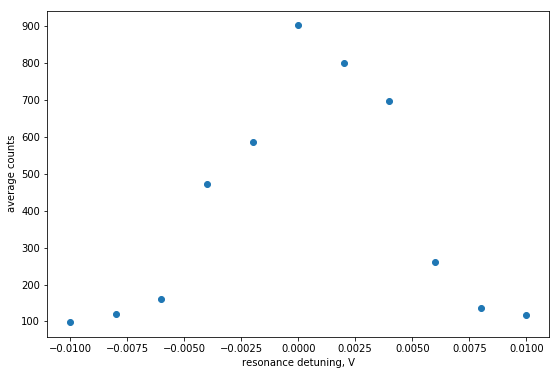

In [538]:
for r in rr:
    print(np.average(r))
print(np.average(rr,axis=1))
plt.plot(dist,np.average(rr,axis=1),'o')
plt.ylabel('average counts')
plt.xlabel('resonance detuning, V')
plt.savefig('for telegram to send.png')
plt.show()
# bot.sendMessage(chat_id=chat_id, text='I have finished')
# bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [535]:
bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [539]:
data_file = open('laser goto resonance Ex.txt', 'w')
s = 'photons_average' +'\t'+'detuning'+'\n'
data_file.write(s)

for index in range(len(dist)):
    s = str(np.average(rr,axis=1)[index]) +'\t'+ str(dist[index]) +'\n'
    data_file.write(s)

data_file.close()

In [531]:
dist = np.linspace(-0.01,0.01,11)
dist

array([-0.01 , -0.008, -0.006, -0.004, -0.002,  0.   ,  0.002,  0.004,
        0.006,  0.008,  0.01 ])

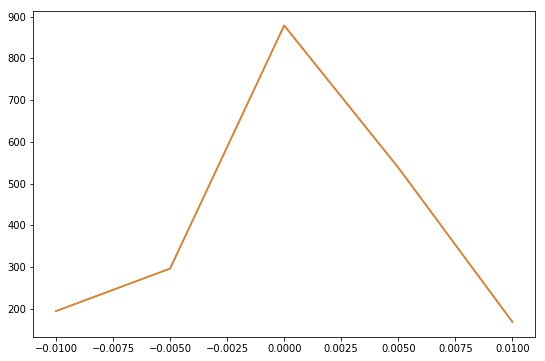

In [512]:
plt.plot(dist,rr)
plt.show()

In [514]:
kill_scanner()

#### A1

In [ ]:
try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
        print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')

In [555]:
start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

In [568]:
greenFunc()
time.sleep(0.01)
mw_pleA1()

time.sleep(1e-2)
c = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
if isinstance(c,int):
    print (c)

42.0


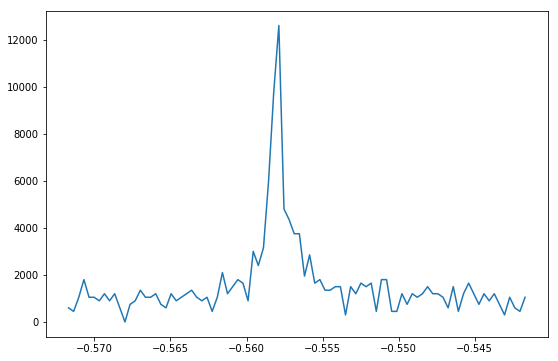

In [569]:

tempcounts = [ee for ee in c if ee!=0]
print( max(tempcounts)/min(tempcounts))
      
plt.plot(np.linspace(_v_min_A1,_v_max_A1,len(c)),c,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()

In [582]:
(0.565-0.550)/2

0.007499999999999951

In [570]:
offFunc()
resonanceA1 = np.linspace(_v_min_A1,_v_max_A1,len(c))[np.argmax(c)]
laserscannerlogic._goto_speed = 0.1
laserscannerlogic._goto_during_scan(resonanceA1)
_v_min_A1 = resonanceA1 -0.015
_v_max_A1 = resonanceA1 +0.015
print(resonanceA1)
# print('_v_max ',_v_max)

-0.5578761028580046


In [571]:
mw_pleA1()


In [572]:
offFunc()

In [575]:
kill_scanner()

In [583]:
dist = np.linspace(-0.007,0.007,20)
rr=[]

start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
time.sleep(5)

for d in dist:
    temprr=[]
    for i in range(15):
        
        greenFunc()
        time.sleep(0.01)
        mw_pleA1()
        c = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
        resonanceA1 = np.linspace(_v_min_A1,_v_max_A1,len(c))[np.argmax(c)]+d
        laserscannerlogic._goto_speed = 0.1
        laserscannerlogic._goto_during_scan(resonanceA1)

        countBM.clear()
        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 + mw_trig+ markers ,None,None)
        time.sleep(10e-3)  
        task.StopTask()
        offFunc()
        fastcounter._tagger.sync()   

        ratio = np.sum(countBM.getData())
        temprr.append(ratio)
    rr.append(temprr)
    
kill_scanner()    

118.13333333333334
111.8
120.0
104.6
102.33333333333333
105.73333333333333
109.66666666666667
120.06666666666666
125.46666666666667
168.2
170.06666666666666
137.06666666666666
128.8
133.6
118.6
111.0
110.0
109.73333333333333
129.0
117.8
[118.13333333 111.8        120.         104.6        102.33333333
 105.73333333 109.66666667 120.06666667 125.46666667 168.2
 170.06666667 137.06666667 128.8        133.6        118.6
 111.         110.         109.73333333 129.         117.8       ]


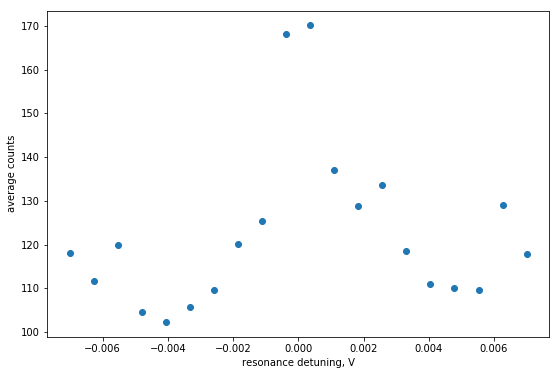

In [587]:
for r in rr:
    print(np.average(r))
print(np.average(rr,axis=1))
plt.plot(dist,np.average(rr,axis=1),'o')
plt.ylabel('average counts')
plt.xlabel('resonance detuning, V')
plt.savefig('Laser goto resonance check A1.png')
plt.show()
# bot.sendMessage(chat_id=chat_id, text='I have finished')
# bot.send_photo(chat_id=chat_id, photo=open('for telegram to send.png', 'rb'))

In [586]:
data_file = open('laser goto resonance A1.txt', 'w')
s = 'photons_average' +'\t'+'detuning'+'\n'
data_file.write(s)

for index in range(len(dist)):
    s = str(np.average(rr,axis=1)[index]) +'\t'+ str(dist[index]) +'\n'
    data_file.write(s)

data_file.close()

# Some Trash

In [6]:
_v_min = 0
_v_max = 0.3
speed = 0.2
start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)

kernel updateModuleList


In [27]:
c = PLE(laser_number = 1, v_min = _v_min,v_max = _v_max,speed= speed)


In [11]:
laserscannerlogic.current_position[laserscannerlogic.laser_number]

0.0

In [8]:
laserscannerlogic._upwards_ramp[laserscannerlogic.laser_number][0]

0.0

In [21]:

laserscannerlogic.current_position


array([0.4, 0.4])

In [ ]:
# проблема в том, что после го ту он куда то переезжает и когда делаешь ПЛЕ, то делает неоттуда

In [28]:
# laserscannerlogic.set_laser_number(0)

laserscannerlogic._goto_during_scan(0.6)

0

In [29]:
laserscannerlogic._scanning_device._current_position_laser

array([0.3, 0.3])

In [25]:
laserscannerlogic._upwards_ramp[1][-1]



0.0

In [8]:
repumpTime = 0.001
ssr = []
scan_counts=[]
counts = []
isStop = False
    

In [256]:
laserscannerlogic.odmrlogic().mw_off()


('cw', False)

In [5]:
repumpTime = 0.001
ssr = []
scan_counts=[]
counts = []
isStop = False
    
    
def scan():
    inf = 1/min(np.array([0,1]))
    laserscannerlogic.odmrlogic().mw_cw_on()
    time.sleep(0.02)
    try:
        global counts,upwards_ramp,downwards_ramp
        laserscannerlogic._upwards_ramp = upwards_ramp
        laserscannerlogic._downwards_ramp = downwards_ramp        
        greenFunc()        
        time.sleep(repumpTime)
        index = 0
        for j in range(5):
            index+=1
            redFunc()
            counts =  laserscannerlogic._do_next_one_line()
            if counts is None:
                print('COUNTS are NONE in scan!!!')
                laserscannerlogic.odmrlogic().mw_off()
                time.sleep(0.02)
                break;
            else:
                scan_counts.append(counts)
#                 print('index: ',index)
                tempcounts = [ee for ee in counts if ee!=0]
                ratio = max(tempcounts)/min(tempcounts)
#                 print('ratio ',ratio )
                if ratio<70:
                    greenFunc()
                    time.sleep(repumpTime)
                else:
                    laserscannerlogic.odmrlogic().mw_off()
                    time.sleep(0.02)
                    break;
                    return 0
                
        if index ==10:
            isStop  = True
            print('STOPPED repump index == 10')
            laserscannerlogic.odmrlogic().mw_off()  
            time.sleep(0.02)
            return 1
        
    except Exception as e:
        print('exception!')
        print('counts ',counts)
        print('laserscannerlogic._upwards_ramp ',laserscannerlogic._upwards_ramp )
        print('laserscannerlogic._downwards_ramp ',laserscannerlogic._downwards_ramp )
                    
# SHOULD BE SCANNING WITH SWEEPED TIME


In [7]:
kill_scanner()

In [ ]:
# v0= -0.895
# v1= -0.875
# laserscannerlogic.set_clock_frequency(150)
# init_scanner(v_min = v0,v_max = v1,speed= 0.01)

In [6]:
_v_min = -0.95
_v_max = -0.75
laserscannerlogic.set_clock_frequency(150)
speed = 0.01

upwards_ramp = laserscannerlogic._generate_ramp(_v_min, _v_max, speed)
downwards_ramp = laserscannerlogic._generate_ramp(_v_max, _v_min, speed)

init_scanner(v_min = _v_min,v_max = _v_max,speed= speed)

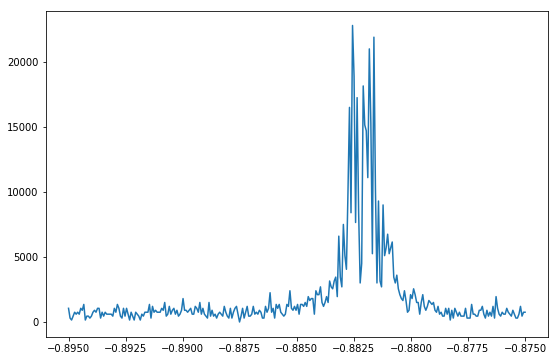

In [458]:
scan()
plt.plot(np.linspace(_v_min,_v_max,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()

In [29]:
laserscannerlogic.odmrlogic().mw_off()


('cw', False)

In [64]:
kill_scanner()

In [78]:
redAOM2+mw_trig

array([0, 1, 0, 0, 1, 1, 0, 0], dtype=uint8)

In [95]:
_v_min = -1.5
_v_max = 0.5
laserscannerlogic.set_clock_frequency(50)
speed = 0.2

upwards_ramp = laserscannerlogic._generate_ramp(_v_min, _v_max, speed)
downwards_ramp = laserscannerlogic._generate_ramp(_v_max, _v_min, speed)

start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)

In [99]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()

time.sleep(0.01)

# task.StartTask()
# task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM2+mw_trig-green,None,None)
# task.StopTask()
# redA1Func()
mw_pleA1()

counts = laserscannerlogic._do_next_one_line()


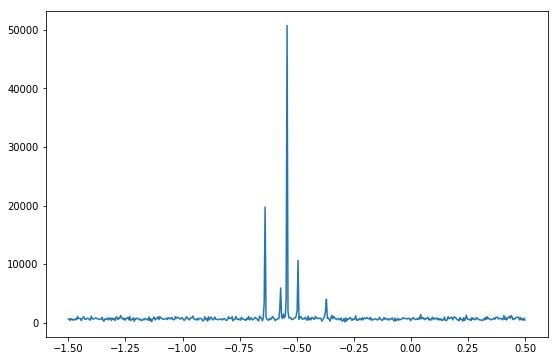

In [100]:
plt.plot(np.linspace(_v_min,_v_max,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()

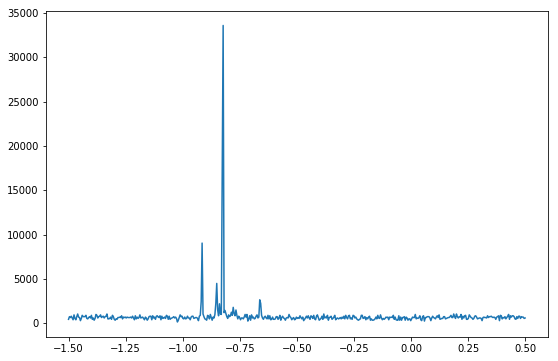

In [86]:
plt.plot(np.linspace(_v_min,_v_max,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()



In [33]:
offFunc()

resonance = np.linspace(_v_min,_v_max ,len(counts))[np.argmax(counts)]
print(resonance)

laserscannerlogic._goto_during_scan(resonance)

-0.813135593220339


0

In [38]:
cteset = readoutFunc(1e-1)
print('cteset ',cteset)

cteset  689


In [107]:
greenFunc()

In [31]:
laserscannerlogic.odmrlogic().mw_off()


('cw', False)

In [30]:
laserscannerlogic.odmrlogic().mw_cw_on()

('cw', True)

In [57]:
inf = 1/min(np.array([0,1]))
1/min(counts)==inf

True

In [40]:
start = 1e-6
stop =30e-6
n = 50 # amount of points
step = (stop-start) / n
readouttime = 1e-1
m = 50# how much times should code measure every point
data = np.zeros((n,m))
offFunc()
times = np.linspace(start,stop,n)

scan()

offFunc()
resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
laserscannerlogic._goto_during_scan(resonance)
laserscannerlogic.odmrlogic().mw_off()
time.sleep(0.02)

for t in range(len(times)):
    
    scan()
    offFunc()
    resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
    laserscannerlogic._goto_during_scan(resonance)
    laserscannerlogic.odmrlogic().mw_off()
    time.sleep(0.02)
    
    for i in range(m):   
        redFunc()
        time.sleep(times[t])   
        ccc = readoutFunc(readouttime)
        data[t][i] = ccc
        
        greenFunc()
        time.sleep(0.1)

In [44]:
data

array([[  0.,  54.,  52., ...,  13.,   7.,  65.],
       [ 51.,  26.,   3., ...,  81.,  91.,  56.],
       [  4.,  79.,  66., ...,  61.,  23.,  20.],
       ...,
       [ 84.,  55.,  27., ..., 108.,  27.,  39.],
       [ 36.,  31.,  14., ...,  79.,  25.,  18.],
       [ 26.,   9.,  95., ...,  30.,   4.,  60.]])

In [41]:
datatemp = data.copy()
y=[]
for it in range(len(datatemp)):
    y.append(sum(datatemp[it]))
    

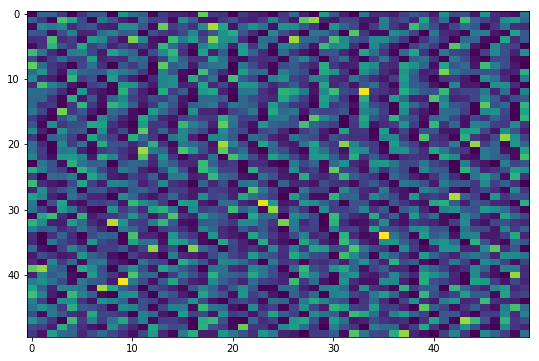

In [42]:

plt.imshow(data,interpolation='nearest', aspect='auto')
plt.show()



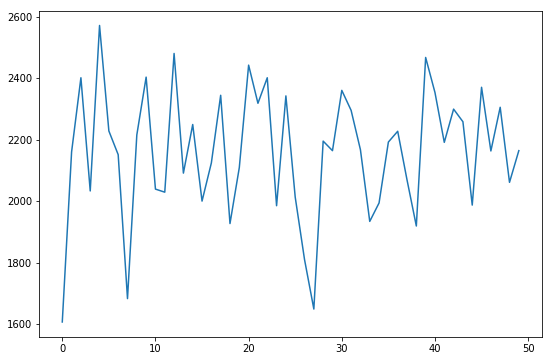

In [43]:
plt.plot(y)
plt.show()

In [49]:
# tempcounts = [ee for ee in counts if ee!=0]
x = []
z = []
datatemp = data.copy()
for it in range(len(datatemp)):
#     ter = [ees for ees in datatemp[it] if ees>20]
    z.append(np.average(datatemp[it]))
#     for r in ter:
#         x.append(it)
#         z.append(r)


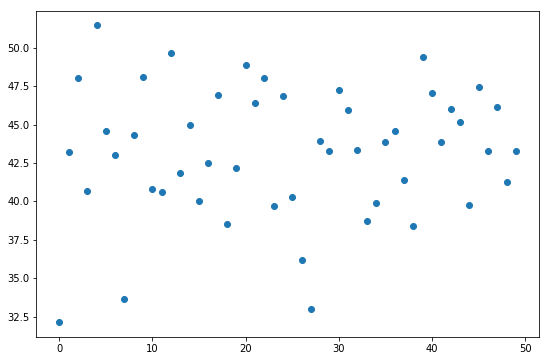

In [50]:
plt.plot(z,'o')
plt.show()

In [50]:
start = 1e-6
stop =30e-6
n = 20 # amount of points
step = (stop-start) / n
readouttime = 1e-1
m = 5 # how much times should code measure every point
data = np.zeros((n,m))
offFunc()
times = np.linspace(start,stop,n)



In [51]:
len(times)

20

In [ ]:
start = 1e-6
stop =30e-6
n = 20 # amount of points
step = (stop-start) / n
readouttime = 1e-1
m = 5 # how much times should code measure every point
data = np.zeros((n,m))
offFunc()
times = np.linspace(start,stop,n)

scan()


offFunc()
resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
laserscannerlogic._goto_during_scan(resonance)


for t in range(len(times)):
    
    for i in range(m):   
        laserscannerlogic.odmrlogic().mw_off()
        time.sleep(0.02)

        ind = 0
        while ind<10:
            ind+=1
            
            redFunc()
            time.sleep(times[t])
            
            ccc = readoutFunc(readouttime)
            
            if ccc<20:
                scan()
                offFunc()
                resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
                laserscannerlogic._goto_during_scan(resonance)
            else:
                ind = 10
            data[t][i] = ccc
            greenFunc()
            time.sleep(repumpTime)


    



In [ ]:
data

In [210]:
import telegram
bot = telegram.Bot(token='968560013:AAGSzyvq3SEnHpo-o4WPeXM8_sywoKDYZH0')
# bot = telegram.Bot(token='TOKEN')

# print(bot.get_me())
chat_id = bot.get_updates()[-1].message.chat_id
chat_id # 111963322

# bot.sendMessage(chat_id=chat_id, text="Hi, Javid. Yours chat id for this session is " + str(chat_id))
bot.sendMessage(chat_id=chat_id, text="Hi, Javid. I have finished")

In [203]:
print(bot.get_me())


{'id': 968560013, 'first_name': 'Javid jupyter bot', 'is_bot': True, 'username': 'javid_jupyter_bot'}


In [205]:
bot.get_updates()[-1].message.chat_id

111963322

In [482]:
laserscannerlogic.number_of_repeats = 10000
laserscannerlogic.number_of_repeats 

10000

In [185]:
data

array([[322., 379.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.],
       [ 34.,   0.,   0.,   0.,   0., 589.,   0.,   0.,   0.,   0.],
       [  0., 144., 261.,   0.,   0.,   0., 722.,   0., 486.,   0.],
       [370., 247., 128.,  45.,   0.,   0.,   0.,   1., 256.,   0.],
       [153.,   0.,   0., 462., 199.,   0.,   0.,   0.,   0.,   0.],
       [  0., 703.,   0.,   0.,   0.,   0., 555.,   0., 119.,  59.],
       [528., 153.,   0., 513.,   0.,  79.,  42.,  65., 264.,   0.],
       [  0.,  63.,   0.,   0.,   0.,   0., 513.,   0.,   0.,   3.],
       [  0.,   0.,   0., 303.,   0.,   0., 398.,  50.,   0.,   0.],
       [296.,   0.,   0.,   3., 592.,   0.,   0.,   0.,   0., 362.]])

In [168]:
data

array([[  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,   0.,   0.],
       [  0.,  58.,   0.],
       [  0., 210., 435.],
       [  0.,   0.,   0.],
       [  0.,   0.,  75.],
       [460.,   0.,   0.],
       [265.,   0.,   0.],
       [  0., 521.,   0.]])

In [146]:
greenFunc()


In [147]:
redFunc()


In [77]:
start = 1e-6
stop =10e-6
n = 10 # amount of points
step = (stop-start) / n
readouttime = 1e-3

m = 2 # how much times should code measure every point


data = np.zeros((n,m))

offFunc()
times = np.linspace(start,stop,n)
for t in range(len(times)):
    for i in range(m):
#         time.sleep(readouttime)
        redFunc()
        time.sleep(times[t])
        ccc = readoutFunc(readouttime)
        print(ccc)
        data[t][i] = ccc
        greenFunc()

    



0
0
0
0
0
0
0
0
0
0
0
94
0
0
0
0
0
0
0
0


In [115]:
data = np.zeros((n,m))
data[2][0] = 4
data


array([[0., 0.],
       [0., 0.],
       [4., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.]])

[[0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1], [0, 1]]

In [145]:
len(times)

10

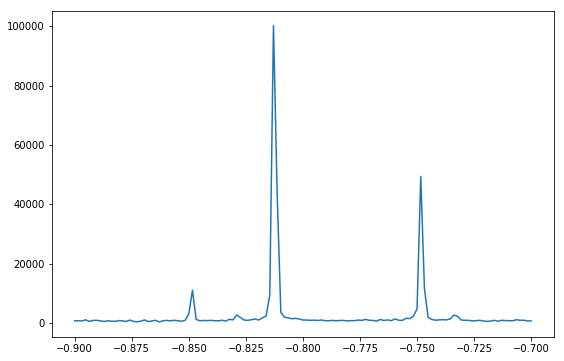

In [1]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()

In [ ]:
mw_on()  #     MW to create random mixture
time.sleep(0.1)
offFunc()

time.sleep(0.001)

task.StartTask()
countBM.clear()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 + markers ,None,None)
time.sleep(1)  
task.StopTask()
offFunc()
countBM.getData()


In [ ]:

plt.imshow(data,interpolation='nearest', aspect='auto')
plt.show()

# TESTS

In [ ]:
_v_min = -0.62
_v_max = -0.57
speed = 0.02

In [ ]:
from TimeTagger import Correlation
laserscannerlogic.set_scan_lines(1e6)

start = 0.1e-6
stop = 10.1e-6
n = 10 # amount of points
step = (stop-start) / n
m = 501# how much times should code measure every point
# data = np.zeros((n,m))
data = []
threshhold = 100
rr =[]

offFunc()
times = np.linspace(start,stop,n)
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    n_values=1000)

countBM.clear()
fastcounter._tagger.sync()   




_v_min_A1 = -0.62
_v_max_A1 = -0.57
speed_A1 = 0.02

_v_min_Ex =1.07
_v_max_Ex =1.3
speed_Ex = 0.05


try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
#         print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')


greenFunc()
time.sleep(0.1)

clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

temp_data=[]
main_temp_data=[]
# countBM.clear()
period = 10e-8   

start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
mw_pleA1()
counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

if isinstance(counts_A1,int):
    if counts_A1 == -1:
        print('counts_A1 are None')
    if counts_A1 ==0:
        print('cant find PLE line _A1')

offFunc()
resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
laserscannerlogic._goto_during_scan(resonance_A1)     

kill_scanner()       
countBM.clear()

t = 250
delayA1 = 0
x=[]
y=np.zeros(n_bins)

voltagesA1 =     [0]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
voltagesEx =     [0]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
voltagesMW =     [1]*10 + [0]*5 + [0] * delayA1 + [0] * t + [0] * delayA1 + [0] 
voltagesGreen =  [0]*10 + [0]*5 + [1] * delayA1 + [1] * t + [0] * delayA1 + [0] 
voltagesDetect = [0]*10 + [0]*5 + [0] * delayA1 + [1] * t + [1] * delayA1 + [0] 



voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)

corr.clear()

for i in range(m):
    if i%100 ==0 and i>0:
        x = corr.getIndex() / 1e3
        y = y+corr.getDataNormalized()
           
        start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
        mw_pleA1()
        counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
        if isinstance(counts_A1,int):                                                    
            if counts_A1 == -1:
                print('counts_A1 are None')
                break;
            if counts_A1 ==0:
                print('cant find PLE line _A1')
                break;          

        resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
        laserscannerlogic._goto_during_scan(resonance_A1)
        kill_scanner()

    do_sequence(voltages)


In [ ]:
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    n_values=1000) 
countBM.clear()

rr=[]
countBM.clear()
fastcounter._tagger.sync()   




for y in range(10):
    
    countBM.clear()
    fastcounter._tagger.sync()  
    
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
#     task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, mw_trig+ markers ,None,None)

    time.sleep(10e-3)  
    task.StopTask()
    offFunc()
    # ======================== experiment======================
    fastcounter._tagger.sync()   

    ratio = np.sum(countBM.getData())
    fastcounter._tagger.sync()   

    rr.append(ratio)
    
print(np.average(rr))

# if ratio>6:
#     main_temp_data.append(temp_data)   
#     offFunc()
# else:
#     start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)
#     mw_pleA1()
#     mw_pleA1()
#     counts = PLE_A1(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)

# resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
# #             _v_min = resonance -0.01
# #             _v_max = resonance + 0.01
# offFunc()
# laserscannerlogic._goto_during_scan(resonance)
# temp_data = []


In [95]:
    
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=4,
    n_values=1)
    
def readoutFunc(readouttime):
    countBM.clear() # Clear the buffer
    
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,markers,None,None)
    time.sleep(readouttime)
    task.StopTask()
    offFunc()
    
    return countBM.getData()[0]
    

In [98]:
readoutFunc(1e-1)

27

[38.440000000000005, 43.4, 50.56, 60.879999999999995, 66.62, 75.7, 80.6, 92.12, 100.53999999999999, 108.72, 120.05999999999999]


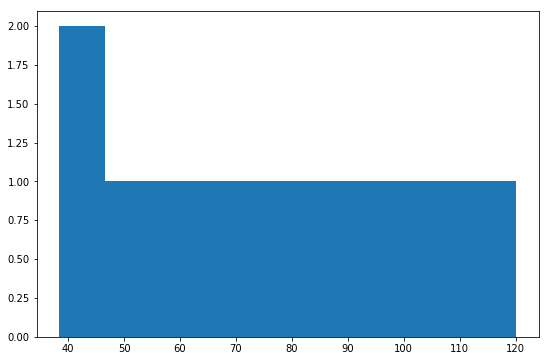

In [30]:
data = []
times = np.linspace(1,3,11)
for k in times:
    s = 0
    for t in range(5):
        countBM.clear()
        task.StartTask()
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,markers,None,None)
        time.sleep(k)
        task.StopTask()
        offFunc()
        s+=np.average(countBM.getData())
        countBM.clear()
    data.append(s/5)

print(data)
plt.hist(data)
plt.show()

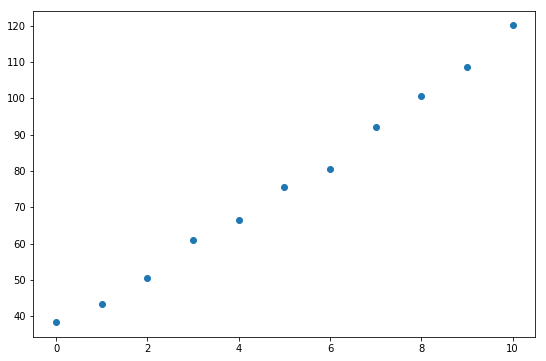

In [31]:
plt.plot(data,'o')
plt.show()

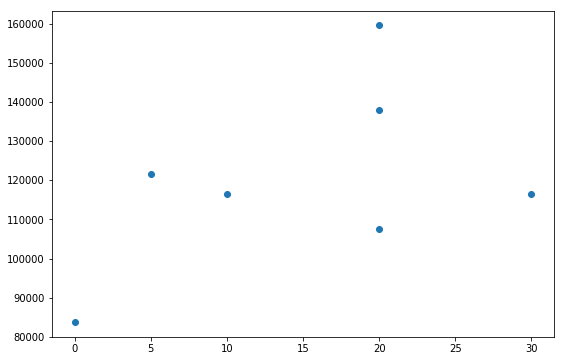

In [57]:
QWP = 0
x = [0,5,10,30,20,20,20]
y=[83781,121687.5,116468.75,116531.25,137937.5,107531.25,159625.0]
plt.plot(x,y,'o')
plt.show()

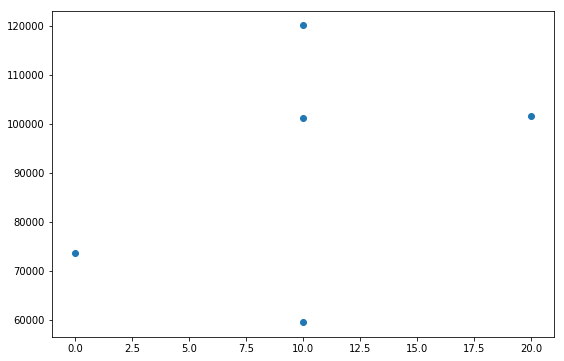

In [101]:
QWP = 10
x = [0,10,10,10,20]
y=[73593.75,120187.5,101343.75,59500.0,101750.0]
plt.plot(x,y,'o')
plt.show()

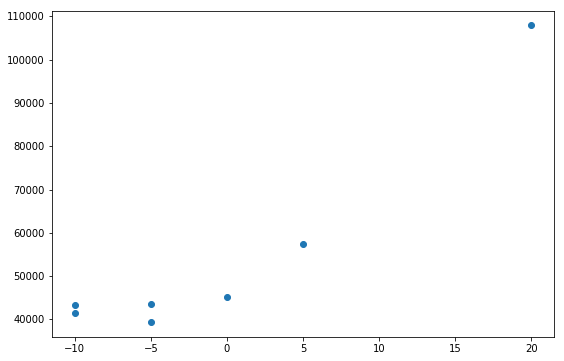

In [160]:
QWP = 20
x = [20,0,5,-5,-5,-10,-10]
y=[107906,45187.5,57375.0,43625.0,39406.25,43250.0,41562.5]
plt.plot(x,y,'o')
plt.show()

In [178]:
QWP = 25
x = [0,0,0]
y=[34781.25,39968.75,41468.75]
plt.plot(x,y,'o')
plt.show()

<function show at 0x000002126E7A2AE8>

In [399]:
laserscannerlogic._goto_speed = 1.0
laserscannerlogic._goto_during_scan(-0.90)

0

In [7]:
# laserscannerlogic._upwards_ramp

In [134]:
    
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=4,
    n_values=1)
    
def readoutFunc(readouttime):
    countBM.clear() # Clear the buffer
    
    task.StartTask()
    task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,markers,None,None)
    time.sleep(readouttime)
    task.StopTask()
    offFunc()
    
    return countBM.getData()[0]

In [170]:
kill_scanner()

In [171]:
v0= -0.895
v1= -0.875
laserscannerlogic.set_clock_frequency(150)
init_scanner(v_min = v0,v_max = v1,speed= 0.01)

In [352]:
task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,green,None,None)
task.StopTask()

time.sleep(0.01)

task.StartTask()
task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel,redAOM,None,None)
task.StopTask()

counts = laserscannerlogic._do_next_one_line()


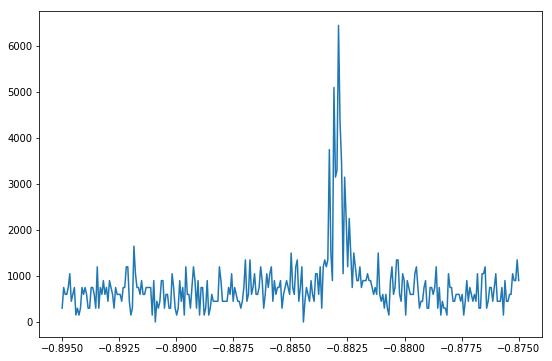

In [353]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()

In [354]:
offFunc()

resonance = np.linspace(v0,v1,len(counts))[np.argmax(counts)]


In [355]:
resonance

-0.8828929765886288

In [356]:
laserscannerlogic._goto_during_scan(resonance)

0

In [288]:
cteset = readoutFunc(1e-1)
print('cteset ',cteset)

cteset  265


In [358]:
for i in range(10):
    cteset = readoutFunc(1e-1)
    time.sleep(0.1)
    print('cteset ',cteset)

cteset  152
cteset  229
cteset  183
cteset  111
cteset  140
cteset  168
cteset  189
cteset  143
cteset  151
cteset  172


In [362]:
for i in range(20):
    cteset = readoutFunc(1e-1)
    time.sleep(0.1)
    print('cteset ',cteset)

cteset  20
cteset  229
cteset  63
cteset  6
cteset  17
cteset  12
cteset  5
cteset  0
cteset  0
cteset  83
cteset  63
cteset  79
cteset  64
cteset  53
cteset  54
cteset  54
cteset  64
cteset  45
cteset  47
cteset  45


In [361]:
for i in range(10):
    cteset = readoutFunc(1e-2)
#     time.sleep(0.1)
    print('cteset ',cteset)

cteset  0
cteset  0
cteset  25
cteset  0
cteset  0
cteset  0
cteset  0
cteset  0
cteset  0
cteset  0


In [217]:
redFunc()

In [291]:
greenFunc()

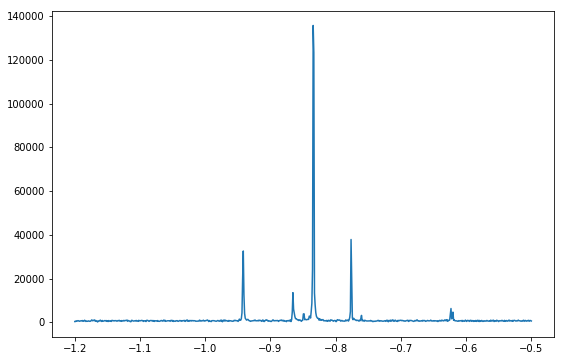

In [29]:
plt.plot(np.linspace(v0,v1,len(counts)),counts,'-')
# plt.savefig('nice PLE single scan.png')
plt.show()

In [54]:
max(counts)/min(counts)

17.56637168141593

In [55]:

resonance = np.linspace(v0,v1,len(counts))[np.argmax(counts)]
print('resonance= ',resonance)
laserscannerlogic._goto_during_scan(resonance)


resonance=  -0.87225


0

In [56]:

resonance = np.linspace(v0,v1,len(counts))[np.argmax(counts)]
print(resonance)
laserscannerlogic._goto_speed = 1.0
# laserscannerlogic._static_v = resonance
laserscannerlogic._goto_during_scan(resonance)


-0.87225


0

In [8]:
laserscannerlogic._goto_speed


0.05

In [22]:
resonance = np.linspace(v0,v1,len(counts))[np.argmax(counts)]
resonance

-0.7114743162108073

In [11]:
laserscannerlogic._static_v 

-0.8975983989326217

In [455]:
np.array([resonance,2])

array([-0.83934426,  2.        ])

In [12]:
laserscannerlogic._scanning_device._current_position_laser 

array([-0.9,  0. ])

In [67]:

greenFunc()




In [70]:
offFunc()

In [69]:
redFunc()

In [364]:
s=0
for t in range(len(counts)):
    if (np.linspace(v0,v1,len(counts))[t]>-0.775):
        s+=counts[t]
print(s)

38218.75


In [154]:
for j in range(10):
    print(j)
    break;

0


In [91]:
test = np.array([0,1,0,0,2])
test = [ee for ee in test if ee!=0]

test

[1, 2]

In [2]:
laserscannerlogic._scanning_device._current_position_laser

array([0., 0.])

In [5]:
r_max = np.clip(laserscannerlogic.scan_range[1], laserscannerlogic.a_range[laserscannerlogic.laser_number][0], laserscannerlogic.a_range[laserscannerlogic.laser_number][1])
r_min = np.clip(laserscannerlogic.scan_range[0], laserscannerlogic.a_range[laserscannerlogic.laser_number][0], r_max)
# self.scan_range = [r_min, r_max]

In [7]:
r_max
r_min

-0.88

In [5]:
import numpy as np
np.ones((5,)) * 1

array([1., 1., 1., 1., 1.])

In [110]:
greenFunc()

In [111]:
offFunc()

In [121]:
start = 0.5e-6
stop = 9.5e-6
n = 20 # amount of points
step = (stop-start) / n
m = 3001# how much times should code measure every point
# data = np.zeros((n,m))
data = []
threshhold = 100
rr =[]

offFunc()
times = np.linspace(start,stop,n)

delayA1 = 3

countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    n_values=1000)   #???? increase buffer size


clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

# for t_index in range(len(times)):
begin = time.time()

period = 10e-8   
# t = int(times[t_index]/period)             
t = 5000


voltagesA1 = [1,0]*t
voltagesEx = [1,0]*t
voltagesMW = [1,0]*t
voltagesGreen = [1,0]*t
voltagesDetect = [1,0]*t


voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)

a=[]
b=[]
for i in range(10):


    do_sequence(voltages)
    fastcounter._tagger.sync()   
    b = countBM.getData()


a = countBM.getData()
end = time.time()
    
print(end-begin)

1.9121088981628418


In [122]:
a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [124]:
b-a

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [116]:
len(voltagesA1)

5016

In [13]:

for i in range(1):
    print(i)

0


In [14]:
greenFunc()

In [6]:
laserscannerlogic.odmrlogic().mw_cw_on()
laserscannerlogic.odmrlogic().mw_off()



('cw', False)

# OLD CODES

In [ ]:



# def singleshot():
#     global counts,readouttime
#     offFunc()
    
#     resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
#     laserscannerlogic._goto_during_scan(resonance)
    
    
#     #!!!!!!!!!!!! CHANGE IT
#     counts = readoutFunc(readouttime)
#     #!!!!!!!!!!!!
#     if counts is None:
#         print('COUNTS are NONE in single shot!!!')
#     else:
#         ssr.append(counts)
    
    
    


In [ ]:
laserscannerlogic.set_scan_lines(1e6)

start = 0.5e-6
stop = 9.5e-6
n = 3 # amount of points
step = (stop-start) / n
m = 2001# how much times should code measure every point
# data = np.zeros((n,m))
data = []

offFunc()
times = np.linspace(start,stop,n)

    
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=4,
    n_values=1)

_v_min = -0.8
_v_max = -0.75
speed = 0.02

start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)
greenFunc()
time.sleep(0.1)


for t in range(len(times)):
    
    mw_pleA1()
    counts = PLE_A1(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)
    
    if len(counts)==1:
        if counts == -1:
            print('counts are None')
            break;
        if counts ==0:
            print('cant find PLE line')
            break;

    offFunc()
    resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
    laserscannerlogic._goto_during_scan(resonance)
#     _v_min = resonance -0.01
#     _v_max = resonance + 0.01
    
    
    
    main_temp_data=[]
    temp_data = []
    
    for i in range(m):    
        
        # ======================= check PLE after 100 scans=======================
        if i%1000==0 and i>0:
            
            mw_pleA1() # 1 PLE check
            counts = laserscannerlogic._do_next_one_line()             

            
            if counts is None:
                print('COUNTS are NONE in scan!!!')
                offFunc()
                break;
            else:
                tempcounts = [ee for ee in counts if ee!=0]
                ratio = max(tempcounts)/min(tempcounts)
                if ratio>40:
                    main_temp_data.append(temp_data)   
                    offFunc()
                else:
                    mw_pleA1()
                    counts = PLE_A1(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)
                    
            resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
#             _v_min = resonance -0.01
#             _v_max = resonance + 0.01
            offFunc()
            laserscannerlogic._goto_during_scan(resonance)
            temp_data = []
            
        # ======================= check PLE =======================
        
        # ======================== experiment======================
        
        mw_on()  #     MW to create random mixture
        time.sleep(10e-6)
        offFunc()

#         time.sleep(0.001)

        task.StartTask()
        countBM.clear()
        
        task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 + markers ,None,None)
        time.sleep(times[t])  
        task.StopTask()
        offFunc()
        # ======================== experiment======================
        temp_data.append(countBM.getData()[0])
    
    data.append(main_temp_data)


In [14]:

# n = 300000

voltagesA1 = [0]*100 + [1] * delayA1 +[1] * t + [0] * delayA1 
voltagesEx = [0]*100 + [0] * delayA1 + [0] * t + [0] * delayA1 
voltagesMW = [1]*100 + [0] * delayA1 + [0] * t + [0] * delayA1 
voltagesGreen = [0]*100 +[0] * delayA1 + [0] * t + [0] * delayA1 
voltagesDetect = [0]*100 + [0] * delayA1 + [0] * t+ [1] * delayA1 


voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)



# voltages = np.array(
#     np.vstack([[1,0,1,0]*n , [1,1,0,0]*n]), dtype=np.uint8)

daq.DAQmxCfgSampClkTiming(
    # add to this task
    main,
    # use this channel as clock
    'Ctr4InternalOutput',
    # Maximum expected clock frequency
#     1250,
    1/float(period),
    # Generate sample on falling edge
    daq.DAQmx_Val_Rising,
    # generate finite number of samples
    daq.DAQmx_Val_FiniteSamps,
    # number of samples to generate
    len(voltages[0]))


# Sets only the number of samples to acquire or generate without specifying timing. 
daq.DAQmxCfgImplicitTiming(
    clock,
    daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
    1000 # the buffer size
)

daq.DAQmxStartTask(clock)
daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)

_AONwrittenMaster = daq.int32()

daq.DAQmxWriteDigitalLines(
# daq.DAQmxWriteDigitalU32(
            # write to this task
            main,
            # length of the command (points)
            len(voltages[0]),
            # start task immediately (True), or wait for software start (False)
            False,
            # maximal timeout in seconds for# the write process
            20,
            # Specify how the samples are arranged: each pixel is grouped by channel number
    
            daq.DAQmx_Val_GroupByChannel,
#             daq.DAQmx_Val_GroupByScanNumber,
            # the voltages to be written
            voltages,
            # The actual number of samples per channel successfully written to the buffer
            daq.byref(_AONwrittenMaster),
            # Reserved for future use. Pass NULL(here None) to this parameter
            None)




Traceback (most recent call last):
  File "C:\Program Files (x86)\Qudi\logic\jupyterkernel\qzmqkernel.py", line 795, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-14-78e3556aca1f>", line 4, in <module>
    voltagesA1 = [0]*100 + [1] * delayA1 +[1] * t + [0] * delayA1
NameError: name 'delayA1' is not defined


In [ ]:
voltagesA1 = [0]*100 + [1] * delayA1 +[1] * t + [0] * delayA1 
voltagesEx = [0]*100 + [0] * delayA1 + [0] * t + [0] * delayA1 
voltagesMW = [1]*100 + [0] * delayA1 + [0] * t + [0] * delayA1 
voltagesGreen = [0]*100 +[0] * delayA1 + [0] * t + [0] * delayA1 
voltagesDetect = [0]*100 + [0] * delayA1 + [0] * t+ [1] * delayA1 


voltages = np.array(
     np.vstack([
         voltagesDetect,
         voltagesMW,
         voltagesGreen,
         voltagesEx,             
         voltagesA1
     ]), dtype=np.uint8)


In [ ]:
laserscannerlogic.set_scan_lines(1e6)

start = 0.5e-6
stop = 9.5e-6
n = 3 # amount of points
step = (stop-start) / n
m = 201# how much times should code measure every point
# data = np.zeros((n,m))
data = []

rr =[]

offFunc()
times = np.linspace(start,stop,n)
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=4,
    n_values=1000)   #???? increase buffer size

_v_min = -0.76
_v_max = -0.72
speed = 0.02


# start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)
greenFunc()
time.sleep(0.1)

delayA1 = 3

for t_index in range(len(times)):
  
            
    try:
        daq.DAQmxStopTask(main)    
        daq.DAQmxClearTask(main)
    except:
        pass


    try:
        daq.DAQmxStopTask(clock)
        daq.DAQmxClearTask(clock)

    except:
        pass
       
# ==================================================================       
    start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)
    mw_pleA1()
    counts = PLE_A1(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)
    if len(counts)==1:
        if counts == -1:
            print('counts are None')
            break;
        if counts ==0:
            print('cant find PLE line')
            break;

    offFunc()
    resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
    laserscannerlogic._goto_during_scan(resonance)     
            
    kill_scanner()
# ==================================================================            
# ==================================================================            

    #=========Create clock channel on Dev4/Ctr4
    clock = daq.TaskHandle()
    # Clock = daq.Task()
    duty_cycle = 0.5
    period = 10e-8
#     period = 5e-3
    t = int(times[t_index]/period)         
    clock_channel = '/Dev4/Ctr1'

    daq.DAQmxCreateTask('Sequence_clock', daq.byref(clock))
    # Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
    daq.DAQmxCreateCOPulseChanFreq(
        clock,
        clock_channel,  #  The name of the counter to use to create virtual channels
        "Sequence_channel", # The name to assign to the created virtual channel
        daq.DAQmx_Val_Hz, # The units in which to specify freq.
        daq.DAQmx_Val_Low, # The resting state of the output terminal.
        0.0, # The amount of time in seconds to wait before generating the first pulse.
        1/float(period), # The frequency at which to generate pulses.
        duty_cycle, # The width of the pulse divided by the pulse period.
       )
    #=========Create clock channel on Dev4/Ctr4
    main = daq.TaskHandle()
    daq.DAQmxCreateTask('MainTask', daq.byref(main))
    ch0 = '/Dev4/port0/line0'
    ch1 = '/Dev4/port0/line1'
    ch2 = '/Dev4/port0/line2'
    ch3 = '/Dev4/port0/line3'
    ch4 = '/Dev4/port0/line4'
    daq.DAQmxCreateDOChan(
        main, 
        ch0, 
        'marker',
        daq.DAQmx_Val_ChanPerLine)
    daq.DAQmxCreateDOChan(
        main, 
        ch1, 
        '',
        daq.DAQmx_Val_ChanPerLine)
    daq.DAQmxCreateDOChan(
        main, 
        ch2, 
        '',
        daq.DAQmx_Val_ChanPerLine)
    daq.DAQmxCreateDOChan(
        main, 
        ch3, 
        '',
        daq.DAQmx_Val_ChanPerLine)
    daq.DAQmxCreateDOChan(
        main, 
        ch4, 
        '',
        daq.DAQmx_Val_ChanPerLine)

    voltagesA1 = [0]*100 + [1] * delayA1 +[1] * t + [0] * delayA1 
    voltagesEx = [0]*100 + [0] * delayA1 + [0] * t + [0] * delayA1 
    voltagesMW = [1]*100 + [0] * delayA1 + [0] * t + [0] * delayA1 
    voltagesGreen = [0]*100 +[0] * delayA1 + [0] * t + [0] * delayA1 
    voltagesDetect = [0]*100 + [0] * delayA1 + [0] * t+ [1] * delayA1 


    voltages = np.array(
         np.vstack([
             voltagesDetect,
             voltagesMW,
             voltagesGreen,
             voltagesEx,             
             voltagesA1
         ]), dtype=np.uint8)


    daq.DAQmxCfgSampClkTiming(
        # add to this task
        main,
        # use this channel as clock
        'Ctr1InternalOutput',
        # Maximum expected clock frequency
    #     1250,
        1/float(period),
        # Generate sample on falling edge
        daq.DAQmx_Val_Rising,
        # generate finite number of samples
        daq.DAQmx_Val_FiniteSamps,
        # number of samples to generate
        len(voltages[0]))

    # Sets only the number of samples to acquire or generate without specifying timing. 
    daq.DAQmxCfgImplicitTiming(
        clock,
        daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
        1000 # the buffer size
    )
    
    daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)
    _AONwrittenMaster = daq.int32()
    
    daq.DAQmxWriteDigitalLines(
    # daq.DAQmxWriteDigitalU32(
                # write to this task
                main,
                # length of the command (points)
                len(voltages[0]),
                # start task immediately (True), or wait for software start (False)
                False,
                # maximal timeout in seconds for# the write process
                20,
                # Specify how the samples are arranged: each pixel is grouped by channel number

                daq.DAQmx_Val_GroupByChannel,
    #             daq.DAQmx_Val_GroupByScanNumber,
                # the voltages to be written
                voltages,
                # The actual number of samples per channel successfully written to the buffer
                daq.byref(_AONwrittenMaster),
                # Reserved for future use. Pass NULL(here None) to this parameter
                None)
    

#     daq.DAQmxStartTask(main)
#     daq.DAQmxStartTask(clock)

# ==================================================================
# ==================================================================    

    main_temp_data=[]
    temp_data = []

    for i in range(m):             
        # ======================= check PLE after 100 scans=======================
        if i%100==0 and i>0:
            try:
                daq.DAQmxStopTask(main)    
                daq.DAQmxClearTask(main)
            except:
                pass
            try:
                daq.DAQmxStopTask(clock)
                daq.DAQmxClearTask(clock)

            except:
                pass            


            task.StartTask()
            countBM.clear()

            task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2 +mw_trig+ markers ,None,None)
            time.sleep(0.01)  
            task.StopTask()
            offFunc()
            # ======================== experiment======================
            ratio = np.average(countBM.getData())
            rr.append(ratio)
            if ratio>6:
                main_temp_data.append(temp_data)   
                offFunc()
            else:
                start_scanning(v_min = _v_min,v_max = _v_max,speed= speed)
                mw_pleA1()
                mw_pleA1()
                counts = PLE_A1(laser_number = 0, v_min = _v_min,v_max = _v_max,speed= speed)
                
            resonance = np.linspace(_v_min,_v_max,len(counts))[np.argmax(counts)]
#             _v_min = resonance -0.01
#             _v_max = resonance + 0.01
            offFunc()
            laserscannerlogic._goto_during_scan(resonance)
            temp_data = []
            


            #=========Create clock channel on Dev4/Ctr4
            clock = daq.TaskHandle()
            # Clock = daq.Task()
            duty_cycle = 0.5
            period = 10e-8
        #     period = 5e-3

            clock_channel = '/Dev4/Ctr1'

            daq.DAQmxCreateTask('Sequence_clock', daq.byref(clock))
            # Create channel to generate digital pulses that freq and dutyCycle define and adds the channel to the task
            daq.DAQmxCreateCOPulseChanFreq(
                clock,
                clock_channel,  #  The name of the counter to use to create virtual channels
                "Sequence_channel", # The name to assign to the created virtual channel
                daq.DAQmx_Val_Hz, # The units in which to specify freq.
                daq.DAQmx_Val_Low, # The resting state of the output terminal.
                0.0, # The amount of time in seconds to wait before generating the first pulse.
                1/float(period), # The frequency at which to generate pulses.
                duty_cycle, # The width of the pulse divided by the pulse period.
               )
            #=========Create clock channel on Dev4/Ctr4
            main = daq.TaskHandle()


            daq.DAQmxCreateTask('MainTask', daq.byref(main))

            ch0 = '/Dev4/port0/line0'
            ch1 = '/Dev4/port0/line1'
            ch2 = '/Dev4/port0/line2'
            ch3 = '/Dev4/port0/line3'
            ch4 = '/Dev4/port0/line4'


            daq.DAQmxCreateDOChan(
                main, 
                ch0, 
                'marker',
                daq.DAQmx_Val_ChanPerLine)

            daq.DAQmxCreateDOChan(
                main, 
                ch1, 
                '',
                daq.DAQmx_Val_ChanPerLine)

            daq.DAQmxCreateDOChan(
                main, 
                ch2, 
                '',
                daq.DAQmx_Val_ChanPerLine)

            daq.DAQmxCreateDOChan(
                main, 
                ch3, 
                '',
                daq.DAQmx_Val_ChanPerLine)

            daq.DAQmxCreateDOChan(
                main, 
                ch4, 
                '',
                daq.DAQmx_Val_ChanPerLine)



            voltagesA1 = [0]*100 + [1] * delayA1 +[1] * t + [0] * delayA1 
            voltagesEx = [0]*100 + [0] * delayA1 + [0] * t + [0] * delayA1 
            voltagesMW = [1]*100 + [0] * delayA1 + [0] * t + [0] * delayA1 
            voltagesGreen = [0]*100 +[0] * delayA1 + [0] * t + [0] * delayA1 
            voltagesDetect = [0]*100 + [0] * delayA1 + [0] * t+ [1] * delayA1 


            voltages = np.array(
                 np.vstack([
                     voltagesDetect,
                     voltagesMW,
                     voltagesGreen,
                     voltagesEx,             
                     voltagesA1
                 ]), dtype=np.uint8)

            daq.DAQmxCfgSampClkTiming(
                # add to this task
                main,
                # use this channel as clock
                'Ctr1InternalOutput',
                # Maximum expected clock frequency
            #     1250,
                1/float(period),
                # Generate sample on falling edge
                daq.DAQmx_Val_Rising,
                # generate finite number of samples
                daq.DAQmx_Val_FiniteSamps,
                # number of samples to generate
                len(voltages[0]))

            # Sets only the number of samples to acquire or generate without specifying timing. 
            daq.DAQmxCfgImplicitTiming(
                clock,
                daq.DAQmx_Val_ContSamps, # Acquire or generate samples until you stop the task.
                1000 # the buffer size
            )

            daq.DAQmxSetSampTimingType(main, daq.DAQmx_Val_SampClk)
            _AONwrittenMaster = daq.int32()

            daq.DAQmxWriteDigitalLines(
            # daq.DAQmxWriteDigitalU32(
                        # write to this task
                        main,
                        # length of the command (points)
                        len(voltages[0]),
                        # start task immediately (True), or wait for software start (False)
                        False,
                        # maximal timeout in seconds for# the write process
                        20,
                        # Specify how the samples are arranged: each pixel is grouped by channel number

                        daq.DAQmx_Val_GroupByChannel,
            #             daq.DAQmx_Val_GroupByScanNumber,
                        # the voltages to be written
                        voltages,
                        # The actual number of samples per channel successfully written to the buffer
                        daq.byref(_AONwrittenMaster),
                        # Reserved for future use. Pass NULL(here None) to this parameter
                        None)
         
        # ======================= check PLE =======================
        
    
        # ======================== experiment======================
        fastcounter._tagger.sync()        
        countBM.clear()
        
        daq.DAQmxStartTask(main)
        daq.DAQmxStartTask(clock)
        
        
        daq.DAQmxWaitUntilTaskDone(main, 5)
        
        daq.DAQmxStopTask(main)
        daq.DAQmxStopTask(clock)
            
        fastcounter._tagger.sync()   
        temp_data.append(np.average(countBM.getData())) 
        # ======================== experiment======================

    
    data.append(main_temp_data)
    try:
        daq.DAQmxStopTask(main)    
        daq.DAQmxClearTask(main)
    except:
        pass
    try:
        daq.DAQmxStopTask(clock)
        daq.DAQmxClearTask(clock)

    except:
        pass            
            


In [ ]:
laserscannerlogic.set_scan_lines(1e6)

start = 0.5e-6
stop = 9.5e-6
n = 20 # amount of points
step = (stop-start) / n
m = 3001# how much times should code measure every point
# data = np.zeros((n,m))
data = []
threshhold = 100
rr =[]

offFunc()
times = np.linspace(start,stop,n)
  
countBM = tt.CountBetweenMarkers(
    tagger=fastcounter._tagger,
    click_channel=1,
    begin_channel=5,
    n_values=1000)   #???? increase buffer size

_v_min_A1 = -0.62
_v_max_A1 = -0.58
speed_A1 =0.01



_v_min_Ex =0.55
_v_max_Ex = 0.75
speed_Ex = 0.05



try:
    if laserscannerlogic._pulse_generator_device.get_loaded_assets()[0][1]=='PLE':
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': True, 'a_ch2': True})
        time.sleep(0.5)
        laserscannerlogic._pulse_generator_device.pulser_on()
        laserscannerlogic.odmrlogic().mw_cw_on()
#         print('ddd')
    else:
        laserscannerlogic.log.error('load PLE sequence on AWG')
        laserscannerlogic._pulse_generator_device.pulser_off()
        laserscannerlogic._pulse_generator_device.set_active_channels({'a_ch1': False, 'a_ch2': False})
        laserscannerlogic.odmrlogic().mw_off()
        laserscannerlogic.stop_scanning()
except:
    print('error')


greenFunc()
time.sleep(0.1)

clock = daq.TaskHandle()
main = daq.TaskHandle()

delayA1 = 3

for t_index in range(len(times)):
    temp_data=[]
    main_temp_data=[]
    period = 10e-8   
    t = int(times[t_index]/period)             
#     print(t)
    start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
    mw_pleA1()
    counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

    if isinstance(counts_A1,int):
        if counts_A1 == -1:
            print('counts_A1 are None')
            break;
        if counts_A1 ==0:
            print('cant find PLE line _A1')
            break;

    offFunc()
    resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
    laserscannerlogic._goto_during_scan(resonance_A1)     
            
    kill_scanner()    
    
    
    
    start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
    mw_pleEx()
    counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)

    if isinstance(counts_Ex,int):  
        if counts_Ex == -1:
            print('counts_Ex are None')
            break;
        if counts_Ex ==0:
            print('cant find PLE line _Ex')
            break;

    offFunc()
    resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
    laserscannerlogic._goto_during_scan(resonance_Ex)            
    kill_scanner()    
    
    
    
    voltagesA1 = [0]*10 + [1] * delayA1 +[1] * t + [0] * delayA1 
    voltagesEx = [0]*10 + [0] * delayA1 + [0] * t + [0] * delayA1 
    voltagesMW = [1]*10 + [0] * delayA1 + [0] * t + [0] * delayA1 
    voltagesGreen = [0]*10 +[0] * delayA1 + [0] * t + [0] * delayA1 
    voltagesDetect = [0]*10 + [0] * delayA1 + [1] * t+ [1] * delayA1 

    voltages = np.array(
         np.vstack([
             voltagesA1,
             voltagesEx,
             voltagesMW,
             voltagesGreen,
             voltagesDetect
         ]), dtype=np.uint8)


    for i in range(m):
        
        if i%100 ==0 and i>0:

            countBM.clear()
            fastcounter._tagger.sync()  

            task.StartTask()
            task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, redAOM2+redAOM + mw_trig+ markers ,None,None)
            #     task.WriteDigitalLines(1,1,10.0,PyDAQmx.DAQmx_Val_GroupByChannel, mw_trig+ markers ,None,None)
            time.sleep(10e-3)  
            task.StopTask()
            offFunc()
            # ======================== experiment======================
            fastcounter._tagger.sync()   

            ratio = np.sum(countBM.getData())
            fastcounter._tagger.sync()   
            
            if ratio>threshhold:
                main_temp_data.append(temp_data)   
                offFunc()                
            else:            
                start_scanning(v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)
                mw_pleA1()
                counts_A1 = PLE_A1(laser_number = 0, v_min = _v_min_A1,v_max = _v_max_A1,speed= speed_A1)

                if isinstance(counts_A1,int):                                                    
                    if counts_A1 == -1:
                        print('counts_A1 are None')
                        break;
                    if counts_A1 ==0:
                        print('cant find PLE line _A1')
                        break;          
                
                resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
#                 offFunc()
                laserscannerlogic._goto_during_scan(resonance_A1)
                
                kill_scanner()
                start_scanning(v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)
                mw_pleEx()
                counts_Ex = PLE_Ex(laser_number = 1, v_min = _v_min_Ex,v_max = _v_max_Ex,speed= speed_Ex)   
                
                if isinstance(counts_Ex,int):  
                    if counts_Ex == -1:
                        print('counts_Ex are None')
                        break;
                    if counts_Ex ==0:
                        print('cant find PLE line _Ex')
                        break;                
                
                resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
#                 offFunc()
                laserscannerlogic._goto_during_scan(resonance_Ex)  
                kill_scanner()
                
#             resonance_A1 = np.linspace(_v_min_A1,_v_max_A1,len(counts_A1))[np.argmax(counts_A1)]
#             resonance_Ex = np.linspace(_v_min_Ex,_v_max_Ex,len(counts_Ex))[np.argmax(counts_Ex)]
#             offFunc()
#             laserscannerlogic._goto_during_scan(resonance_A1)
        
#             offFunc()
#             laserscannerlogic._goto_during_scan(resonance_Ex)         

            temp_data = []
            
        
        do_sequence(voltages)
        fastcounter._tagger.sync()   
        temp_data.append(countBM.getData())
        
    data.append(main_temp_data)

    
# print(data)

In [12]:
fastcounter._tagger.getTriggerLevel(7)

0.5

In [80]:
1.58e-3/60e-9



26333.333333333336

25000.0